# set-up

## Imports

In [1]:
import datetime
import fnmatch
import matplotlib.cbook
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interact
import numpy as np
import os
import glob
import pandas as pd
import pickle
import platform
from pylab import rcParams
import scipy
from scipy import stats
import warnings


warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
startTimeNotebook = datetime.datetime.now()
if 'COLAB_GPU' in os.environ:
    !git clone https://github.com/HeathenToaster/code
    %cd code

from VIGOR_utils import *
from VIGOR_MODELS_Functions import *

plt.style.use('./Figures/test.mplstyle')

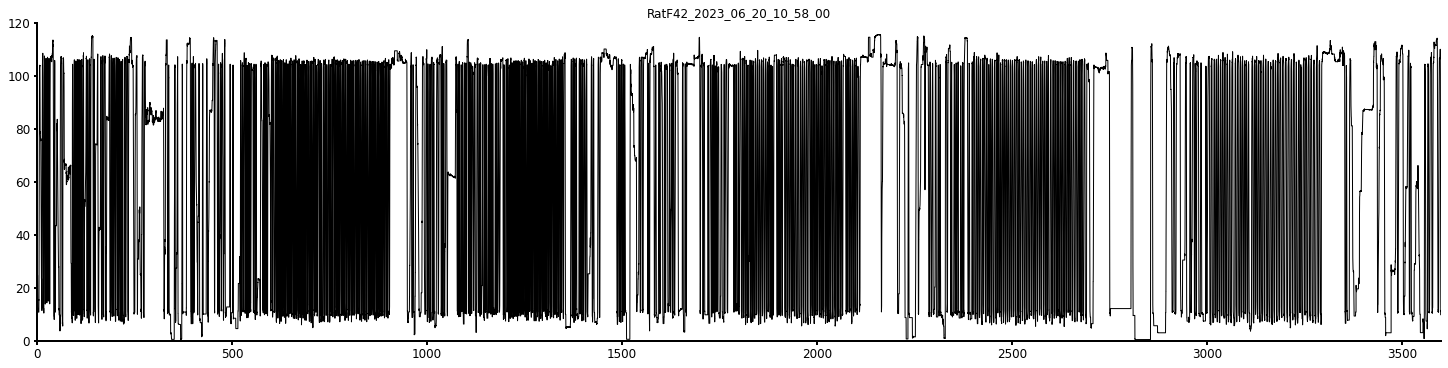

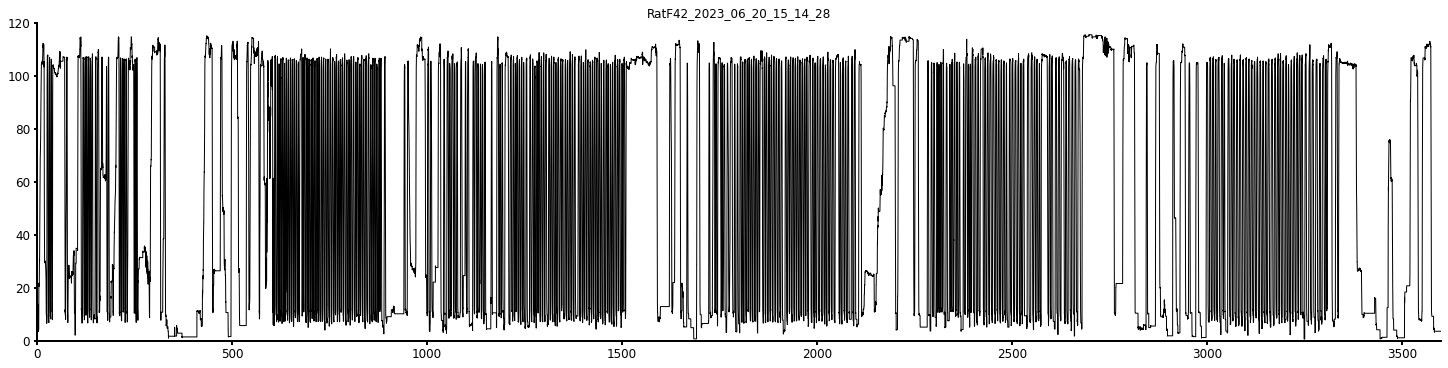

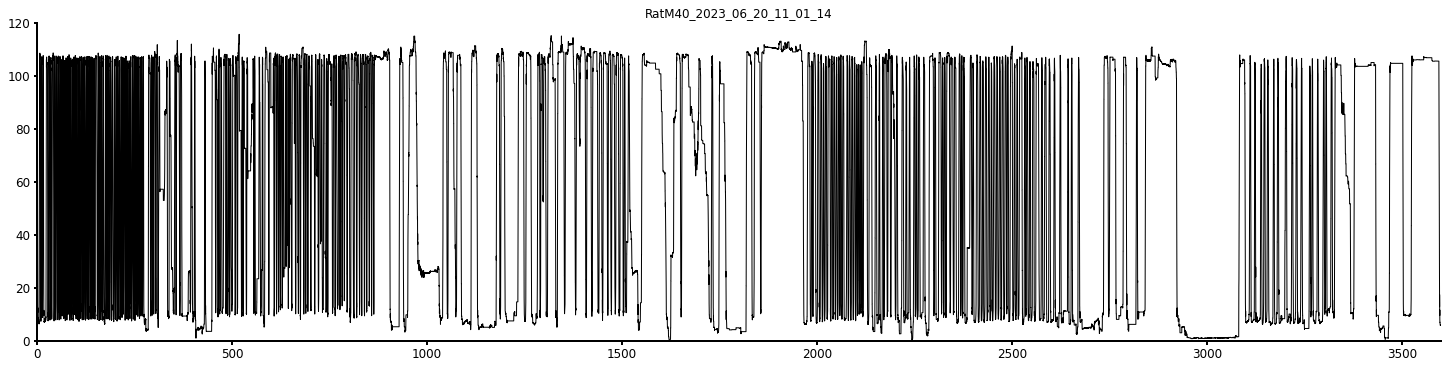

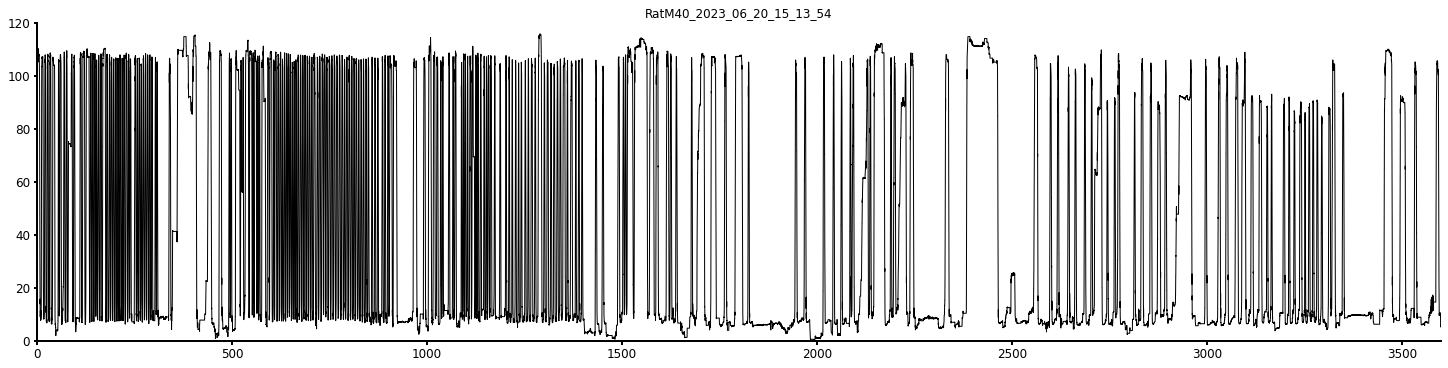

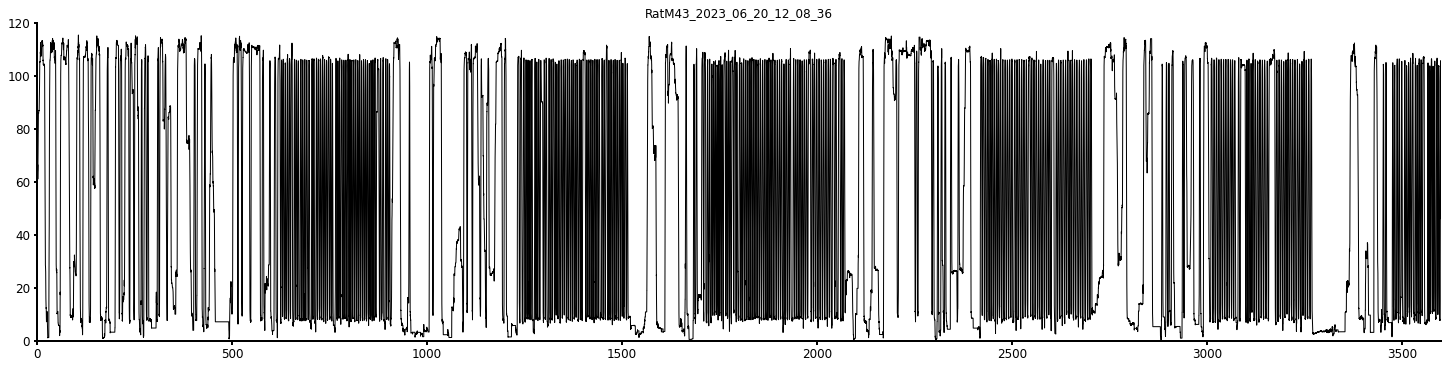

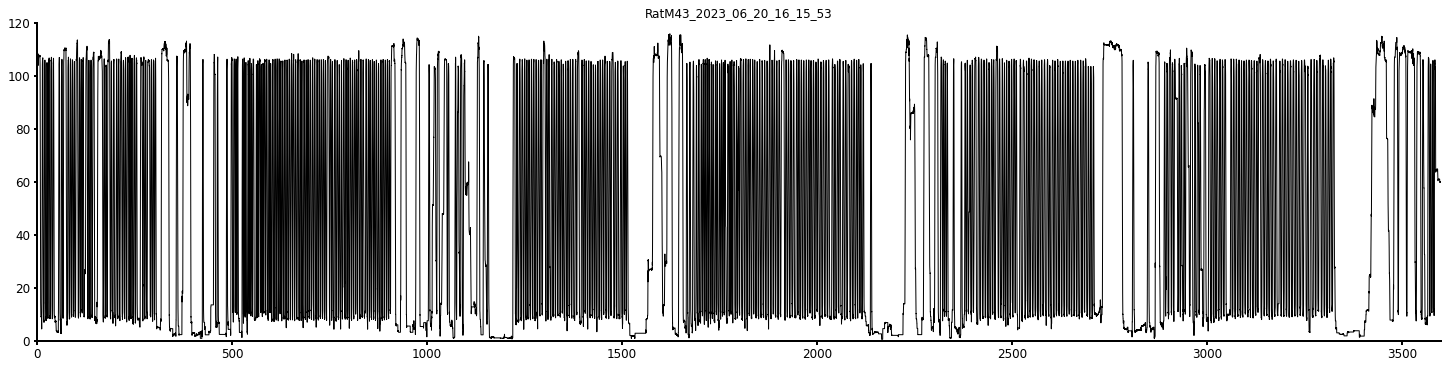

In [36]:
# plot session track without analysis files
def plot_animal_trajectory(root, animal, session, barplotaxes,
                           xyLabels=["", ""], title=None, ax=None):
    '''
    read position file and plot animal trajectory
    '''

    time = read_csv_pandas((root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".position"), Col=[3])[:90000]
    pos  = read_csv_pandas((root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".position"), Col=[4])[:90000]/11

    fig = plt.figure(figsize=(20, 5))
    plt.plot(time, pos, color='black', linewidth=1)
    plt.xlabel(xyLabels[0])
    plt.ylabel(xyLabels[1])
    plt.xlim([barplotaxes[0], barplotaxes[1]])
    plt.ylim([barplotaxes[2], barplotaxes[3]])
    plt.title(session)

l = ['RatF42_2023_06_20_10_58_00', 'RatF42_2023_06_20_15_14_28', 
   
        'RatM40_2023_06_20_11_01_14', 'RatM40_2023_06_20_15_13_54', 

        'RatM43_2023_06_20_12_08_36', 'RatM43_2023_06_20_16_15_53', 
 ]

for animal in animalList:
    for session in matchsession(animal, l):
        plot_animal_trajectory(root, animal, session, [0, 3600, 0, 120],)

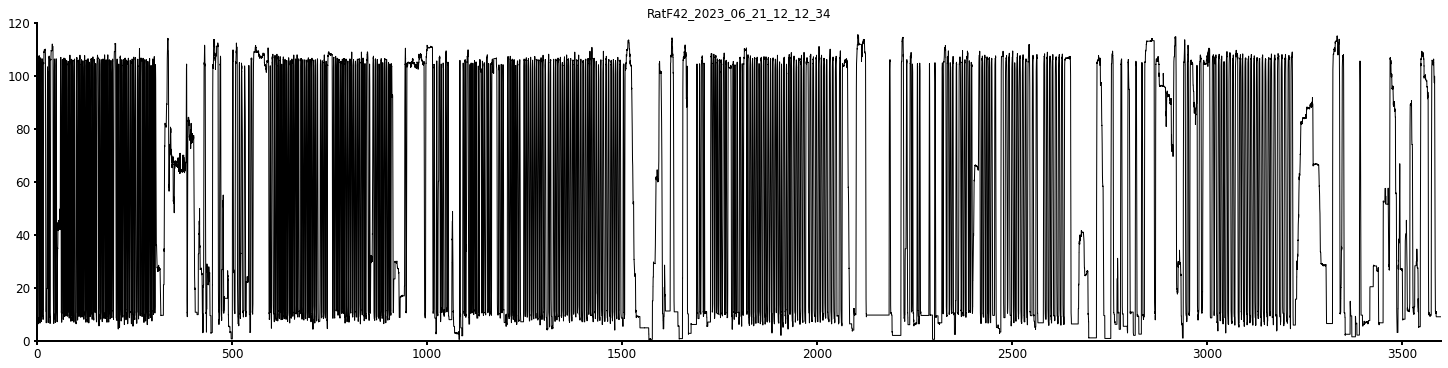

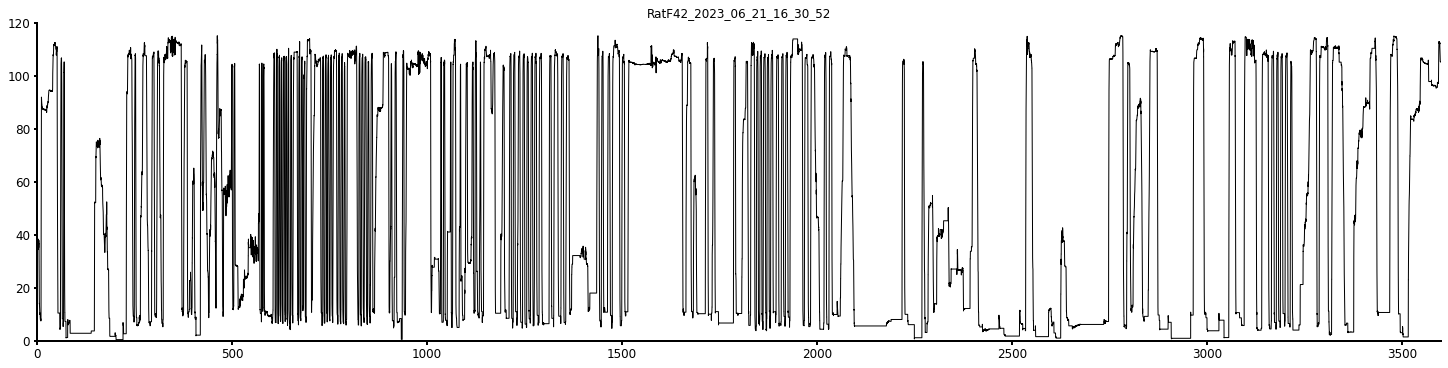

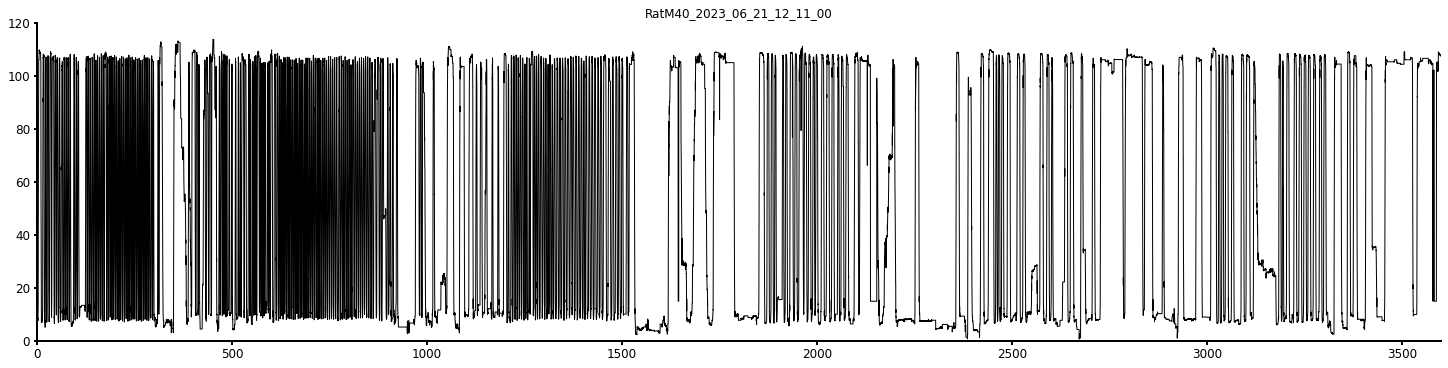

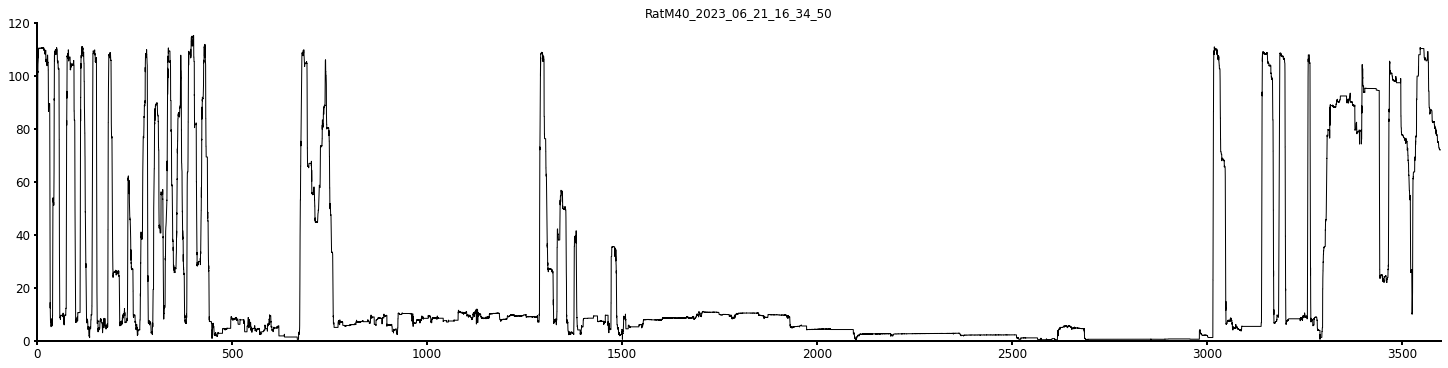

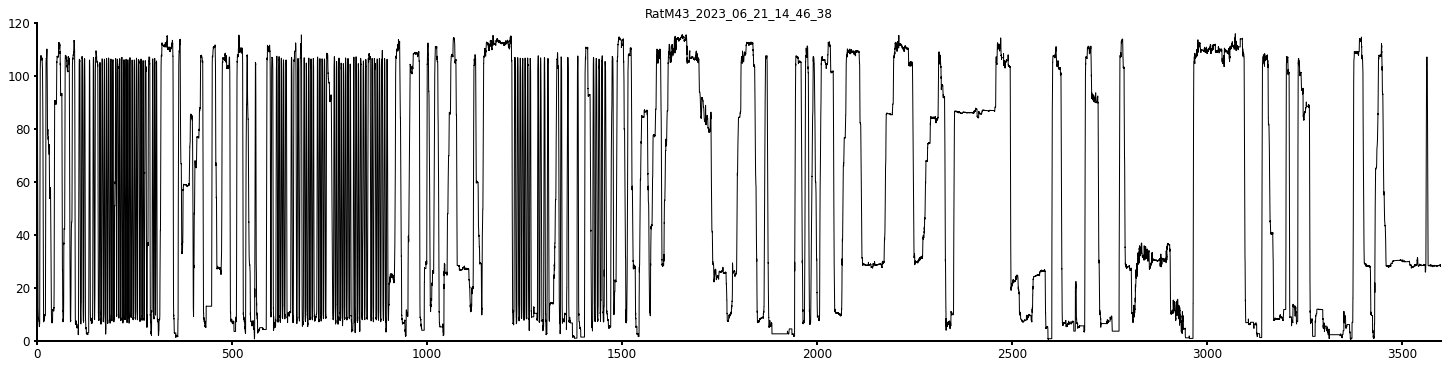

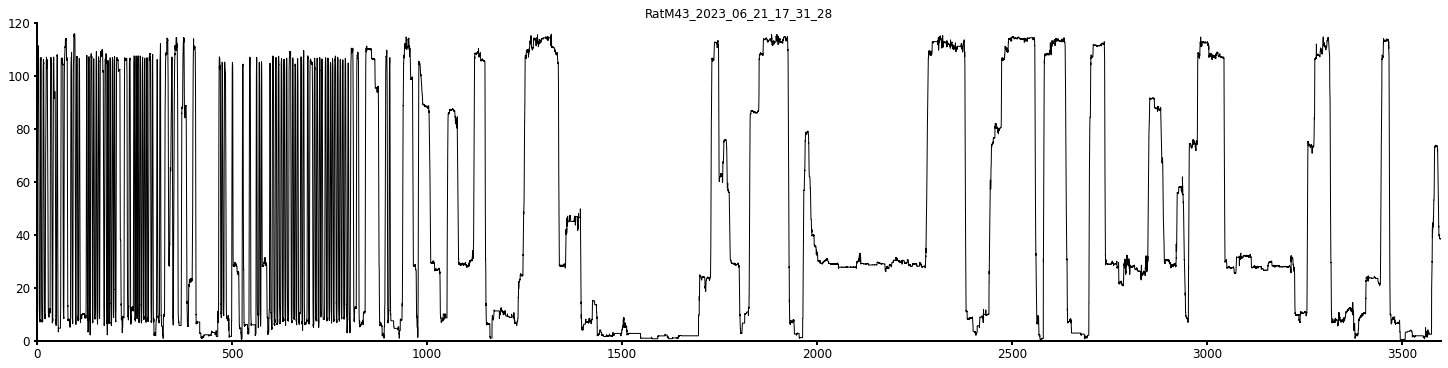

In [32]:
for animal in animalList:
    for session in matchsession(animal, CP55940):
        plot_animal_trajectory(root, animal, session, [0, 3600, 0, 120],)

## Define data path.

In [20]:
#### Define folder with data 
if platform.system()=='Linux':
    root="/home/david/Desktop/DATA2023CP_0_05"
    savePath="/home/david/Desktop/Save"
elif platform.system()=='Darwin':
    root="/Users/tom/Desktop/sequencesALLDATA"
    savePath="/Users/tom/Desktop/Save"
if 'COLAB_GPU' in os.environ:
    !gdown --id 1BSepSzm1-KQJlUvv8C23p_qyHvtzvrZ8
    !unzip -qq /content/code/sequencesALLDATA.zip
    root="/content/code/sequencesALLDATA"
    savePath="/content/Save"
    print("I'm running on Colab")
print("Path to data is: %s"%root)

retval = os.getcwd()
print("Current working directory: %s" % retval)
print("Save Path: ", savePath)

print(f'Found {len(glob.glob(root+"/*"))} rats in the data folder')

Path to data is: /home/david/Desktop/DATA2023CP_0_05
Current working directory: /home/david/Desktop/code
Save Path:  /home/david/Desktop/Save
Found 3 rats in the data folder


In [5]:
for animal in animalList:
    for session in sorted([os.path.basename(expPath) for expPath in glob.glob(root+os.sep+animal+os.sep+"Experiments"+os.sep+"Rat*")]):
        print("'"+session+"', ")

'RatF42_2023_06_19_12_00_15', 
'RatF42_2023_06_20_10_58_00', 
'RatF42_2023_06_20_15_14_28', 
'RatF42_2023_06_21_12_12_34', 
'RatF42_2023_06_21_16_30_52', 
'RatF42_2023_06_22_10_54_03', 
'RatM40_2023_06_19_11_59_33', 
'RatM40_2023_06_20_11_01_14', 
'RatM40_2023_06_20_15_13_54', 
'RatM40_2023_06_21_12_11_00', 
'RatM40_2023_06_21_16_34_50', 
'RatM40_2023_06_22_10_53_27', 
'RatM43_2023_06_19_13_00_07', 
'RatM43_2023_06_20_12_08_36', 
'RatM43_2023_06_20_16_15_53', 
'RatM43_2023_06_21_14_46_38', 
'RatM43_2023_06_21_17_31_28', 
'RatM43_2023_06_22_11_57_33', 


# session list and process

In [28]:
animalList = [os.path.basename(path) for path in sorted(glob.glob(root+"/Rat*"))]

# for animal in animalList:
#     for session in sorted([os.path.basename(expPath) for expPath in glob.glob(root+os.sep+animal+os.sep+"Experiments"+os.sep+"Rat*")]):
#         print("'"+session+"', ")




warmup = ['RatF42_2023_06_19_12_00_15', 'RatM40_2023_06_19_11_59_33', 'RatM43_2023_06_19_13_00_07', ]

no_inj = ['RatF42_2023_06_20_10_58_00', 'RatF42_2023_06_20_15_14_28', 
        'RatF42_2023_06_22_10_54_03', 
        'RatM40_2023_06_20_11_01_14', 'RatM40_2023_06_20_15_13_54', 
        'RatM40_2023_06_22_10_53_27', 
        'RatM43_2023_06_20_12_08_36', 'RatM43_2023_06_20_16_15_53', 
        'RatM43_2023_06_22_11_57_33', ]

CP55940 = ['RatF42_2023_06_21_12_12_34', 'RatF42_2023_06_21_16_30_52', 
            'RatM40_2023_06_21_12_11_00', 'RatM40_2023_06_21_16_34_50', 
            'RatM43_2023_06_21_14_46_38', 'RatM43_2023_06_21_17_31_28', ]

all_sessions = no_inj + CP55940

In [25]:
# only PM

no_inj = ['RatF42_2023_06_20_15_14_28', 

        'RatM40_2023_06_20_15_13_54', 

        'RatM43_2023_06_20_16_15_53', 
 ]

CP55940 = ['RatF42_2023_06_21_16_30_52', 
            'RatM40_2023_06_21_16_34_50', 
            'RatM43_2023_06_21_17_31_28', ]


all_sessions = no_inj + CP55940

In [37]:
# on ly AM
no_inj = ['RatF42_2023_06_20_10_58_00',
        'RatF42_2023_06_22_10_54_03', 
        'RatM40_2023_06_20_11_01_14',
        'RatM40_2023_06_22_10_53_27', 
        'RatM43_2023_06_20_12_08_36', 
        'RatM43_2023_06_22_11_57_33', ]

CP55940 = ['RatF42_2023_06_21_12_12_34', 
            'RatM40_2023_06_21_12_11_00',
            'RatM43_2023_06_21_14_46_38',]

all_sessions = no_inj + CP55940

In [8]:
p = {}
from multiprocessing import Array, Process
animalList = [os.path.basename(path) for path in sorted(glob.glob(root+"/Rat*"))]
buggedSessions = [[], [], [], [], [], []]
%run VIGOR_Functions.py

progress = Array('d', np.zeros(len(animalList)))
for index, animal in enumerate(animalList):                       # progress, animal, sessions loop through /or[] ,                    index,               redo ,redoFigs, printFigs, redoMask
    p[animal] = Process(target = processData, args=(progress, root, animal, matchsession(animal, all_sessions), index, buggedSessions, True, True,    False,     True,  ))
for index, animal in enumerate(animalList):
    p[animal].start()
for index, animal in enumerate(animalList):
    p[animal].join()

RatF42                                                            __QQ                                                                                                                                                                                    Progress: [                                                   ~~~(_)_">] 100% Done ✓ 

RatM40                                                            __QQ                                                                                                                                                                                    Progress: [                                                   ~~~(_)_">] 100% Done ✓ 

RatM43                                                            __QQ                                                                                                                                                                                    Progress: [                                                   ~~~(_)_">] 100

## Load processed data

In [38]:
rat_markers = {}
sequence = {}

# define colors for each rat
palette = {'RatF40': (0.4, 0.0, 0.0), 'RatF41': (0.55, 0.13, 0.13), 'RatF42': (0.8, 0.2, 0.2),
           'RatM40': (0.0, 0.4, 0.0), 'RatM41': (0.13, 0.55, 0.13), 'RatM42': (0.2, 0.8, 0.2), 'RatM43': (0.0, 0.4, 0.0)}

# define brain status (lesion/CNO/intact) for each rat, used in plots
# needs to be properly implemented, setting is in behav_params for each session.
brainstatus = {'RatF00': 'normal', 'RatF01': 'normal', 'RatF02': 'normal',
               'RatM00': 'normal', 'RatM01': 'normal', 'RatM02': 'normal',
               'RatF20': 'thcre', 'RatF21': 'thcre', 'RatF22': 'thcre',
               'RatM20': 'thcre', 'RatM21': 'thcre', 'RatM22': 'thcre',
               'RatF30': 'lesion', 'RatF31': 'lesion', 'RatF32': 'normal', 'RatF33': 'normal',
               'RatM30': 'lesion', 'RatM31': 'normal', 'RatM32': 'normal',
                'RatF30L': 'lesion', 'RatF31L': 'lesion', 'RatF32L': 'biglesion', 'RatF33L': 'biglesion',
                'RatM30L': 'lesion', 'RatM31L': 'biglesion', 'RatM32L': 'biglesion'
               }

markers = {'normal': 'o', 'thcre': 'd', 'lesion': 'x', 'biglesion': 'X'}
lines = {'normal': '-', 'thcre': '--', 'lesion': ':', 'biglesion': '-.'}


animalList = [os.path.basename(path) for path in sorted(glob.glob(root+"/Rat*"))]

for index, animal in enumerate(animalList):
    print(f'Loading data for {animal}')
    # define marker and color for each rat, used in plots
    if fnmatch.fnmatch(animal, 'RatF*'):
        rat_markers[animal]=[palette[animal], 'o', '-']
    elif fnmatch.fnmatch(animal, 'RatM*'):
        rat_markers[animal]=[palette[animal], 'o', '-']
    elif fnmatch.fnmatch(animal, 'Rat00*'):
        rat_markers[animal]=[(0.0, 0.0, 0.0), "$\u2426$",]
    else:
        print("error, this is not a rat you got here")

    # loop over all sessions for each rat and get the pickled preprocessed data. Data is processed in VIGOR_Preprocess.py
    # data (list or list of lists) for each variable is stored in a dictionary with keys (animal, session)
    for session in sorted(matchsession(animal, all_sessions)):

        # get the preprocessed data from the pickle file
        sequence[animal, session] = get_from_pickle(root, animal[0:6], session, name="sequence.p")
        print(f'Loaded data for {animal} {session}')
        print(f'{[len(sequence[animal, session][i]) for i in range(12)]} trials')


# separate the data into time and reward bins for each experimental condition
# distances 

dataNoInjIDLE = prepare_data_idle_times(sequence, animalList, no_inj)
dataCP55940IDLE = prepare_data_idle_times(sequence, animalList, CP55940)

dataNoInjRUN = prepare_data_running_times(sequence, animalList, no_inj)
dataCP55940RUN = prepare_data_running_times(sequence, animalList, CP55940)

# all conditions pooled
# dataAllIDLE = prepare_data_idle_times(sequence, animalList, saline+vehicle+CP55940_0_01+no_inj+CP55940_0_03)
# dataAllRUN = prepare_data_running_times(sequence, animalList, saline+vehicle+CP55940_0_01+no_inj+CP55940_0_03)

Loading data for RatF42
Loaded data for RatF42 RatF42_2023_06_20_10_58_00
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5] trials
Loaded data for RatF42 RatF42_2023_06_21_12_12_34
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5] trials
Loaded data for RatF42 RatF42_2023_06_22_10_54_03
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5] trials
Loading data for RatM40
Loaded data for RatM40 RatM40_2023_06_20_11_01_14
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5] trials
Loaded data for RatM40 RatM40_2023_06_21_12_11_00
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5] trials
Loaded data for RatM40 RatM40_2023_06_22_10_53_27
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5] trials
Loading data for RatM43
Loaded data for RatM43 RatM43_2023_06_20_12_08_36
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5] trials
Loaded data for RatM43 RatM43_2023_06_21_14_46_38
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5] trials
Loaded data for RatM43 RatM43_2023_06_22_11_57_33
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5] trials


In [27]:
intactanimals = ['RatF42', 'RatM40', 'RatM43']
lesionedanimals = ['RatF40', 'RatF41', 'RatM41', 'RatM42']

In [11]:
def modelrun_fit(data, init=[1, 1, 1, 1, 1, 1], f=modelrun_crit,
                 N_bins=6, N_avg=4, N_params=2,
                 mu_t_fixed=False, sigma_t_fixed=False,
                 mu_R_fixed=False, sigma_R_fixed=False):
    params_init = np.array(init)
    mu_t_bounds = (None, None) if not mu_t_fixed else (0, 1e-8)
    sigma_t_bounds = (None, None) if not sigma_t_fixed else (0, 1e-8)
    mu_R_bounds = (None, None) if not mu_R_fixed else (0, 1e-8)
    sigma_R_bounds = (None, None) if not sigma_R_fixed else (0, 1e-8)

    res = minimize(f, params_init, args=(data, [N_bins, N_avg], N_params),
                   bounds=((None, None), (None, None),
                           mu_t_bounds, sigma_t_bounds,
                           mu_R_bounds, sigma_R_bounds))
    return res.x, res.fun


# fit idle time

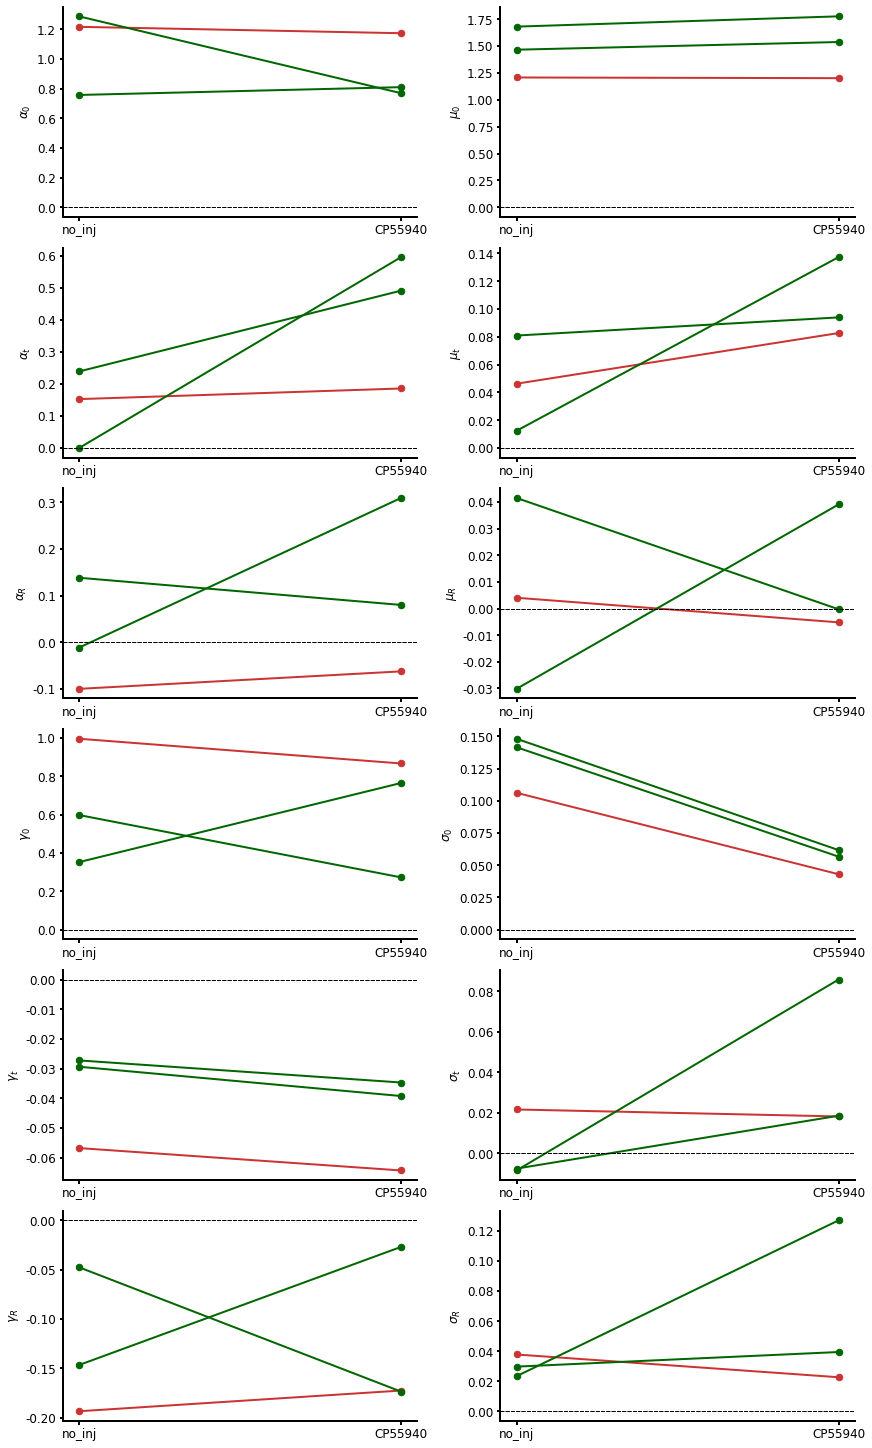

In [39]:
fig, axs = plt.subplots(6, 2, figsize=(12, 20))
ylabelsIDLE = [r'$\alpha_0$', r"$\alpha_t$", r"$\alpha_R$", r'$\gamma_0$', r"$\gamma_t$", r"$\gamma_R$"]
ylimsIDLE = [[-.5, 3], [-.1, .65], [-.45, .5], [-.2, 1.6], [-.25, .1], [-.35, .1]]
ylabelsRUN = [r'$\mu_0$', r"$\mu_t$", r"$\mu_R$", r'$\sigma_0$', r"$\sigma_t$", r"$\sigma_R$"]
ylimsRUN = [[-.2, 2.5], [-.05, .2], [-.15, .15], [-.05, .2], [-.05, .05], [-.025, .1], ]
alpha_t_fixed, gamma_t_fixed, alpha_R_fixed, gamma_R_fixed = False, False, False, False
mu_t_fixed, sigma_t_fixed, mu_R_fixed, sigma_R_fixed = False, False, False, False


ylimsIDLE = [[-.2, 2], [-.1, 0.8], [-.35, .55], [-.05, 1.3], [-.25, .2], [-.35, .1]]
ylimsRUN = [[-.2, 2], [-.1, 1.5], [-.35, .55], [-.05, .5], [-.25, 1], [-.35, 1], ]



alpha, gamma, alpha_t, gamma_t, alpha_R, gamma_R, lossWald = {}, {}, {}, {}, {}, {}, {}
mu, mu_t, mu_R, sigma, sigma_t, sigma_R, loss = {}, {}, {}, {}, {}, {}, {}

for animal in animalList:
    alpha[animal] = {"no_inj": 0, "CP55940": 0}
    gamma[animal] = {"no_inj": 0, "CP55940": 0}
    alpha_t[animal] = {"no_inj": 0, "CP55940": 0}
    gamma_t[animal] = {"no_inj": 0, "CP55940": 0}
    alpha_R[animal] = {"no_inj": 0, "CP55940": 0}
    gamma_R[animal] = {"no_inj": 0, "CP55940": 0}
    lossWald[animal] = {"no_inj": 0, "CP55940": 0}

    mu[animal] = {"no_inj": 0, "CP55940": 0}
    sigma[animal] = {"no_inj": 0, "CP55940": 0}
    mu_t[animal] = {"no_inj": 0, "CP55940": 0}
    sigma_t[animal] = {"no_inj": 0, "CP55940": 0}
    mu_R[animal] = {"no_inj": 0, "CP55940": 0}
    sigma_R[animal] = {"no_inj": 0, "CP55940": 0}
    loss[animal] = {"no_inj": 0, "CP55940": 0}


    for cond, data in zip(["no_inj", "CP55940"], [dataNoInjIDLE, dataCP55940IDLE]):
        (alpha[animal][cond], theta, gamma[animal][cond], \
        alpha_t[animal][cond], thetaprime, gamma_t[animal][cond], \
        alpha_R[animal][cond], thetasecond, gamma_R[animal][cond]), lossWald[animal][cond] = modelwald_fit(data[animal], alpha_t_fixed=alpha_t_fixed, 
                                                                                                                        gamma_t_fixed=gamma_t_fixed, 
                                                                                                                        alpha_R_fixed=alpha_R_fixed, 
                                                                                                                        gamma_R_fixed=gamma_R_fixed)

    for cond, data in zip(["no_inj", "CP55940"], [dataNoInjRUN, dataCP55940RUN]):
        (mu[animal][cond], sigma[animal][cond], \
        mu_t[animal][cond], sigma_t[animal][cond], \
        mu_R[animal][cond], sigma_R[animal][cond]), loss[animal][cond] = modelrun_fit(data[animal], mu_t_fixed=mu_t_fixed, 
                                                                                                    sigma_t_fixed=sigma_t_fixed, 
                                                                                                    mu_R_fixed=mu_R_fixed, 
                                                                                                    sigma_R_fixed=sigma_R_fixed,)


varsIDLE = [alpha, alpha_t, alpha_R, gamma, gamma_t, gamma_R]
varsRUN = [mu, mu_t, mu_R, sigma, sigma_t, sigma_R, ]

for animal in animalList:
    for i, (var, ylabel, ylim) in enumerate(zip(varsIDLE, ylabelsIDLE, ylimsIDLE)):
        x, y = np.arange(2), [var[animal]["no_inj"], var[animal]["CP55940"]]
        axs[i, 0].plot(x, y, color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], markersize=6.5, lw=2)
        axs[i, 0].set_title(f"")
        axs[i, 0].set_xticks(np.arange(2))
        axs[i, 0].set_xticklabels(["no_inj", "CP55940"])
        axs[i, 0].set_ylabel(ylabel)
        # axs[i, 0].set_xlim(-.5, 2.5)
        # axs[i, 0].set_ylim(ylim)
        axs[i, 0].axhline(0, color='black', linestyle='--', linewidth=1)

    for i, (var, ylabel, ylim) in enumerate(zip(varsRUN, ylabelsRUN, ylimsRUN)):
        x, y = np.arange(2), [var[animal]["no_inj"], var[animal]["CP55940"]]
        axs[i, 1].plot(x, y, color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], markersize=6.5, lw=2)
        axs[i, 1].set_title(f"")
        axs[i, 1].set_xticks(np.arange(2))
        axs[i, 1].set_xticklabels(["no_inj", "CP55940"])
        axs[i, 1].set_ylabel(ylabel)
        # axs[i, 1].set_xlim(-.5, 2.5)
        # axs[i, 1].set_ylim(ylim)
        axs[i, 1].axhline(0, color='black', linestyle='--', linewidth=1)
        

NameError: name 'intactanimals' is not defined

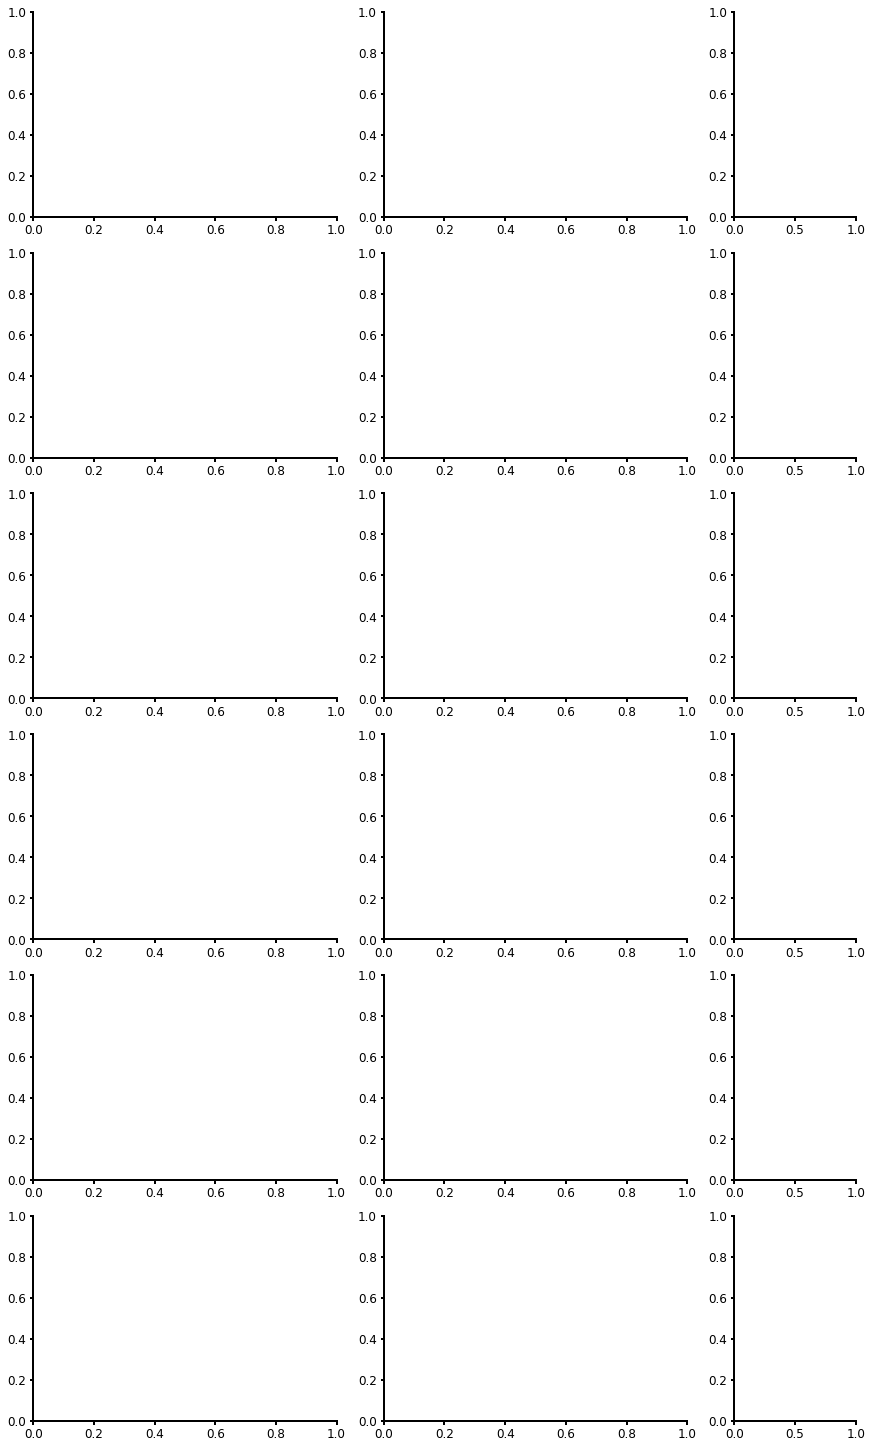

In [39]:
# only intact animals
fig, axs = plt.subplots(6, 3, figsize=(12, 20), gridspec_kw={'width_ratios': [5, 5, 2]})
ylabelsIDLE = [r'$\alpha_0$', r"$\alpha_t$", r"$\alpha_R$", r'$\gamma_0$', r"$\gamma_t$", r"$\gamma_R$"]
ylimsIDLE = [[-.5, 3], [-.1, .65], [-.45, .5], [-.2, 1.6], [-.25, .1], [-.35, .1]]
ylabelsRUN = [r'$\mu_0$', r"$\mu_t$", r"$\mu_R$", r'$\sigma_0$', r"$\sigma_t$", r"$\sigma_R$"]
ylimsRUN = [[-.2, 2.5], [-.05, .2], [-.15, .15], [-.05, .2], [-.05, .05], [-.025, .1], ]
alpha_t_fixed, gamma_t_fixed, alpha_R_fixed, gamma_R_fixed = False, False, False, False
mu_t_fixed, sigma_t_fixed, mu_R_fixed, sigma_R_fixed = False, False, False, False

alpha, gamma, alpha_t, gamma_t, alpha_R, gamma_R, lossWald = {}, {}, {}, {}, {}, {}, {}
mu, mu_t, mu_R, sigma, sigma_t, sigma_R, loss = {}, {}, {}, {}, {}, {}, {}

for animal in intactanimals:
    alpha[animal] = {"saline": 0, "vehicle": 0, "CP55940": 0}
    gamma[animal] = {"saline": 0, "vehicle": 0, "CP55940": 0}
    alpha_t[animal] = {"saline": 0, "vehicle": 0, "CP55940": 0}
    gamma_t[animal] = {"saline": 0, "vehicle": 0, "CP55940": 0}
    alpha_R[animal] = {"saline": 0, "vehicle": 0, "CP55940": 0}
    gamma_R[animal] = {"saline": 0, "vehicle": 0, "CP55940": 0}
    lossWald[animal] = {"saline": 0, "vehicle": 0, "CP55940": 0}

    mu[animal] = {"saline": 0, "vehicle": 0, "CP55940": 0}
    sigma[animal] = {"saline": 0, "vehicle": 0, "CP55940": 0}
    mu_t[animal] = {"saline": 0, "vehicle": 0, "CP55940": 0}
    sigma_t[animal] = {"saline": 0, "vehicle": 0, "CP55940": 0}
    mu_R[animal] = {"saline": 0, "vehicle": 0, "CP55940": 0}
    sigma_R[animal] = {"saline": 0, "vehicle": 0, "CP55940": 0}
    loss[animal] = {"saline": 0, "vehicle": 0, "CP55940": 0}


    for cond, data in zip(["saline", "vehicle", "CP55940"], [datasalineIDLE, datavehicleIDLE, dataCP55940IDLE]):
        (alpha[animal][cond], theta, gamma[animal][cond], \
        alpha_t[animal][cond], thetaprime, gamma_t[animal][cond], \
        alpha_R[animal][cond], thetasecond, gamma_R[animal][cond]), lossWald[animal][cond] = modelwald_fit(data[animal], alpha_t_fixed=alpha_t_fixed, 
                                                                                                                        gamma_t_fixed=gamma_t_fixed, 
                                                                                                                        alpha_R_fixed=alpha_R_fixed, 
                                                                                                                        gamma_R_fixed=gamma_R_fixed)

    for cond, data in zip(["saline", "vehicle", "CP55940"], [datasalineIDLE, datavehicleIDLE, dataCP55940IDLE]):
        (mu[animal][cond], sigma[animal][cond], \
        mu_t[animal][cond], sigma_t[animal][cond], \
        mu_R[animal][cond], sigma_R[animal][cond]), loss[animal][cond] = modelrun_fit(data[animal], mu_t_fixed=mu_t_fixed, 
                                                                                                    sigma_t_fixed=sigma_t_fixed, 
                                                                                                    mu_R_fixed=mu_R_fixed, 
                                                                                                    sigma_R_fixed=sigma_R_fixed,)


varsIDLE = [alpha, alpha_t, alpha_R, gamma, gamma_t, gamma_R]
varsRUN = [mu, mu_t, mu_R, sigma, sigma_t, sigma_R, ]

for animal in intactanimals:
    for i, (var, ylabel, ylim) in enumerate(zip(varsIDLE, ylabelsIDLE, ylimsIDLE)):
        x, y = np.arange(3), [var[animal]["saline"], var[animal]["vehicle"], var[animal]["CP55940"]]
        axs[i, 0].plot(x, y, color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], markersize=6.5, lw=2)
        axs[i, 0].set_title(f"")
        axs[i, 0].set_xticks(np.arange(3))
        axs[i, 0].set_xticklabels(["saline", "vehicle", "CP55940"])
        axs[i, 0].set_ylabel(ylabel)
        axs[i, 0].set_xlim(-.5, 2.5)
        # axs[i, 0].set_ylim(ylim)
        axs[i, 0].axhline(0, color='black', linestyle='--', linewidth=1)

    for i, (var, ylabel, ylim) in enumerate(zip(varsRUN, ylabelsRUN, ylimsRUN)):
        x, y = np.arange(3), [var[animal]["saline"], var[animal]["vehicle"], var[animal]["CP55940"]]
        axs[i, 1].plot(x, y, color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], markersize=6.5, lw=2)
        axs[i, 1].set_title(f"")
        axs[i, 1].set_xticks(np.arange(3))
        axs[i, 1].set_xticklabels(["saline", "vehicle", "CP55940"])
        axs[i, 1].set_ylabel(ylabel)
        axs[i, 1].set_xlim(-.5, 2.5)
        # axs[i, 1].set_ylim(ylim)
        axs[i, 1].axhline(0, color='black', linestyle='--', linewidth=1)
        

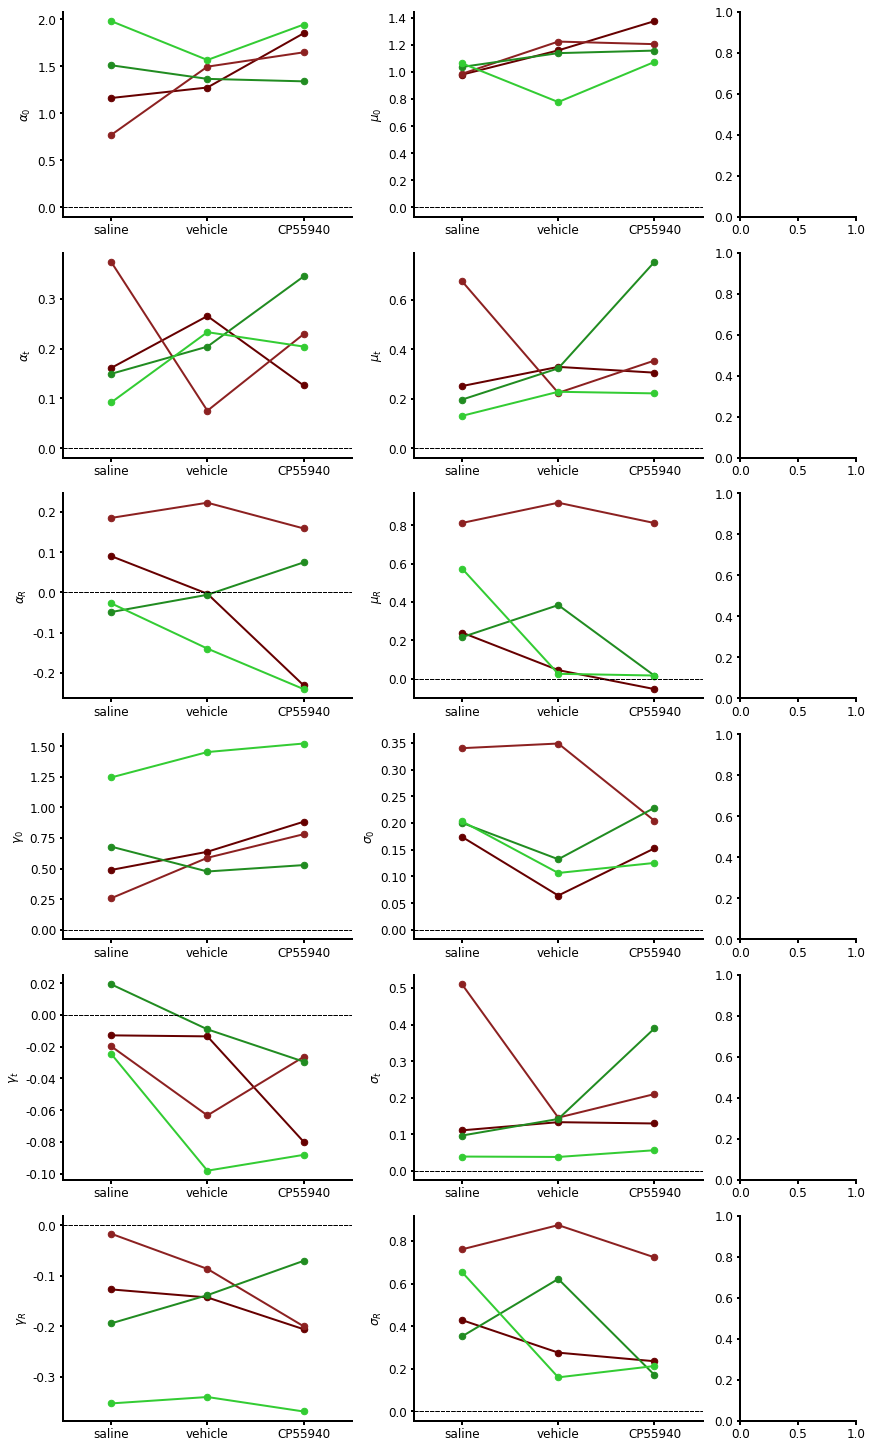

In [ ]:
# only lesion animals
fig, axs = plt.subplots(6, 3, figsize=(12, 20), gridspec_kw={'width_ratios': [5, 5, 2]})
ylabelsIDLE = [r'$\alpha_0$', r"$\alpha_t$", r"$\alpha_R$", r'$\gamma_0$', r"$\gamma_t$", r"$\gamma_R$"]
ylimsIDLE = [[-.5, 3], [-.1, .65], [-.45, .5], [-.2, 1.6], [-.25, .1], [-.35, .1]]
ylabelsRUN = [r'$\mu_0$', r"$\mu_t$", r"$\mu_R$", r'$\sigma_0$', r"$\sigma_t$", r"$\sigma_R$"]
ylimsRUN = [[-.2, 2.5], [-.05, .2], [-.15, .15], [-.05, .2], [-.05, .05], [-.025, .1], ]
alpha_t_fixed, gamma_t_fixed, alpha_R_fixed, gamma_R_fixed = False, False, False, False
mu_t_fixed, sigma_t_fixed, mu_R_fixed, sigma_R_fixed = False, False, False, False

alpha, gamma, alpha_t, gamma_t, alpha_R, gamma_R, lossWald = {}, {}, {}, {}, {}, {}, {}
mu, mu_t, mu_R, sigma, sigma_t, sigma_R, loss = {}, {}, {}, {}, {}, {}, {}

for animal in lesionedanimals:
    alpha[animal] = {"saline": 0, "vehicle": 0, "CP55940": 0}
    gamma[animal] = {"saline": 0, "vehicle": 0, "CP55940": 0}
    alpha_t[animal] = {"saline": 0, "vehicle": 0, "CP55940": 0}
    gamma_t[animal] = {"saline": 0, "vehicle": 0, "CP55940": 0}
    alpha_R[animal] = {"saline": 0, "vehicle": 0, "CP55940": 0}
    gamma_R[animal] = {"saline": 0, "vehicle": 0, "CP55940": 0}
    lossWald[animal] = {"saline": 0, "vehicle": 0, "CP55940": 0}

    mu[animal] = {"saline": 0, "vehicle": 0, "CP55940": 0}
    sigma[animal] = {"saline": 0, "vehicle": 0, "CP55940": 0}
    mu_t[animal] = {"saline": 0, "vehicle": 0, "CP55940": 0}
    sigma_t[animal] = {"saline": 0, "vehicle": 0, "CP55940": 0}
    mu_R[animal] = {"saline": 0, "vehicle": 0, "CP55940": 0}
    sigma_R[animal] = {"saline": 0, "vehicle": 0, "CP55940": 0}
    loss[animal] = {"saline": 0, "vehicle": 0, "CP55940": 0}


    for cond, data in zip(["saline", "vehicle", "CP55940"], [datasalineIDLE, datavehicleIDLE, dataCP55940IDLE]):
        (alpha[animal][cond], theta, gamma[animal][cond], \
        alpha_t[animal][cond], thetaprime, gamma_t[animal][cond], \
        alpha_R[animal][cond], thetasecond, gamma_R[animal][cond]), lossWald[animal][cond] = modelwald_fit(data[animal], alpha_t_fixed=alpha_t_fixed, 
                                                                                                                        gamma_t_fixed=gamma_t_fixed, 
                                                                                                                        alpha_R_fixed=alpha_R_fixed, 
                                                                                                                        gamma_R_fixed=gamma_R_fixed)

    for cond, data in zip(["saline", "vehicle", "CP55940"], [datasalineIDLE, datavehicleIDLE, dataCP55940IDLE]):
        (mu[animal][cond], sigma[animal][cond], \
        mu_t[animal][cond], sigma_t[animal][cond], \
        mu_R[animal][cond], sigma_R[animal][cond]), loss[animal][cond] = modelrun_fit(data[animal], mu_t_fixed=mu_t_fixed, 
                                                                                                    sigma_t_fixed=sigma_t_fixed, 
                                                                                                    mu_R_fixed=mu_R_fixed, 
                                                                                                    sigma_R_fixed=sigma_R_fixed,)


varsIDLE = [alpha, alpha_t, alpha_R, gamma, gamma_t, gamma_R]
varsRUN = [mu, mu_t, mu_R, sigma, sigma_t, sigma_R, ]

for animal in lesionedanimals:
    for i, (var, ylabel, ylim) in enumerate(zip(varsIDLE, ylabelsIDLE, ylimsIDLE)):
        x, y = np.arange(3), [var[animal]["saline"], var[animal]["vehicle"], var[animal]["CP55940"]]
        axs[i, 0].plot(x, y, color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], markersize=6.5, lw=2)
        axs[i, 0].set_title(f"")
        axs[i, 0].set_xticks(np.arange(3))
        axs[i, 0].set_xticklabels(["saline", "vehicle", "CP55940"])
        axs[i, 0].set_ylabel(ylabel)
        axs[i, 0].set_xlim(-.5, 2.5)
        # axs[i, 0].set_ylim(ylim)
        axs[i, 0].axhline(0, color='black', linestyle='--', linewidth=1)

    for i, (var, ylabel, ylim) in enumerate(zip(varsRUN, ylabelsRUN, ylimsRUN)):
        x, y = np.arange(3), [var[animal]["saline"], var[animal]["vehicle"], var[animal]["CP55940"]]
        axs[i, 1].plot(x, y, color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], markersize=6.5, lw=2)
        axs[i, 1].set_title(f"")
        axs[i, 1].set_xticks(np.arange(3))
        axs[i, 1].set_xticklabels(["saline", "vehicle", "CP55940"])
        axs[i, 1].set_ylabel(ylabel)
        axs[i, 1].set_xlim(-.5, 2.5)
        # axs[i, 1].set_ylim(ylim)
        axs[i, 1].axhline(0, color='black', linestyle='--', linewidth=1)
        

In [17]:
for var in vars:
    for animal in animalList:
        if animal == 'RatF02':
            for cond in ["60", "90", "120", "20", "10", "2", "rev10", "rev20"]:
                if cond == "120":
                    print(f"{animal} {cond} {var[animal][cond]:.2f}")

RatF02 120 0.93
RatF02 120 0.24
RatF02 120 0.13
RatF02 120 0.55
RatF02 120 -0.06
RatF02 120 -0.07


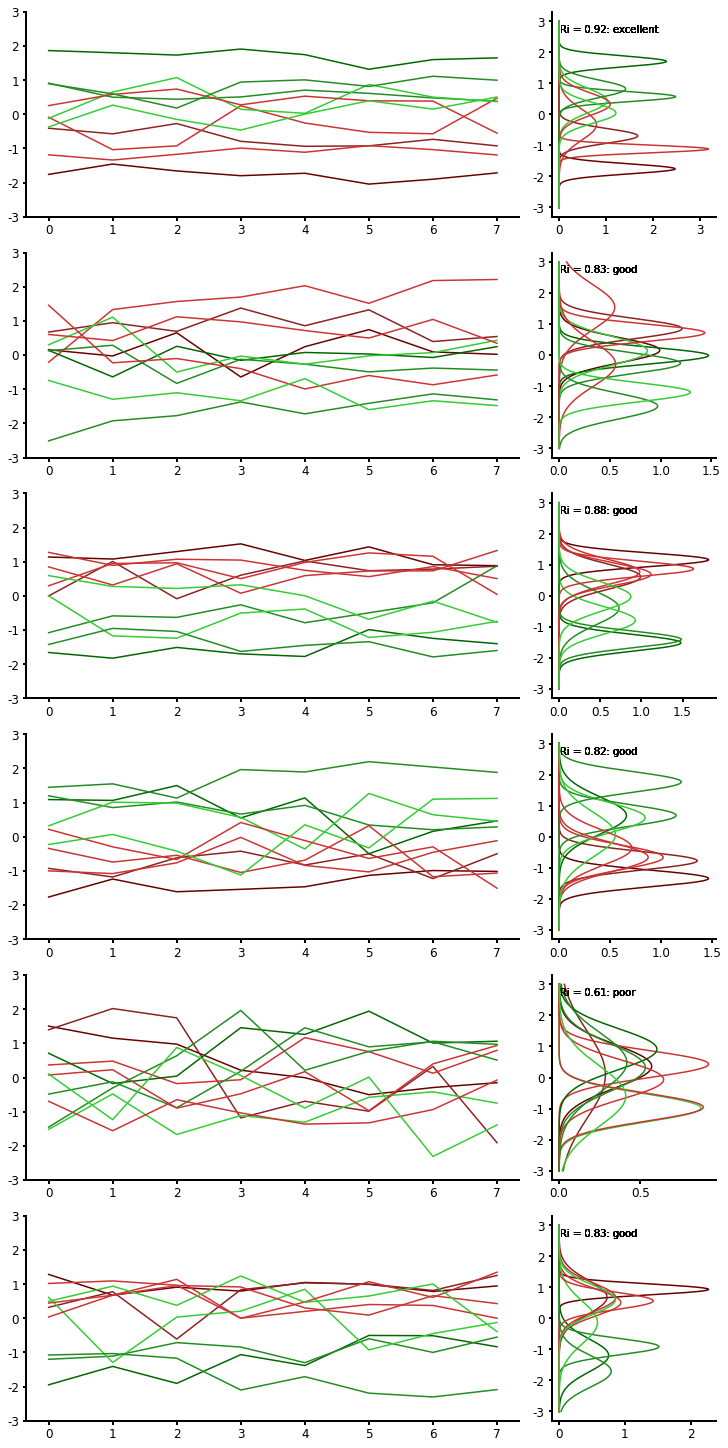

In [18]:
fig, axs = plt.subplots(6, 2, figsize=(10, 20), gridspec_kw={'width_ratios': [3, 1]})
for j, zvar in enumerate(Zvars):
    for animal in animalList:
        zscores = [zvar[animal][cond] for cond in ["60", "90", "120", "20", "10", "2", "rev10", "rev20"]]

        axs[j, 0].plot(np.arange(8), zscores, color=rat_markers[animal][0], linestyle=lines[brainstatus[animal]])
        axs[j, 0].set_ylim(-3, 3)


        # axs[j, 1].hist(zscores, bins=np.linspace(-3, 3, 61), color=rat_markers[animal][0], alpha=0.25)
        Ri = compute_Ri(zvar, animalList)
        pdf = stats.norm.pdf(np.linspace(-3, 3, 600), np.mean(zscores), np.std(zscores))
        axs[j, 1].plot(pdf, np.linspace(-3, 3, 600), color=rat_markers[animal][0], linestyle=lines[brainstatus[animal]])
        axs[j, 1].annotate(f'Ri = {Ri:.2f}: {interpret_Ri(Ri)}', xy=(0.05, 0.9), xycoords='axes fraction')

In [19]:
pl = interact(intuition_Ri, gain=(0, .5, .01))

interactive(children=(FloatSlider(value=0.0, description='gain', max=0.5, step=0.01), Output()), _dom_classes=…

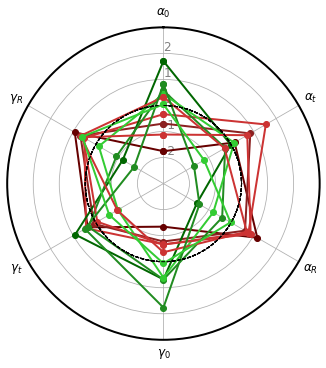

In [20]:
fig, axs = plt.subplots(1, 1, figsize=(5, 5), subplot_kw={'projection': 'polar'})

for idx, animal in enumerate(animalList):
        make_spider(axs, traits[animal], title='', 
        color=rat_markers[animal][0], marker=rat_markers[animal][1], linestyle=lines[brainstatus[animal]],
        labels=[r'$\alpha_0$', r"$\alpha_t$", r"$\alpha_R$", r'$\gamma_0$', r"$\gamma_t$", r"$\gamma_R$"])

## Parameter/weight correlation
Correlation between average weight of each animal and the fitted parameters.  


$\alpha_0$ corr: 0.64, p: 0.0473
$\alpha_t$ corr: -0.86, p: 0.0016
$\alpha_R$ corr: -0.81, p: 0.0045
$\gamma_0$ corr: 0.88, p: 0.0007
$\gamma_t$ corr: 0.06, p: 0.8656
$\gamma_R$ corr: -0.77, p: 0.0093


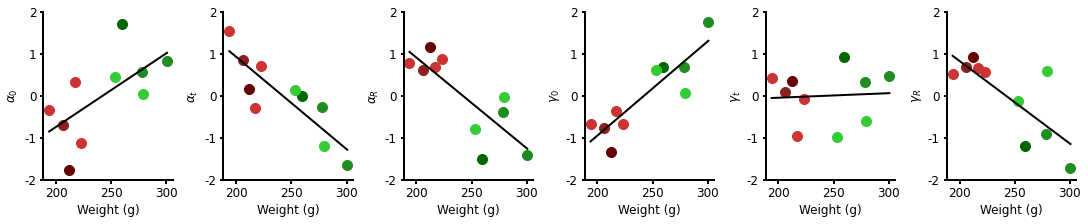

In [23]:
weights = {'RatF00': 212.02, 'RatF01': 205.85, 'RatF02': 193.75,
            'RatM00': 259.37, 'RatM01': 278.12, 'RatM02': 253.19,
            'RatF20': 220.10, 'RatF21': 215.53, 'RatF22': 215.0,
            'RatM20': 254.68, 'RatM21': 307.29, 'RatM22': 330.53,
            'RatF30': 217.32, 'RatF31': 228.95, 'RatF32': 216.80, 'RatF33': 222.77,
            'RatM30': 261.38, 'RatM31': 300.55, 'RatM32': 279.23, 
            'RatF30L': 217.32, 'RatF31L': 228.95, 'RatF32L': 216.80, 'RatF33L': 222.77,
            'RatM30L': 261.38, 'RatM31L': 300.55, 'RatM32L': 279.23}

fig, ax = plt.subplots(1, 6, figsize=(15, 3))
for j, zvar in enumerate(Zvars):
    _x, _y = [], []
    for animal in animalList:
        zscores = [zvar[animal][cond] for cond in ["60", "90", "120", "20", "10", "2", "rev10", "rev20"]]
        y = np.mean(zscores)
        x = weights[animal]

        ax[j].scatter(x, y, color=rat_markers[animal][0], marker=rat_markers[animal][1], s=100)
        ax[j].set_xlabel("Weight (g)")
        ax[j].set_ylabel(ylabels[j])
        ax[j].set_ylim(-2, 2)

        _x.append(x)
        _y.append(y)

    pearson = stats.pearsonr(_x, _y)
    print(ylabels[j]+f' corr: {pearson[0]:.2f}, p: {pearson[1]:.4f}')
    
    gradient, intercept, r_value, p_value, std_err = stats.linregress(_x, _y)
    ax[j].plot(np.linspace(np.min(_x), np.max(_x), 100), gradient * np.linspace(np.min(_x), np.max(_x), 100) + intercept, color='black', lw=2)

# Supplementary - Model hyperparameters
We search the optimal hyperparameters for our model:  
- memory size,  
- number of time bins,  
- data pooling -removed-.  

We use the BIC to compare two models with different memory sizes and time bins (i.e. not the same number of cells).


## 1) Memory size
How many items does the rat keep in memory?  
Compute the total loss of the model using data from all conditions for different memory sizes, find the memory size that minimizes the loss.  
--> 4 --> 3 !!!

KeyError: 'RatF32'

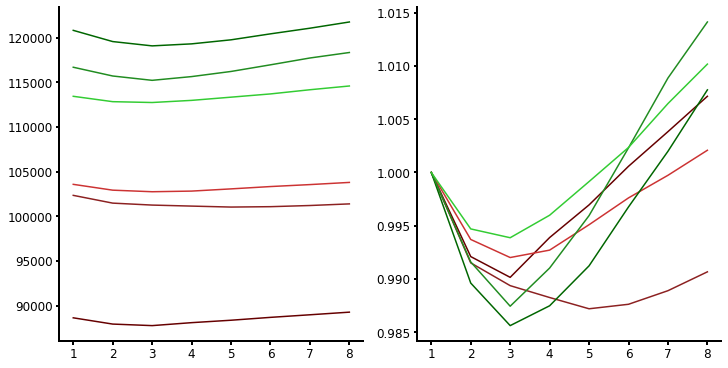

In [22]:
memsizes = np.arange(1, 9)

losses = {k:np.zeros(len(memsizes)) for k in animalList}
sessions = dist60+dist90+dist120+TM20+TM10+TM2+TMrev2+TMrev10+TMrev20

if os.path.exists("picklejar/lossesMemSize.p"):
    losses = pickle.load(open("picklejar/lossesMemSize.p", "rb"))
else:
    for idx, memsize in enumerate(memsizes):
        data_all = prepare_data_idle_times(sequence, animalList, sessions, memsize=memsize, time_bins=6)
        for animal in animalList:
            p, losses[animal][idx] = modelwald_fit(data_all[animal], f=model_compare, N_bins=6, N_avg=len(meankeys(generate_targetList(seq_len=memsize)[::-1])))


fig, axs = plt.subplots(1, 2, figsize=(10, 5))
avglosses = np.zeros((len(animalList), len(memsizes)))
for idx, animal in enumerate(animalList):
    axs[0].plot(memsizes, losses[animal], color=rat_markers[animal][0])
    axs[1].plot(memsizes, (losses[animal])/(losses[animal][0]), color=rat_markers[animal][0], label=animal)
    avglosses[idx] = losses[animal]/losses[animal][0]

f = np.mean(avglosses[:3], axis=0)
m = np.mean(avglosses[3:], axis=0)
avglosses = np.median(avglosses, axis=0)

axs[1].plot(memsizes, avglosses, color='k', lw=2)
z = np.poly1d(np.polyfit(memsizes, avglosses, 4))
x=np.linspace(1, 8, 100)
axs[1].plot(x, z(x), color='k', lw=3, ls='--')
print(x[np.argmin(z(x))])
# axs[0].plot(memsizes, f/3, color='r', lw=2, ls='--')
# axs[0].plot(memsizes, m/3, color='g', lw=2, ls='--')
# axs[1].plot(memsizes, f, color='r', lw=2, ls='--')
# axs[1].plot(memsizes, m, color='g', lw=2, ls='--')

axs[0].set_xlabel('mem span')
axs[1].set_xlabel('mem span')
axs[0].set_ylabel(r'$\Sigma$ loss')
axs[1].set_ylabel(r'$\Sigma$ loss, norm')
axs[1].legend()

# pickle.dump(losses, open("picklejar/lossesMemSize.p", "wb"))

## 2) Time bins
In how many time bins should we cut the data?  
Trade off between resolution (more bins is better), having data from all average reward obtained (less bins is better).  
--> 6

In [ ]:
memsize = 4
time_bins = [3, 6]
time_bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

losses = {k:np.zeros(len(time_bins)) for k in animalList}
sessions = dist60+dist90+dist120+TM20+TM10+TM2+TMrev2+TMrev10+TMrev20

if os.path.exists("picklejar/lossesTimeBins.p"):
    losses = pickle.load(open("picklejar/lossesTimeBins.p", "rb"))
else:
    for idx, bins in enumerate(time_bins):
        data_all = prepare_data_idle_times(sequence, animalList, sessions, memsize=memsize, time_bins=bins)
        for animal in animalList:
            p, losses[animal][idx] = modelwald_fit(data_all[animal], f=model_compare, N_bins=bins, N_avg=len(meankeys(generate_targetList(seq_len=memsize)[::-1])))


fig, axs = plt.subplots(1, 2, figsize=(10, 5))
avglosses = np.zeros(len(time_bins))
for idx, animal in enumerate(animalList):
    axs[0].plot(time_bins, losses[animal], color=rat_markers[animal][0])
    axs[1].plot(time_bins, (losses[animal])/(losses[animal][0]), color=rat_markers[animal][0], label=animal)
    avglosses += losses[animal]

axs[1].plot(time_bins, avglosses/avglosses[0], color='k', lw=3)

axs[0].set_xlabel('# time bins')
axs[1].set_xlabel('# time bins')
axs[0].set_ylabel(r'$\Sigma$ loss')
axs[1].set_ylabel(r'$\Sigma$ loss, norm')
axs[1].legend()

# pickle.dump(losses, open("picklejar/lossesTimeBins.p", "wb"))

## 3) t_0

In [ ]:
# alpha, alpha', alpha'', gamma, gamma', gamma''
def model_compareT(params, *args, robustness_param=1e-20):
    alpha, theta, gamma, alpha_t, theta_prime, gamma_t, alpha_R, theta_second, gamma_R = params
    BIC = 0
    N_bins, N_avg, t_0 = args[1]
    ALPHA = np.zeros((N_bins, N_avg))
    GAMMA = np.zeros((N_bins, N_avg))
    _theta = t_0

    for bin in range(N_bins):
        for avg in range(N_avg):
            ALPHA[bin, avg] = alpha + bin*alpha_t + avg*alpha_R
            GAMMA[bin, avg] = gamma + bin*gamma_t + avg*gamma_R

    for bin in range(N_bins):
        for avg in range(N_avg):
            _alpha = ALPHA[bin, avg] if ALPHA[bin, avg] > 0 else 1e-8
            _gamma = GAMMA[bin, avg]# if GAMMA[bin, avg] > 0 else 1e-8
            try:
                pdf_vals = Wald_pdf(args[0][bin][avg], _alpha, _theta, _gamma)
                ln_pdf_vals = np.log(pdf_vals + robustness_param)
                log_lik_val = ln_pdf_vals.sum()

                n = len(args[0][bin][avg]) if len(args[0][bin][avg]) > 0 else 1
                k = 2  # alpha, gamma
                BIC += k * np.log(n) - 2 * log_lik_val
            except:
                BIC += 0  # add 0 instead of throwing an error when there is no data in a bin*avg
    return BIC


def modelwald_fitT(data, init=[2, 0, .5, 0, 0, 0, 0, 0, 0], f=model_crit, N_bins=6, N_avg=4, t_0=0, alpha_t_fixed=False, gamma_t_fixed=False, alpha_R_fixed=False, gamma_R_fixed=False):
    params_init = np.array(init)
    alpha_t_bounds = (None, None) if not alpha_t_fixed else (0, 1e-8)
    gamma_t_bounds = (None, None) if not gamma_t_fixed else (0, 1e-8)
    alpha_R_bounds = (None, None) if not alpha_R_fixed else (0, 1e-8)
    gamma_R_bounds = (None, None) if not gamma_R_fixed else (0, 1e-8)

    res = scipy.optimize.minimize(f, params_init, args=(data, [N_bins, N_avg, t_0]), 
                                        bounds=((0, None), (0, 1e-8), (0, None), 
                                            alpha_t_bounds, (0, 1e-8), gamma_t_bounds, 
                                            alpha_R_bounds, (0, 1e-8), gamma_R_bounds))
    return res.x, res.fun



memsize = 4
t_0s = np.linspace(0, 1, 26)
t_0s = np.linspace(0, .5, 10)

losses = {k:np.zeros(len(t_0s)) for k in animalList}
sessions = dist60+dist90+dist120+TM20+TM10+TM2+TMrev2+TMrev10+TMrev20

for idx, t_0 in enumerate(t_0s):
    data_all = prepare_data_idle_times(sequence, animalList, sessions, memsize=3, time_bins=6)
    for animal in animalList:
        p, losses[animal][idx] = modelwald_fitT(data_all[animal], t_0=t_0, f=model_compareT, N_bins=6, N_avg=len(meankeys(generate_targetList(seq_len=4)[::-1])))


fig, axs = plt.subplots(1, 2, figsize=(10, 5))
avglosses = np.zeros(len(t_0s))
for idx, animal in enumerate(animalList):
    axs[0].plot(t_0s, losses[animal], color=rat_markers[animal][0])
    axs[1].plot(t_0s, (losses[animal])/(losses[animal][0]), color=rat_markers[animal][0], label=animal)
    avglosses += losses[animal]

axs[1].plot(t_0s, avglosses/avglosses[0], color='k', lw=3)

axs[0].set_xlabel('# time bins')
axs[1].set_xlabel('# time bins')
axs[0].set_ylabel(r'$\Sigma$ loss')
axs[1].set_ylabel(r'$\Sigma$ loss, norm')
axs[1].legend()

## Interindividual variability/Confidence interval/Resampling
We can also see some variability between animals. Is this an artifact of our fitting method or is it interindividual variability?  
Variability conserved between conditions.  
Male/female difference.  

Resampling.  
To test if the variability is due to the fit we perform a resampling.  
We use the fitted $\alpha_0, \alpha t, \alpha R, \gamma_0, \gamma t, \gamma R$ parameters for each rat to generate synthetic idle times. We then fit the synthetic data (for which we know the parameters, same number of synthetic data as experimental data) and recover a distribution of parameter estimation (N=100 iterations). The distribution of parameter estimation give us a confidence interval for each parameter. 
For each fitted value in the above plot, the error bars denote the 5-95th values obtained in the resampling. 

In [ ]:
# compute 
ITER = 100

alpha, alpha_t, alpha_R, gamma, gamma_t, gamma_R = pickle.load(open("picklejar/main_fitting_results.p", "rb"))

if os.path.exists("picklejar/resamplingParameters100ITER.p"):
    alpha_fit, gamma_fit, alpha_t_fit, gamma_t_fit, alpha_R_fit, gamma_R_fit = pickle.load(open("picklejar/resamplingParameters100ITER.p", "rb"))

else:    
    alpha_fit, gamma_fit, alpha_t_fit, gamma_t_fit, alpha_R_fit, gamma_R_fit = {}, {}, {}, {}, {}, {}
    alpha_t_fixed, gamma_t_fixed, alpha_R_fixed, gamma_R_fixed = False, False, False, False
    for idx, animal in enumerate(animalList):
        alpha_fit[animal] = {}
        gamma_fit[animal] = {}
        alpha_t_fit[animal] = {}
        gamma_t_fit[animal] = {}
        alpha_R_fit[animal] = {}
        gamma_R_fit[animal] = {}

        for cond, sessions, data in zip(["60", "90", "120", "20", "10", "2", "rev10", "rev20"], 
                                        [matchsession(animal, dist60), matchsession(animal, dist90), matchsession(animal, dist120), 
                                            matchsession(animal, TM20), matchsession(animal, TM10), matchsession(animal, TM2), matchsession(animal, TMrev10), matchsession(animal, TMrev20)],
                                        [data60_bysession, data90_bysession, data120_bysession, 
                                            data20_bysession, data10_bysession, data2_bysession, datarev10_bysession, datarev20_bysession]):

            _alpha, _gamma, _alpha_t, _gamma_t, _alpha_R, _gamma_R = alpha[animal][cond], gamma[animal][cond], alpha_t[animal][cond], gamma_t[animal][cond], alpha_R[animal][cond], gamma_R[animal][cond]

            N_bins = 6
            N_avg = 4
            ALPHA = np.zeros((N_bins, N_avg))
            GAMMA = np.zeros((N_bins, N_avg))
            sample = np.zeros((N_bins, N_avg)).tolist()
            N_OBS = np.zeros((N_bins, N_avg))

            for session in sessions:
                for bin in range(0, N_bins):
                    for avg in range(0, N_avg):
                        N_OBS[bin][avg] += len(data[animal][session][bin][avg])

            for bin in range(0, N_bins):
                for avg in range(0, N_avg):
                    ALPHA[bin, avg] = _alpha + bin*_alpha_t + avg*_alpha_R
                    GAMMA[bin, avg] = _gamma + bin*_gamma_t + avg*_gamma_R

            iters = ITER
            alpha_fit[animal][cond] = np.zeros((iters))
            gamma_fit[animal][cond] = np.zeros((iters))
            alpha_t_fit[animal][cond] = np.zeros((iters))
            gamma_t_fit[animal][cond] = np.zeros((iters))
            alpha_R_fit[animal][cond] = np.zeros((iters))
            gamma_R_fit[animal][cond] = np.zeros((iters))

            fit_dicts = [alpha_fit, gamma_fit, alpha_t_fit, gamma_t_fit, alpha_R_fit, gamma_R_fit]

            for iter in range(0, iters):
                simple_progress_bar(iter, iters, animal, cond, bar_length=20)
                for bin in range(0, N_bins):
                    for avg in range(0, N_avg):
                        sample[bin][avg] = np.asarray(genWaldSamples(N_OBS[bin, avg], ALPHA[bin, avg], GAMMA[bin, avg]))

                (alpha_fit[animal][cond][iter], theta_fit, gamma_fit[animal][cond][iter], \
                    alpha_t_fit[animal][cond][iter], theta_prime_fit, gamma_t_fit[animal][cond][iter], \
                        alpha_R_fit[animal][cond][iter], theta_second_fit, gamma_R_fit[animal][cond][iter]), loss = modelwald_fit(sample, 
                                                                                                    alpha_t_fixed=alpha_t_fixed, 
                                                                                                    gamma_t_fixed=gamma_t_fixed, 
                                                                                                    alpha_R_fixed=alpha_R_fixed, 
                                                                                                    gamma_R_fixed=gamma_R_fixed)
    pickle.dump([alpha_fit, gamma_fit, alpha_t_fit, gamma_t_fit, alpha_R_fit, gamma_R_fit], open("picklejar/resamplingParameters100ITER.p", "wb"))


## 5) data not pooled
What happens when we don't pool the data -> increase in variability due to lack of data.  
some sessions with no data at the end of session/when R low, underestimate $\alpha'$, $\gamma'$, $\alpha''$ and $\gamma''$

### a) session by session

In [ ]:
targetlist = generate_targetList(seq_len=4)[::-1]
fig, axs = plt.subplots(6, 2, figsize=(10, 20), constrained_layout=True)


ylabels = [r'$\alpha$', r"$\alpha'$", r"$\alpha''$", r'$\gamma$', r"$\gamma'$", r"$\gamma''$"]
ylims = [[-.5, 3], [-.1, .65], [-.45, .5], [-.2, 1.6], [-.25, .1], [-.35, .1]]


alpha_session = {}
gamma_session = {}
alpha_t_session = {}
gamma_t_session = {}
alpha_R_session = {}
gamma_R_session = {}
lossWald_session = {}


alpha_t_fixed, gamma_t_fixed, alpha_R_fixed, gamma_R_fixed = False, False, False, False
# alpha_t_fixed, gamma_t_fixed, alpha_R_fixed, gamma_R_fixed = False, True, True, False
# alpha_t_fixed, gamma_t_fixed, alpha_R_fixed, gamma_R_fixed = False, False, True, False
# alpha_t_fixed, gamma_t_fixed, alpha_R_fixed, gamma_R_fixed = True, True, True, True

for idx, animal in enumerate(animalList):

    alpha_session[animal] = {}
    gamma_session[animal] = {}
    alpha_t_session[animal] = {}
    gamma_t_session[animal] = {}
    alpha_R_session[animal] = {}
    gamma_R_session[animal] = {}
    lossWald_session[animal] = {}

    for cond, data, sessionlist in zip([60, 90, 120, 20, 10, 2, -10, -20], 
                                        [data60_bysession, data90_bysession, data120_bysession, data20_bysession, 
                                            data10_bysession, data2_bysession, datarev10_bysession, datarev20_bysession], 
                                        [dist60, dist90, dist120, TM20, TM10, TM2+TMrev2, TMrev10, TMrev20]):

        for session in matchsession(animal, sessionlist):
            alpha_session[animal][session] = 0
            gamma_session[animal][session] = 0
            alpha_t_session[animal][session] = 0
            gamma_t_session[animal][session] = 0
            alpha_R_session[animal][session] = 0
            gamma_R_session[animal][session] = 0
            lossWald_session[animal][session] = 0

            (alpha_session[animal][session], theta_session, gamma_session[animal][session], \
            alpha_t_session[animal][session], thetaprime_session, gamma_t_session[animal][session], \
            alpha_R_session[animal][session], thetasecond_session, gamma_R_session[animal][session]), lossWald_session[animal][session] = modelwald_fit(data[animal][session], alpha_t_fixed=alpha_t_fixed, 
                                                                                                                                                                gamma_t_fixed=gamma_t_fixed, 
                                                                                                                                                                alpha_R_fixed=alpha_R_fixed, 
                                                                                                                                                                gamma_R_fixed=gamma_R_fixed, 
                                                                                                                                                                )
    
            vars = [alpha_session, alpha_t_session, alpha_R_session, gamma_session, gamma_t_session, gamma_R_session]
            if cond in [60, 90, 120]:
                for i, (var, ylabel, ylim) in enumerate(zip(vars, ylabels, ylims)):
                    # axs[i, 0].scatter(np.arange(3), [var[animal][session]["60"], var[animal][session]["90"], var[animal][session]["120"]], color=rat_markers[animal][0], label=animal)
                    axs[i, 0].scatter(cond + 3*idx, var[animal][session], color=rat_markers[animal][0], label=animal)
                    axs[i, 0].set_title(f"")
                    axs[i, 0].set_xticks([60, 90, 120])
                    axs[i, 0].set_xticklabels(["60", "90", "120"])
                    axs[i, 0].set_xlabel("Distance", fontsize=14)
                    axs[i, 0].set_ylabel(ylabel, fontsize=14)
                    axs[i, 0].set_xlim(40, 140)
                    axs[i, 0].set_ylim(ylim)
                    axs[i, 0].axhline(0, color='black', linestyle='--', linewidth=1)
            else:
                for i, (var, ylabel, ylim) in enumerate(zip(vars, ylabels, ylims)):
                    # axs[i, 1].scatter(np.arange(5), [var[animal]["20"], var[animal]["10"], var[animal]["2"], var[animal]["rev10"], var[animal]["rev20"]], color=rat_markers[animal][0], label=animal)
                    axs[i, 1].scatter(cond + idx, var[animal][session], color=rat_markers[animal][0], label=animal)
                    axs[i, 1].set_title(f"")
                    axs[i, 1].set_xticks([20, 10, 0, -10, -20])
                    axs[i, 1].set_xticklabels(["20", "10", "0", "-10", "-20"])
                    axs[i, 1].set_xlabel(r'$v_{belt}$', fontsize=14)
                    axs[i, 1].set_ylabel(ylabel, fontsize=14)
                    axs[i, 1].set_xlim(-30, 30)
                    axs[i, 1].set_ylim(ylim)
                    axs[i, 1].axhline(0, color='black', linestyle='--', linewidth=1)

### b) Generating avg number of waiting times per session
100 sampling+fitting iterations  
pickle results because ~1s/(gen+fit) -> ~1h

In [ ]:
ITER = 1  # 100

In [ ]:

# redo
alpha, alpha_t, alpha_R, gamma, gamma_t, gamma_R = pickle.load(open("picklejar/main_fitting_results.p", "rb"))


alpha_fit = {}
gamma_fit = {}
alpha_t_fit = {}
gamma_t_fit = {}
alpha_R_fit = {}
gamma_R_fit = {}


for idx, animal in enumerate(animalList):
    alpha_fit[animal] = {}
    gamma_fit[animal] = {}
    alpha_t_fit[animal] = {}
    gamma_t_fit[animal] = {}
    alpha_R_fit[animal] = {}
    gamma_R_fit[animal] = {}

    for cond, sessions, data in zip(
                                        ["60", "90", "120", "20", "10", "2", "rev10", "rev20"], 
                                        [matchsession(animal, dist60), matchsession(animal, dist90), matchsession(animal, dist120), 
                                            matchsession(animal, TM20), matchsession(animal, TM10), matchsession(animal, TM2), matchsession(animal, TMrev10), matchsession(animal, TMrev20)],
                                        [data60_bysession, data90_bysession, data120_bysession, data20_bysession, data10_bysession, data2_bysession, datarev10_bysession, datarev20_bysession]):

        _alpha, _gamma, _alpha_t, _gamma_t, _alpha_R, _gamma_R = alpha[animal][cond], gamma[animal][cond], alpha_t[animal][cond], gamma_t[animal][cond], alpha_R[animal][cond], gamma_R[animal][cond]

        N_bins=6
        N_avg=4
        ALPHA = np.zeros((N_bins, N_avg))
        GAMMA = np.zeros((N_bins, N_avg))
        sample = np.zeros((N_bins, N_avg)).tolist()
        N_OBS = np.zeros((N_bins, N_avg))

        for session in sessions:
            for bin in range(0, N_bins):
                for avg in range(0, N_avg):
                    N_OBS[bin][avg] += len(data[animal][session][bin][avg])
                    
        ####################################################
        N_OBS /= len(sessions)
        ####################################################

        for bin in range(0, N_bins):
            for avg in range(0, N_avg):
                ALPHA[bin, avg] = _alpha + bin*_alpha_t + avg*_alpha_R
                GAMMA[bin, avg] = _gamma + bin*_gamma_t + avg*_gamma_R

        iters = ITER
        alpha_fit[animal][cond] = np.zeros((iters))
        gamma_fit[animal][cond] = np.zeros((iters))
        alpha_t_fit[animal][cond] = np.zeros((iters))
        gamma_t_fit[animal][cond] = np.zeros((iters))
        alpha_R_fit[animal][cond] = np.zeros((iters))
        gamma_R_fit[animal][cond] = np.zeros((iters))

        for iter in range(0, iters):
            simple_progress_bar(iter, iters, animal, cond, bar_length=20)
            for bin in range(0, N_bins):
                for avg in range(0, N_avg):
                    sample[bin][avg] = np.asarray(genWaldSamples(N_OBS[bin, avg], ALPHA[bin, avg], GAMMA[bin, avg]))

            (alpha_fit[animal][cond][iter], theta_fit, gamma_fit[animal][cond][iter], \
                alpha_t_fit[animal][cond][iter], theta_prime_fit, gamma_t_fit[animal][cond][iter], \
                    alpha_R_fit[animal][cond][iter], theta_second_fit, gamma_R_fit[animal][cond][iter]), loss = modelwald_fit(sample, 
                                                                                                alpha_t_fixed=alpha_t_fixed, 
                                                                                                gamma_t_fixed=gamma_t_fixed, 
                                                                                                alpha_R_fixed=alpha_R_fixed, 
                                                                                                gamma_R_fixed=gamma_R_fixed)

In [ ]:
# # pickle
# pickle.dump(alpha_fit, open("picklejar/alpha_fit100_sessionBIC.p", "wb"))
# pickle.dump(gamma_fit, open("picklejar/gamma_fit100_sessionBIC.p", "wb"))
# pickle.dump(alpha_t_fit, open("picklejar/alpha_t_fit100_sessionBIC.p", "wb"))
# pickle.dump(gamma_t_fit, open("picklejar/gamma_t_fit100_sessionBIC.p", "wb"))
# pickle.dump(alpha_R_fit, open("picklejar/alpha_R_fit100_sessionBIC.p", "wb"))
# pickle.dump(gamma_R_fit, open("picklejar/gamma_R_fit100_sessionBIC.p", "wb"))

# load 
# alpha_fit = pickle.load(open("picklejar/alpha_fit100_sessionBIC.p", "rb"))
# gamma_fit = pickle.load(open("picklejar/gamma_fit100_sessionBIC.p", "rb"))
# alpha_t_fit = pickle.load(open("picklejar/alpha_t_fit100_sessionBIC.p", "rb"))
# gamma_t_fit = pickle.load(open("picklejar/gamma_t_fit100_sessionBIC.p", "rb"))
# alpha_R_fit = pickle.load(open("picklejar/alpha_R_fit100_sessionBIC.p", "rb"))
# gamma_R_fit = pickle.load(open("picklejar/gamma_R_fit100_sessionBIC.p", "rb"))


In [ ]:
fig, axs = plt.subplots(6, 2, figsize=(10, 20))
iters=1
for idx, animal in enumerate(animalList):
    for x, cond in zip([0, 2, 4, 4, 3, 2, 1, 0], ["60", "90", "120", "20", "10", "2", "rev10", "rev20"]):

        _alpha, _gamma, _alpha_t, _gamma_t, _alpha_R, _gamma_R = alpha[animal][cond], gamma[animal][cond], alpha_t[animal][cond], gamma_t[animal][cond], alpha_R[animal][cond], gamma_R[animal][cond]
        truths = [_alpha, _alpha_t, _alpha_R, _gamma, _gamma_t, _gamma_R]

        ylims = [[-.5, 3], [-.1, .65], [-.45, .5], [-.2, 1.6], [-.25, .1], [-.35, .1]]
        vars = [alpha_fit[animal][cond], alpha_t_fit[animal][cond], alpha_R_fit[animal][cond], gamma_fit[animal][cond], gamma_t_fit[animal][cond], gamma_R_fit[animal][cond]]
        if cond in ["60", "90", "120"]:

            for i, (var, ylabel, ylim, true) in enumerate(zip(vars, ylabels, ylims, truths)):
                # violinplot
                # violin_parts = axs[i, 0].violinplot(var, positions=[x + (idx/10)])#, showmeans=True, showextrema=True, showmedians=False)

                # for vp in violin_parts['bodies']:
                #     # vp.set_facecolor(rat_markers[animal][0])
                #     # vp.set_edgecolor(rat_markers[animal][0])
                #     vp.set_facecolor('gray')
                #     vp.set_edgecolor('gray')
                #     vp.set_linewidth(1)
                #     vp.set_alpha(0.5)

                # for partname in ('cbars','cmins','cmaxes','cmeans','cmedians'):
                #     try:
                #         vp = violin_parts[partname]
                #         # vp.set_edgecolor(rat_markers[animal][0])
                #         vp.set_edgecolor('gray')
                #         vp.set_linewidth(1)
                #     except: pass

                # scatter
                axs[i, 0].scatter([x + np.random.normal(0, .0)+(idx/10) for i in range(iters)], var, color=rat_markers[animal][0], alpha=.25, linewidth=1, edgecolors='gray')
                axs[i, 0].scatter([x + (idx/10)], true, color=rat_markers[animal][0], alpha=1, linewidth=1, edgecolors='k', zorder=10)

                axs[i, 0].set_title(f"")
                axs[i, 0].set_xticks([0, 2, 4])
                axs[i, 0].set_xticklabels(["60", "90", "120"])
                axs[i, 0].set_xlabel("Distance")
                axs[i, 0].set_ylabel(ylabel)
                axs[i, 0].set_xlim(-1, 5)
                axs[i, 0].set_ylim(ylim)
                axs[i, 0].axhline(0, color='black', linestyle='--', linewidth=1)

        else:
            for i, (var, ylabel, ylim, true) in enumerate(zip(vars, ylabels, ylims, truths)):
                # violin plot
                # violin_parts = axs[i, 1].violinplot(var, positions=[x + idx/10])#, showmeans=False, showextrema=True, showmedians=True) 

                # for vp in violin_parts['bodies']:
                #     # vp.set_facecolor(rat_markers[animal][0])
                #     # vp.set_edgecolor(rat_markers[animal][0])
                #     vp.set_facecolor('gray')
                #     vp.set_edgecolor('gray')
                #     vp.set_linewidth(1)
                #     vp.set_alpha(0.5)

                # for partname in ('cbars','cmins','cmaxes','cmeans','cmedians'):
                #     try:
                #         vp = violin_parts[partname]
                #         # vp.set_edgecolor(rat_markers[animal][0])
                #         vp.set_edgecolor('gray')
                #         vp.set_linewidth(1)
                #     except: pass

                # scatter
                axs[i, 1].scatter([x + np.random.normal(0, .0)+idx/10 for i in range(iters)], var, color=rat_markers[animal][0], alpha=.25, linewidth=1, edgecolors='gray')
                axs[i, 1].scatter([x + idx/10], true, color=rat_markers[animal][0], alpha=1, linewidth=1, edgecolors='k', zorder=10)

                axs[i, 1].set_title(f"")
                axs[i, 1].set_xticks([4, 3, 2, 1, 0])
                axs[i, 1].set_xticklabels(["20", "10", "0", "-10", "-20"])
                axs[i, 1].set_xlabel(r'$v_{belt}$')
                axs[i, 1].set_ylabel(ylabel)
                axs[i, 1].set_xlim(-1, 5)
                axs[i, 1].set_ylim(ylim)
                axs[i, 1].axhline(0, color='black', linestyle='--', linewidth=1)

### c) Generating total number of waiting times
This has been moved above in interindividual variability

### d) pooling AM/PM

#### > AM/PM for all conditions

In [ ]:
# could be merged with prepare_data_by_session

def prepare_dataAMPM(animalList, sessionList, memsize=3, time_bins=6, AMPM=False):
    """prepare data for fitting
    cut the data into time bins and reward bins and AM/PM"""
    bin_size = 3600/time_bins
    targetlist = generate_targetList(memsize)[::-1]
    temp_data = {}
    for bin in range(time_bins):
        temp_data[bin] = {}
        for animal in animalList:
            temp_data[bin][animal] = {k:[] for k in meankeys(targetlist)}
            for session in matchsession(animal, sessionList, AMPM=AMPM):
                temp_data[bin][animal] = combine_dict(temp_data[bin][animal], get_waiting_times(sequence[animal, session], memsize=memsize, filter=[bin*bin_size, (bin+1)*bin_size]))
    
    data = {}
    for animal in animalList:
        data[animal] = np.zeros((time_bins, len(meankeys(targetlist)))).tolist()
        for i, avg in enumerate(meankeys(targetlist)):  # 1 -> 0
            for bin in range(time_bins):
                data[animal][bin][i] = np.asarray(temp_data[bin][animal][avg])
    return data


data60AM, data60PM = prepare_dataAMPM(animalList, dist60, AMPM='AM'), prepare_dataAMPM(animalList, dist60, AMPM='PM')
data90AM, data90PM = prepare_dataAMPM(animalList, dist90, AMPM='AM'), prepare_dataAMPM(animalList, dist90, AMPM='PM')
data120AM, data120PM = prepare_dataAMPM(animalList, dist120, AMPM='AM'), prepare_dataAMPM(animalList, dist120, AMPM='PM')

data20AM, data20PM = prepare_dataAMPM(animalList, TM20, AMPM='AM'), prepare_dataAMPM(animalList, TM20, AMPM='PM')
data10AM, data10PM = prepare_dataAMPM(animalList, TM10, AMPM='AM'), prepare_dataAMPM(animalList, TM10, AMPM='PM')
data2AM, data2PM = prepare_dataAMPM(animalList, TM2+TMrev2, AMPM='AM'), prepare_dataAMPM(animalList, TM2+TMrev2, AMPM='PM')
datarev10AM, datarev10PM = prepare_dataAMPM(animalList, TMrev10, AMPM='AM'), prepare_dataAMPM(animalList, TMrev10, AMPM='PM')
datarev20AM, datarev20PM = prepare_dataAMPM(animalList, TMrev20, AMPM='AM'), prepare_dataAMPM(animalList, TMrev20, AMPM='PM')

In [ ]:
targetlist = generate_targetList(seq_len=4)[::-1]
fig, axs = plt.subplots(6, 2, figsize=(10, 20), constrained_layout=True)


ylabels = [r'$\alpha$', r"$\alpha'$", r"$\alpha''$", r'$\gamma$', r"$\gamma'$", r"$\gamma''$"]
ylims = [[-.5, 3], [-.1, .65], [-.45, .5], [-.2, 1.6], [-.25, .1], [-.35, .1]]

alphaAM = {}
gammaAM = {}
alpha_tAM = {}
gamma_tAM = {}
alpha_RAM = {}
gamma_RAM = {}
lossWaldAM = {}

alphaPM = {}
gammaPM = {}
alpha_tPM = {}
gamma_tPM = {}
alpha_RPM = {}
gamma_RPM = {}
lossWaldPM = {}


alpha_t_fixed, gamma_t_fixed, alpha_R_fixed, gamma_R_fixed = False, False, False, False
# alpha_t_fixed, gamma_t_fixed, alpha_R_fixed, gamma_R_fixed = False, True, True, False
# alpha_t_fixed, gamma_t_fixed, alpha_R_fixed, gamma_R_fixed = False, False, True, False
# alpha_t_fixed, gamma_t_fixed, alpha_R_fixed, gamma_R_fixed = True, True, True, True

for animal in animalList:

    alphaAM[animal] = {"60": 0, "90": 0, "120": 0, "20": 0, "10": 0, "2": 0, "rev10": 0, "rev20": 0}
    gammaAM[animal] = {"60": 0, "90": 0, "120": 0, "20": 0, "10": 0, "2": 0, "rev10": 0, "rev20": 0}
    alpha_tAM[animal] = {"60": 0, "90": 0, "120": 0, "20": 0, "10": 0, "2": 0, "rev10": 0, "rev20": 0}
    gamma_tAM[animal] = {"60": 0, "90": 0, "120": 0, "20": 0, "10": 0, "2": 0, "rev10": 0, "rev20": 0}
    alpha_RAM[animal] = {"60": 0, "90": 0, "120": 0, "20": 0, "10": 0, "2": 0, "rev10": 0, "rev20": 0}
    gamma_RAM[animal] = {"60": 0, "90": 0, "120": 0, "20": 0, "10": 0, "2": 0, "rev10": 0, "rev20": 0}
    lossWaldAM[animal] = {"60": 0, "90": 0, "120": 0, "20": 0, "10": 0, "2": 0, "rev10": 0, "rev20": 0}

    alphaPM[animal] = {"60": 0, "90": 0, "120": 0, "20": 0, "10": 0, "2": 0, "rev10": 0, "rev20": 0}
    gammaPM[animal] = {"60": 0, "90": 0, "120": 0, "20": 0, "10": 0, "2": 0, "rev10": 0, "rev20": 0}
    alpha_tPM[animal] = {"60": 0, "90": 0, "120": 0, "20": 0, "10": 0, "2": 0, "rev10": 0, "rev20": 0}
    gamma_tPM[animal] = {"60": 0, "90": 0, "120": 0, "20": 0, "10": 0, "2": 0, "rev10": 0, "rev20": 0}
    alpha_RPM[animal] = {"60": 0, "90": 0, "120": 0, "20": 0, "10": 0, "2": 0, "rev10": 0, "rev20": 0}
    gamma_RPM[animal] = {"60": 0, "90": 0, "120": 0, "20": 0, "10": 0, "2": 0, "rev10": 0, "rev20": 0}
    lossWaldPM[animal] = {"60": 0, "90": 0, "120": 0, "20": 0, "10": 0, "2": 0, "rev10": 0, "rev20": 0}


    # AM ###########################################################
    for cond, data in zip(["60", "90", "120", "20", "10", "2", "rev10", "rev20"], [data60AM, data90AM, data120AM, data20AM, data10AM, data2AM, datarev10AM, datarev20AM]):
        (alphaAM[animal][cond], thetaAM, gammaAM[animal][cond], \
        alpha_tAM[animal][cond], thetaprimeAM, gamma_tAM[animal][cond], \
        alpha_RAM[animal][cond], thetasecondAM, gamma_RAM[animal][cond]), lossWaldAM[animal][cond] = modelwald_fit(data[animal], alpha_t_fixed=alpha_t_fixed, 
                                                                                                                                    gamma_t_fixed=gamma_t_fixed, 
                                                                                                                                    alpha_R_fixed=alpha_R_fixed, 
                                                                                                                                    gamma_R_fixed=gamma_R_fixed)
    
    # PM ###########################################################
    for cond, data in zip(["60", "90", "120", "20", "10", "2", "rev10", "rev20"], [data60PM, data90PM, data120PM, data20PM, data10PM, data2PM, datarev10PM, datarev20PM]):
        (alphaPM[animal][cond], thetaPM, gammaPM[animal][cond], \
        alpha_tPM[animal][cond], thetaprimePM, gamma_tPM[animal][cond], \
        alpha_RPM[animal][cond], thetasecondPM, gamma_RPM[animal][cond]), lossWaldPM[animal][cond] = modelwald_fit(data[animal], alpha_t_fixed=alpha_t_fixed,
                                                                                                                                    gamma_t_fixed=gamma_t_fixed,    
                                                                                                                                    alpha_R_fixed=alpha_R_fixed,
                                                                                                                                    gamma_R_fixed=gamma_R_fixed)

    varsAM = [alphaAM, alpha_tAM, alpha_RAM, gammaAM, gamma_tAM, gamma_RAM]
    varsPM = [alphaPM, alpha_tPM, alpha_RPM, gammaPM, gamma_tPM, gamma_RPM]

    for i, (varAM, varPM, ylabel, ylim) in enumerate(zip(varsAM, varsPM, ylabels, ylims)):
        axs[i, 0].plot([0, .25], [varAM[animal]["60"], varPM[animal]["60"]], color=rat_markers[animal][0], label=animal, marker='o')
        axs[i, 0].plot([1, 1.25], [varAM[animal]["90"], varPM[animal]["90"]], color=rat_markers[animal][0], label=animal, marker='o')
        axs[i, 0].plot([2, 2.25], [varAM[animal]["120"], varPM[animal]["120"]], color=rat_markers[animal][0], label=animal, marker='o')
        axs[i, 0].set_title(f"")
        axs[i, 0].set_xticks(np.arange(3))
        axs[i, 0].set_xticklabels(["60", "90", "120"])
        axs[i, 0].set_xlabel("Distance", fontsize=14)
        axs[i, 0].set_ylabel(ylabel, fontsize=14)
        axs[i, 0].set_xlim(-.5, 2.5)
        axs[i, 0].set_ylim(ylim)
        axs[i, 0].axhline(0, color='black', linestyle='--', linewidth=1)

    for i, (varAM, varPM, ylabel, ylim) in enumerate(zip(varsAM, varsPM, ylabels, ylims)):
        axs[i, 1].plot([0, .25], [varAM[animal]["20"], varPM[animal]["20"]], color=rat_markers[animal][0], label=animal, marker='o')
        axs[i, 1].plot([1, 1.25], [varAM[animal]["10"], varPM[animal]["10"]], color=rat_markers[animal][0], label=animal, marker='o')
        axs[i, 1].plot([2, 2.25], [varAM[animal]["2"], varPM[animal]["2"]], color=rat_markers[animal][0], label=animal, marker='o')
        axs[i, 1].plot([3, 3.25], [varAM[animal]["rev10"], varPM[animal]["rev10"]], color=rat_markers[animal][0], label=animal, marker='o')
        axs[i, 1].plot([4, 4.25], [varAM[animal]["rev20"], varPM[animal]["rev20"]], color=rat_markers[animal][0], label=animal, marker='o') 
        axs[i, 1].set_title(f"")
        axs[i, 1].set_xticks(np.arange(5))
        axs[i, 1].set_xticklabels(["20", "10", "0", "-10", "-20"])
        axs[i, 1].set_xlabel(r'$v_{belt}$', fontsize=14)
        axs[i, 1].set_ylabel(ylabel, fontsize=14)
        axs[i, 1].set_xlim(-.5, 4.5)
        axs[i, 1].set_ylim(ylim)
        axs[i, 1].axhline(0, color='black', linestyle='--', linewidth=1)


# # comp ampm
for idx, cond in enumerate(["60", "90", "120"]):
    for jdx, (varAM, varPM) in enumerate(zip(varsAM, varsPM)):
        s, p = stats.ttest_rel([varAM[animal][cond] for animal in animalList], [varPM[animal][cond] for animal in animalList])
        if p < .05: axs[jdx, 0].scatter(idx+.125, (np.mean([varAM[animal][cond] for animal in animalList])+np.mean([varPM[animal][cond] for animal in animalList]))/2, color='r', marker=r'$\ast$', zorder=10)


#### > AM/PM pooling conditions

In [ ]:
# only dist
# dataallAM = prepare_dataAMPM(animalList, dist60+dist90+dist120, AMPM='AM')
# dataallPM = prepare_dataAMPM(animalList, dist60+dist90+dist120, AMPM='PM')

# only TM
# dataallAM = prepare_dataAMPM(animalList, TM20+TM10+TM2+TMrev2+TMrev10+TMrev20, AMPM='AM')
# dataallPM = prepare_dataAMPM(animalList, TM20+TM10+TM2+TMrev2+TMrev10+TMrev20, AMPM='PM')

# all
dataallAM = prepare_dataAMPM(animalList, dist60+dist90+dist120+TM20+TM10+TM2+TMrev2+TMrev10+TMrev20, AMPM='AM')
dataallPM = prepare_dataAMPM(animalList, dist60+dist90+dist120+TM20+TM10+TM2+TMrev2+TMrev10+TMrev20, AMPM='PM')

In [ ]:
# same but pool all experimental conditions
targetlist = generate_targetList(seq_len=4)[::-1]
fig, axs = plt.subplots(6, 1, figsize=(5, 20))


ylabels = [r'$\alpha$', r"$\alpha'$", r"$\alpha''$", r'$\gamma$', r"$\gamma'$", r"$\gamma''$"]
ylims = [[-.5, 3], [-.1, .65], [-.45, .5], [-.2, 1.6], [-.25, .1], [-.35, .1]]

alphaAM = {}
gammaAM = {}
alpha_tAM = {}
gamma_tAM = {}
alpha_RAM = {}
gamma_RAM = {}
lossWaldAM = {}

alphaPM = {}
gammaPM = {}
alpha_tPM = {}
gamma_tPM = {}
alpha_RPM = {}
gamma_RPM = {}
lossWaldPM = {}


alpha_t_fixed, gamma_t_fixed, alpha_R_fixed, gamma_R_fixed = False, False, False, False
# alpha_t_fixed, gamma_t_fixed, alpha_R_fixed, gamma_R_fixed = False, True, True, False
# alpha_t_fixed, gamma_t_fixed, alpha_R_fixed, gamma_R_fixed = False, False, True, False
# alpha_t_fixed, gamma_t_fixed, alpha_R_fixed, gamma_R_fixed = True, True, True, True

for animal in animalList:

    # AM ###########################################################
    (alphaAM[animal], thetaAM, gammaAM[animal], \
    alpha_tAM[animal], thetaprimeAM, gamma_tAM[animal], \
    alpha_RAM[animal], thetasecondAM, gamma_RAM[animal]), lossWaldAM[animal] = modelwald_fit(dataallAM[animal], alpha_t_fixed=alpha_t_fixed, 
                                                                                                                                    gamma_t_fixed=gamma_t_fixed, 
                                                                                                                                    alpha_R_fixed=alpha_R_fixed, 
                                                                                                                                    gamma_R_fixed=gamma_R_fixed)
    # PM ###########################################################                                                                                                                                
    (alphaPM[animal], thetaPM, gammaPM[animal], \
    alpha_tPM[animal], thetaprimePM, gamma_tPM[animal], \
    alpha_RPM[animal], thetasecondPM, gamma_RPM[animal]), lossWaldPM[animal] = modelwald_fit(dataallPM[animal], alpha_t_fixed=alpha_t_fixed,
                                                                                                                                    gamma_t_fixed=gamma_t_fixed,    
                                                                                                                                    alpha_R_fixed=alpha_R_fixed,
                                                                                                                                    gamma_R_fixed=gamma_R_fixed)

    varsAM = [alphaAM, alpha_tAM, alpha_RAM, gammaAM, gamma_tAM, gamma_RAM]
    varsPM = [alphaPM, alpha_tPM, alpha_RPM, gammaPM, gamma_tPM, gamma_RPM]

    for i, (varAM, varPM, ylabel, ylim) in enumerate(zip(varsAM, varsPM, ylabels, ylims)):
        axs[i].plot([0, 1], [varAM[animal], varPM[animal]], color=rat_markers[animal][0], label=animal, marker='o')
        axs[i].set_title(f"")
        axs[i].set_xticks([0, 1])
        axs[i].set_xticklabels(["all AM", "all PM"])
        axs[i].set_xlabel("all conditions", fontsize=14)
        axs[i].set_ylabel(ylabel, fontsize=14)
        axs[i].set_xlim(-.5, 1.5)
        axs[i].set_ylim(ylim)
        axs[i].axhline(0, color='black', linestyle='--', linewidth=1)


# # comp ampm
for jdx, (varAM, varPM) in enumerate(zip(varsAM, varsPM)):
    s, p = stats.ttest_rel([varAM[animal] for animal in animalList], [varPM[animal] for animal in animalList])
    print(jdx, p)
    if p < .05: axs[jdx].scatter(0.5, (np.mean([varAM[animal] for animal in animalList])+np.mean([varPM[animal] for animal in animalList]))/2, color='r', marker=r'$\ast$', zorder=10)


## 6) Misc.

# misc

In [ ]:
# try to do that 
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot([0, 1], [70, 80], color='k', marker='o', linestyle='--')


ax.set_xlim([-.4,1.4])
ax.set_ylim([63,85])
ax.spines['left'].set_bounds(65,85)
ax.spines['bottom'].set_bounds(0,1)
ax.set_yticks(np.arange(65,86,5))
ax.set_xticks([0,1])
ax.set_xticklabels([f'Control\n$n={4}$',f'Lesion\n$n={6}$'])
ax.set_ylabel('Max. Pos. (cm)')



# link T with total water or total dist

Text(0.5, 0, 'time [s]')

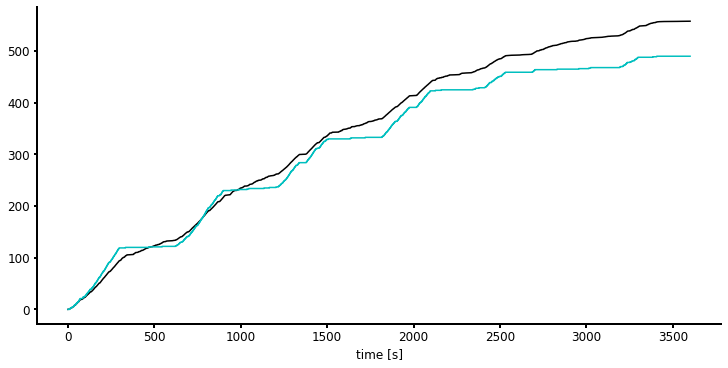

In [233]:
animal, session = 'RatF00', 'RatF00_2021_07_18_10_36_33'  # tm90
seq = sequence['RatF00', 'RatF00_2021_07_18_10_36_33']

time = read_csv_pandas((root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".position"), Col=[3])[:90000]
pos  = read_csv_pandas((root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".position"), Col=[4])[:90000]/11
tot = [0]
tot.extend(abs(np.diff(pos)))

totaldist = np.cumsum(tot) / 100

fig, axs = plt.subplots(1, 1, figsize=(10, 5))
axs.plot(time, totaldist, color='k', label='distance')
axs.set_xlabel('time [s]')


data = bin_seq(seq)
rw, trw = [], []
for i in range(12):
    for a in range(0, len(data[i])):
        if data[i][a][1] == "run":
            rw.append(data[i][a][2])
            trw.append(data[i][a][0])
            
totalreward = np.zeros(len(time))
for i in range(len(trw)):
    totalreward[np.argmin(np.abs(time-trw[i]))+1] = rw[i]
totalreward = np.cumsum(totalreward)

axs.plot(time, totalreward, color='c', label='reward')
axs.set_xlabel('time [s]')

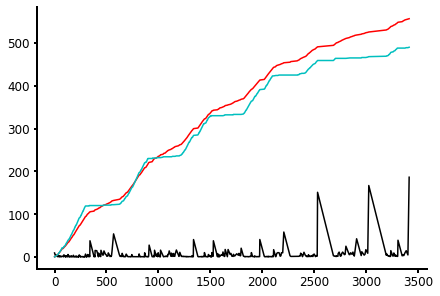

In [234]:

wait_duration, moment_of_wait = [], []
for a in range(0, len(seq)):
        if seq[a][1] == "stay":
            wait_duration.append(seq[a][3])
            moment_of_wait.append(seq[a][0])
plt.plot(moment_of_wait, wait_duration, color='k')

dist_at_moment_of_wait = np.zeros(len(moment_of_wait))
water_at_moment_of_wait = np.zeros(len(moment_of_wait))
for i in range(len(moment_of_wait)):
    dist_at_moment_of_wait[i] = totaldist[int(moment_of_wait[i]*25)]
    water_at_moment_of_wait[i] = totalreward[int(moment_of_wait[i]*25)]

plt.plot(moment_of_wait, dist_at_moment_of_wait, color='r')
plt.plot(moment_of_wait, water_at_moment_of_wait, color='c')

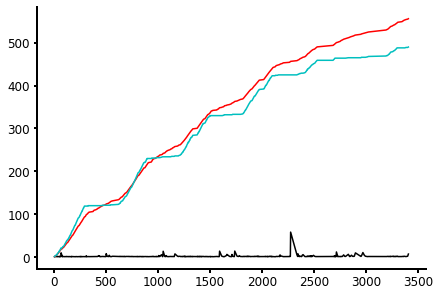

In [235]:

run_duration, moment_of_run = [], []
for a in range(0, len(seq)):
        if seq[a][1] == "run":
            run_duration.append(seq[a][3])
            moment_of_run.append(seq[a][0])
plt.plot(moment_of_run, run_duration, color='k')

# get distance traveled at time truntime
dist_at_moment_of_run = np.zeros(len(moment_of_run))
water_at_moment_of_run = np.zeros(len(moment_of_run))
for i in range(len(moment_of_run)):
    dist_at_moment_of_run[i] = totaldist[int(moment_of_run[i]*25)]
    water_at_moment_of_run[i] = totalreward[int(moment_of_run[i]*25)]

plt.plot(moment_of_run, dist_at_moment_of_run, color='r')
plt.plot(moment_of_run, water_at_moment_of_run, color='c')


Text(0, 0.5, 'idle duration [s]')

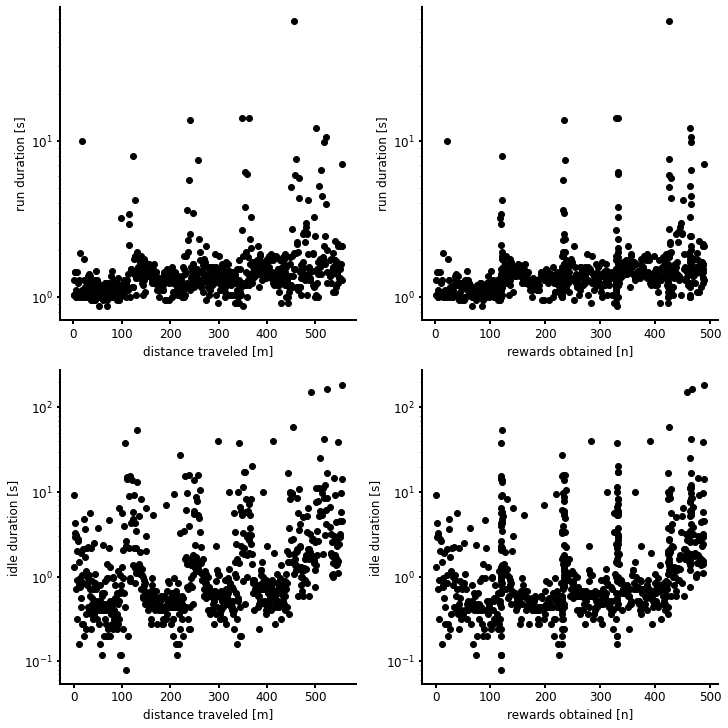

In [236]:
data = bin_seq(seq)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].plot(dist_at_moment_of_run, run_duration, color='k', marker='o', lw=0)
# axs[0, 0].set_ylim(0, 2.5)
axs[0, 0].set_yscale('log')
axs[0, 0].set_xlabel('distance traveled [m]')
axs[0, 0].set_ylabel('run duration [s]')

axs[0, 1].plot(water_at_moment_of_run, run_duration, color='k', marker='o', lw=0)
axs[0, 1].set_yscale('log')
axs[0, 1].set_xlabel('rewards obtained [n]')
axs[0, 1].set_ylabel('run duration [s]')

axs[1, 0].plot(dist_at_moment_of_wait, wait_duration, color='k', marker='o', lw=0)
axs[1, 0].set_yscale('log')
axs[1, 0].set_xlabel('distance traveled [m]')
axs[1, 0].set_ylabel('idle duration [s]')

axs[1, 1].plot(water_at_moment_of_wait, wait_duration, color='k', marker='o', lw=0)
axs[1, 1].set_yscale('log')
axs[1, 1].set_xlabel('rewards obtained [n]')
axs[1, 1].set_ylabel('idle duration [s]')

Text(0, 0.5, 'idle duration [s]')

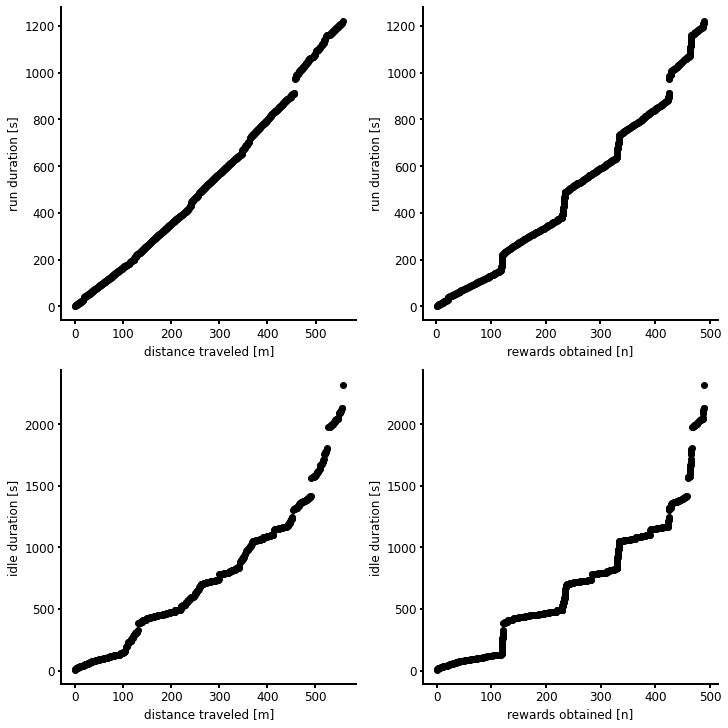

In [237]:
data = bin_seq(seq)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].plot(dist_at_moment_of_run, np.cumsum(run_duration), color='k', marker='o', lw=0)
# axs[0, 0].set_yscale('log')
axs[0, 0].set_xlabel('distance traveled [m]')
axs[0, 0].set_ylabel('run duration [s]')

axs[0, 1].plot(water_at_moment_of_run, np.cumsum(run_duration), color='k', marker='o', lw=0)
# axs[0, 1].set_yscale('log')
axs[0, 1].set_xlabel('rewards obtained [n]')
axs[0, 1].set_ylabel('run duration [s]')

axs[1, 0].plot(dist_at_moment_of_wait, np.cumsum(wait_duration), color='k', marker='o', lw=0)
# axs[1, 0].set_yscale('log')
axs[1, 0].set_xlabel('distance traveled [m]')
axs[1, 0].set_ylabel('idle duration [s]')

axs[1, 1].plot(water_at_moment_of_wait, np.cumsum(wait_duration), color='k', marker='o', lw=0)
# axs[1, 1].set_yscale('log')
axs[1, 1].set_xlabel('rewards obtained [n]')
axs[1, 1].set_ylabel('idle duration [s]')

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(15, 5))
_x, _y = [], []

for elem in seq: 
    if seq[elem][1]=='run':
        _x.append(seq[elem][0])
        _y.append(seq[elem][3])
        # axs.scatter(seq[elem][0], seq[elem][3], c='dodgerblue')
axs.plot(_x, _y, marker='o', c='k', lw=0)
axs.set_ylim(0.5, 2.5)

gradient, intercept, r_value, p_value, std_err = stats.linregress(_x, _y)


gradient, intercept = stats.siegelslopes(_y, _x)
axs.plot(time, gradient * time + intercept, color='black', lw=2)
print(gradient, intercept)


# mu0=1.1789160402663743+- 0.019960534970052304
# mut=0.07473171153304926+-0.014515223630007406
# mut = change in 10 min
# 10 min = 600sec

# mass in model

In [ ]:
# params = a, t, g, a', t', g', a'', t'', g''
def modelwald_fitW(data, init=[2, 0, .5, 0, 0, 0, 0, 0, 0],
                  f=model_crit, N_bins=6, N_avg=4, N_params=2, weight=1, 
                  alpha_t_fixed=False, gamma_t_fixed=False,
                  alpha_R_fixed=False, gamma_R_fixed=False,
                  ):
    """fit full model to data"""
    params_init = np.array(init)
    alpha_t_bounds = (None, None) if not alpha_t_fixed else (0, 1e-8)
    gamma_t_bounds = (None, None) if not gamma_t_fixed else (0, 1e-8)
    alpha_R_bounds = (None, None) if not alpha_R_fixed else (0, 1e-8)
    gamma_R_bounds = (None, None) if not gamma_R_fixed else (0, 1e-8)

    res = minimize(f, params_init, args=(data, [N_bins, N_avg], N_params, weight),
                   bounds=((0, None), (0, 1e-8), (0, None),
                   alpha_t_bounds, (0, 1e-8), gamma_t_bounds,
                   alpha_R_bounds, (0, 1e-8), gamma_R_bounds))
    return res.x, res.fun

def model_critW(params, *args, robustness_param=1e-20):
    """negative log likelihood function for full model"""
    alpha, theta, gamma, alpha_t, theta_prime, gamma_t, alpha_R, theta_second, gamma_R = params
    neg_log_lik_val = 0
    N_bins, N_avg = args[1]
    N_params = args[2]
    weight = args[3]
    ALPHA = np.zeros((N_bins, N_avg))
    GAMMA = np.zeros((N_bins, N_avg))
    _theta = theta + theta_prime + theta_second

    for bin in range(N_bins):
        for avg in range(N_avg):
            ALPHA[bin, avg] = alpha/weight + bin*alpha_t/weight + avg*alpha_R/weight
            GAMMA[bin, avg] = gamma/weight + bin*gamma_t/weight + avg*gamma_R/weight

    for bin in range(N_bins):
        for avg in range(N_avg):
            _alpha = ALPHA[bin, avg] if ALPHA[bin, avg] > 0 else 1e-8
            _gamma = GAMMA[bin, avg]# if GAMMA[bin, avg] > 0 else 1e-8
            try:
                pdf_vals = Wald_pdf(args[0][bin][avg], _alpha, _theta, _gamma)
                ln_pdf_vals = np.log(pdf_vals + robustness_param)
                log_lik_val = ln_pdf_vals.sum()

                n = len(args[0][bin][avg]) if len(args[0][bin][avg]) > 0 else 1
                neg_log_lik_val += (-log_lik_val / n)
            except:
                neg_log_lik_val += 0  # add 0 instead of throwing an error when there is no data in a bin*avg
    return neg_log_lik_val

modelwald_fitW(data[animal], f=model_critW, weight=1)

In [ ]:
fig, axs = plt.subplots(6, 3, figsize=(12, 20), gridspec_kw={'width_ratios': [5, 5, 2]})


ylabels = [r'$\alpha_0$', r"$\alpha_t$", r"$\alpha_R$", r'$\gamma_0$', r"$\gamma_t$", r"$\gamma_R$"]
ylims = [[-.5, 3], [-.1, .65], [-.45, .5], [-.2, 1.6], [-.25, .1], [-.35, .1]]

alpha, gamma, alpha_t, gamma_t, alpha_R, gamma_R, lossWald = {}, {}, {}, {}, {}, {}, {}
alphaPool, gammaPool, alpha_tPool, gamma_tPool, alpha_RPool, gamma_RPool, lossWaldPool = {}, {}, {}, {}, {}, {}, {}

alpha_t_fixed, gamma_t_fixed, alpha_R_fixed, gamma_R_fixed = False, False, False, False
# alpha_t_fixed, gamma_t_fixed, alpha_R_fixed, gamma_R_fixed = False, True, True, False
# alpha_t_fixed, gamma_t_fixed, alpha_R_fixed, gamma_R_fixed = False, False, True, False
# alpha_t_fixed, gamma_t_fixed, alpha_R_fixed, gamma_R_fixed = True, True, True, True

alpha_fit, gamma_fit, alpha_t_fit, gamma_t_fit, alpha_R_fit, gamma_R_fit = {}, {}, {}, {}, {}, {}
if os.path.exists("picklejar/resamplingParameters100ITER.p"):
    alpha_fit, gamma_fit, alpha_t_fit, gamma_t_fit, alpha_R_fit, gamma_R_fit = pickle.load(open("picklejar/resamplingParameters100ITER.p", "rb"))
    
alpha_fitPooled, alpha_t_fitPooled, alpha_R_fitPooled, gamma_fitPooled, gamma_t_fitPooled, gamma_R_fitPooled = {}, {}, {}, {}, {}, {}
if os.path.exists("picklejar/resamplingParameters100ITER_Pooled.p"):
    alpha_fitPooled, alpha_t_fitPooled, alpha_R_fitPooled, gamma_fitPooled, gamma_t_fitPooled, gamma_R_fitPooled = pickle.load(open("picklejar/resamplingParameters100ITER_Pooled.p", "rb"))
    

for animal in animalList:
    alpha[animal] = {"60": 0, "90": 0, "120": 0, "20": 0, "10": 0, "2": 0, "rev10": 0, "rev20": 0}
    gamma[animal] = {"60": 0, "90": 0, "120": 0, "20": 0, "10": 0, "2": 0, "rev10": 0, "rev20": 0}
    alpha_t[animal] = {"60": 0, "90": 0, "120": 0, "20": 0, "10": 0, "2": 0, "rev10": 0, "rev20": 0}
    gamma_t[animal] = {"60": 0, "90": 0, "120": 0, "20": 0, "10": 0, "2": 0, "rev10": 0, "rev20": 0}
    alpha_R[animal] = {"60": 0, "90": 0, "120": 0, "20": 0, "10": 0, "2": 0, "rev10": 0, "rev20": 0}
    gamma_R[animal] = {"60": 0, "90": 0, "120": 0, "20": 0, "10": 0, "2": 0, "rev10": 0, "rev20": 0}
    lossWald[animal] = {"60": 0, "90": 0, "120": 0, "20": 0, "10": 0, "2": 0, "rev10": 0, "rev20": 0}


    for cond, data in zip(["60", "90", "120", "20", "10", "2", "rev10", "rev20"], [data60, data90, data120, data20, data10, data2, datarev10, datarev20]):
        (alpha[animal][cond], theta, gamma[animal][cond], \
        alpha_t[animal][cond], thetaprime, gamma_t[animal][cond], \
        alpha_R[animal][cond], thetasecond, gamma_R[animal][cond]), lossWald[animal][cond] = modelwald_fitW(data[animal], f=model_critW, weight=weights[animal]/1000,
                                                                                                            alpha_t_fixed=alpha_t_fixed, 
                                                                                                                                    gamma_t_fixed=gamma_t_fixed, 
                                                                                                                                    alpha_R_fixed=alpha_R_fixed, 
                                                                                                                                    gamma_R_fixed=gamma_R_fixed, 
                                                                                                                                    )
    vars = [alpha, alpha_t, alpha_R, gamma, gamma_t, gamma_R]
    varsPool = [alphaPool, alpha_tPool, alpha_RPool, gammaPool, gamma_tPool, gamma_RPool]
    resampled = [alpha_fit, alpha_t_fit, alpha_R_fit, gamma_fit, gamma_t_fit, gamma_R_fit]
    resampledPooled = [alpha_fitPooled, alpha_t_fitPooled, alpha_R_fitPooled, gamma_fitPooled, gamma_t_fitPooled, gamma_R_fitPooled]

    def _percentiles(sample):
            s = np.sort(sample)
            return s[int(.05 * len(s))], s[int(.95 * len(s))]

    for i, (var, ylabel, ylim, resample) in enumerate(zip(vars, ylabels, ylims, resampled)):
        
        # axs[i, 0].plot((0, 0), _percentiles(resample[animal]['60']), color=rat_markers[animal][0], lw=2)
        # axs[i, 0].plot((1, 1), _percentiles(resample[animal]['90']), color=rat_markers[animal][0], lw=2)
        # axs[i, 0].plot((2, 2), _percentiles(resample[animal]['120']), color=rat_markers[animal][0], lw=2)

        x, y = np.arange(3), [var[animal]["60"], var[animal]["90"], var[animal]["120"]]
        axs[i, 0].plot(x, y, color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], markersize=6.5, lw=2)
        # gradient, intercept, r_value, p_value, std_err = stats.linregress(x, y)
        # axs[i, 0].plot(np.linspace(np.min(x), np.max(x), 100), gradient * np.linspace(np.min(x), np.max(x), 100) + intercept, color=rat_markers[animal][0], lw=2 if p_value < .05 else .5)
        axs[i, 0].set_title(f"")
        axs[i, 0].set_xticks(np.arange(3))
        axs[i, 0].set_xticklabels(["60", "90", "120"])
        axs[i, 0].set_ylabel(ylabel)
        axs[i, 0].set_xlim(-.5, 2.5)
        # axs[i, 0].set_ylim(ylim)
        axs[i, 0].axhline(0, color='black', linestyle='--', linewidth=1)

    for i, (var, ylabel, ylim, resample) in enumerate(zip(vars, ylabels, ylims, resampled)):

        # axs[i, 1].plot((0, 0), _percentiles(resample[animal]['20']), color=rat_markers[animal][0], lw=2)
        # axs[i, 1].plot((1, 1), _percentiles(resample[animal]['10']), color=rat_markers[animal][0], lw=2)
        # axs[i, 1].plot((2, 2), _percentiles(resample[animal]['2']), color=rat_markers[animal][0], lw=2)
        # axs[i, 1].plot((3, 3), _percentiles(resample[animal]['rev10']), color=rat_markers[animal][0], lw=2)
        # axs[i, 1].plot((4, 4), _percentiles(resample[animal]['rev20']), color=rat_markers[animal][0], lw=2)

        x, y = np.arange(5), [var[animal]["20"], var[animal]["10"], var[animal]["2"], var[animal]["rev10"], var[animal]["rev20"]]
        axs[i, 1].plot(x, y, color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], markersize=6.5, lw=2)
        # gradient, intercept, r_value, p_value, std_err = stats.linregress(x, y)
        # axs[i, 1].plot(np.linspace(np.min(x), np.max(x), 100), gradient * np.linspace(np.min(x), np.max(x), 100) + intercept, color=rat_markers[animal][0], lw=2 if p_value < .05 else .5)
        axs[i, 1].set_title(f"")
        axs[i, 1].set_xticks(np.arange(5))
        axs[i, 1].set_xticklabels(["20", "10", "0", "-10", "-20"])
        axs[i, 1].set_ylabel(ylabel)
        axs[i, 1].set_xlim(-.5, 4.5)
        # axs[i, 1].set_ylim(ylim)
        axs[i, 1].axhline(0, color='black', linestyle='--', linewidth=1)

    # for i, (var, ylabel, ylim, resample) in enumerate(zip(varsPool, ylabels, ylims, resampledPooled)):
    #     # axs[i, 2].plot((0, 0), _percentiles(resample[animal]), color=rat_markers[animal][0], lw=2)

    #     x, y = 0, var[animal]
    #     axs[i, 2].scatter(x, y, color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], s=50)
    #     axs[i, 2].set_title(f"")
    #     axs[i, 2].set_xticks([])
    #     axs[i, 2].set_ylabel(ylabel)
    #     axs[i, 2].set_xlim(-.5, .5)
    #     axs[i, 2].set_ylim(ylim)
    #     axs[i, 2].axhline(0, color='black', linestyle='--', linewidth=1)

axs[i, 0].set_xlabel("Distance")
axs[i, 1].set_xlabel(r'$v_{belt}$')
axs[i, 2].set_xlabel("All conditions pooled")

#mean per condition
for idx, cond in enumerate(["60", "90", "120"]):
    for jdx, var in enumerate([alpha, alpha_t, alpha_R, gamma, gamma_t, gamma_R]):
        d = [var[animal][cond] for animal in animalList]
        mean, std = np.mean(d), np.std(d)/np.sqrt(len(d))
        s, p = stats.wilcoxon(d)
        if p < .05: axs[jdx, 0].scatter(idx+.3, mean, color='k', marker=r'$\ast$')
        axs[jdx, 0].errorbar(idx+.2, mean, yerr=std, color='black', marker='o', markersize=5, capsize=5, capthick=2, linewidth=2)

for idx, cond in enumerate(["20", "10", "2", "rev10", "rev20"]):
    for jdx, var in enumerate([alpha, alpha_t, alpha_R, gamma, gamma_t, gamma_R]):
        d = [var[animal][cond] for animal in animalList]
        mean, std = np.mean(d), np.std(d)/np.sqrt(len(d))
        s, p = stats.wilcoxon(d)
        if p < .05: axs[jdx, 1].scatter(idx+.3, mean, color='k', marker=r'$\ast$')
        axs[jdx, 1].errorbar(idx+.2, mean, yerr=std, color='black', marker='o', markersize=5, capsize=5, capthick=2, linewidth=2)

test_all_conds_between_themselves(["60", "90", "120"], vars, ax=axs[:, 0])
test_all_conds_between_themselves(["20", "10", "2", "rev10", "rev20"], vars, ax=axs[:, 1])

# pickle.dump([alpha, alpha_t, alpha_R, gamma, gamma_t, gamma_R], open("picklejar/main_fitting_results.p", "wb"))
# pickle.dump([alphaPool, alpha_tPool, alpha_RPool, gammaPool, gamma_tPool, gamma_RPool], open("picklejar/main_fitting_results_pooled.p", "wb"))

Zalpha = {animal: {key: (alpha[animal][key] - np.mean([alpha[animal][key] for animal in animalList]))/np.std([alpha[animal][key] for animal in animalList]) for key in alpha[animal]} for animal in animalList}
Zalpha_t = {animal: {key: (alpha_t[animal][key] - np.mean([alpha_t[animal][key] for animal in animalList]))/np.std([alpha_t[animal][key] for animal in animalList]) for key in alpha_t[animal]} for animal in animalList}
Zalpha_R = {animal: {key: (alpha_R[animal][key] - np.mean([alpha_R[animal][key] for animal in animalList]))/np.std([alpha_R[animal][key] for animal in animalList]) for key in alpha_R[animal]} for animal in animalList}
Zgamma = {animal: {key: (gamma[animal][key] - np.mean([gamma[animal][key] for animal in animalList]))/np.std([gamma[animal][key] for animal in animalList]) for key in gamma[animal]} for animal in animalList}
Zgamma_t = {animal: {key: (gamma_t[animal][key] - np.mean([gamma_t[animal][key] for animal in animalList]))/np.std([gamma_t[animal][key] for animal in animalList]) for key in gamma_t[animal]} for animal in animalList}
Zgamma_R = {animal: {key: (gamma_R[animal][key] - np.mean([gamma_R[animal][key] for animal in animalList]))/np.std([gamma_R[animal][key] for animal in animalList]) for key in gamma_R[animal]} for animal in animalList}

traits = {animal: [] for animal in animalList}
Zvars = [Zalpha, Zalpha_t, Zalpha_R, Zgamma, Zgamma_t, Zgamma_R]
for j, zvar in enumerate(Zvars):
    for animal in animalList:
        zscores = [zvar[animal][cond] for cond in ["60", "90", "120", "20", "10", "2", "rev10", "rev20"]]
        pdf = stats.norm.pdf(np.linspace(-3, 3, 600), np.mean(zscores), np.std(zscores))
        traits[animal].append(np.mean(zscores))
        axs[j, 2].plot(pdf, np.linspace(-3, 3, 600), color=rat_markers[animal][0], linestyle=lines[brainstatus[animal]])
        axs[j, 2].set_ylim(-3, 3)
        axs[j, 2].set_ylabel("Z-scored " + ylabels[j])
        axs[j, 2].set_xlabel("")
        axs[j, 2].set_xticks([])

In [ ]:
weights = {'RatF00': 212.02, 'RatF01': 205.85, 'RatF02': 193.75,
            'RatM00': 259.37, 'RatM01': 278.12, 'RatM02': 253.19,
            'RatF20': 220.10, 'RatF21': 215.53, 'RatF22': 215.0,
            'RatM20': 254.68, 'RatM21': 307.29, 'RatM22': 330.53,
            'RatF30': 217.32, 'RatF31': 228.95, 'RatF32': 216.80, 'RatF33': 222.77,
            'RatM30': 261.38, 'RatM31': 300.55, 'RatM32': 279.23, 
            'RatF30L': 217.32, 'RatF31L': 228.95, 'RatF32L': 216.80, 'RatF33L': 222.77,
            'RatM30L': 261.38, 'RatM31L': 300.55, 'RatM32L': 279.23}

fig, ax = plt.subplots(1, 6, figsize=(15, 3))
for j, zvar in enumerate(Zvars):
    _x, _y = [], []
    for animal in animalList:
        zscores = [zvar[animal][cond] for cond in ["60", "90", "120", "20", "10", "2", "rev10", "rev20"]]
        y = np.mean(zscores)
        x = weights[animal]

        ax[j].scatter(x, y, color=rat_markers[animal][0])
        ax[j].set_xlabel("Weight (g)")
        ax[j].set_ylabel(ylabels[j])
        ax[j].set_ylim(-2, 2)

        _x.append(x)
        _y.append(y)

    pearson = stats.pearsonr(_x, _y)
    print(ylabels[j]+f' corr: {pearson[0]:.2f}, p: {pearson[1]:.4f}')
    
    gradient, intercept, r_value, p_value, std_err = stats.linregress(_x, _y)
    ax[j].plot(np.linspace(np.min(_x), np.max(_x), 100), gradient * np.linspace(np.min(_x), np.max(_x), 100) + intercept, color='black', lw=2)

# traits from both models

In [ ]:
running_time_traits = pickle.load(open("picklejar/running_time_model_traits.p", "rb"))
idle_time_traits = pickle.load(open("picklejar/idle_time_model_traits.p", "rb"))
running_time_traits = {animal: running_time_traits[animal][0:3] for animal in animalList}
idle_time_traits = {animal: idle_time_traits[animal][:4] + idle_time_traits[animal][5:] for animal in animalList}

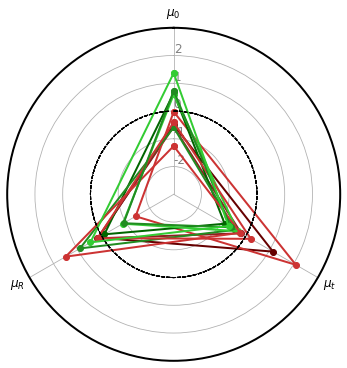

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(5, 5), subplot_kw={'projection': 'polar'})

for idx, animal in enumerate(animalList):
        make_spider(axs, running_time_traits[animal], title='', 
        color=rat_markers[animal][0], marker=rat_markers[animal][1], linestyle=rat_markers[animal][2],
        labels=[r'$\mu_0$', r"$\mu_t$", r"$\mu_R$"])

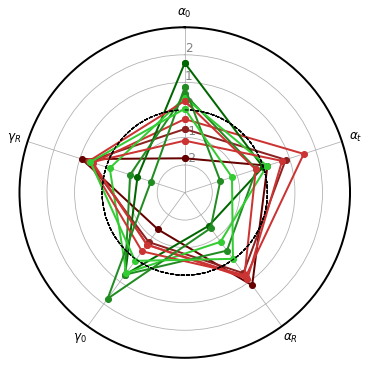

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(5, 5), subplot_kw={'projection': 'polar'})

for idx, animal in enumerate(animalList):
        make_spider(axs, idle_time_traits[animal], title='', 
        color=rat_markers[animal][0], marker=rat_markers[animal][1], linestyle=lines[brainstatus[animal]],
        labels=[r'$\alpha_0$', r"$\alpha_t$", r"$\alpha_R$", r'$\gamma_0$', r"$\gamma_R$"])

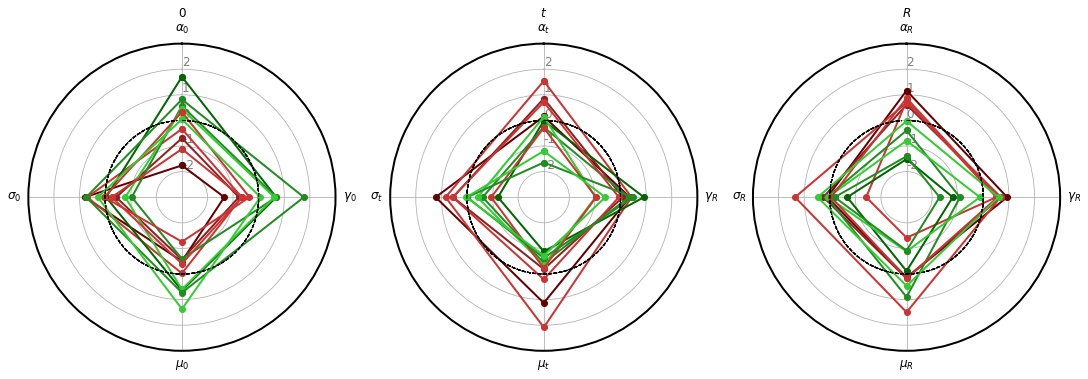

In [ ]:
running_time_traits = pickle.load(open("picklejar/running_time_model_traits.p", "rb"))
idle_time_traits = pickle.load(open("picklejar/idle_time_model_traits.p", "rb"))
fig, axs = plt.subplots(1, 3, figsize=(15, 5), subplot_kw={'projection': 'polar'})
for idx, animal in enumerate(animalList):
    traits = [idle_time_traits[animal][0], idle_time_traits[animal][3], 
              running_time_traits[animal][0], running_time_traits[animal][3]]
    make_spider(axs[0], traits, title='$0$',
                color=rat_markers[animal][0], marker=rat_markers[animal][1], linestyle=lines[brainstatus[animal]],
                labels=[r'$\alpha_0$', r'$\gamma_0$', r'$\mu_0$', r'$\sigma_0$'])

    traits = [idle_time_traits[animal][1], idle_time_traits[animal][4],
                running_time_traits[animal][1], running_time_traits[animal][4]]
    make_spider(axs[1], traits, title='$t$',
                color=rat_markers[animal][0], marker=rat_markers[animal][1], linestyle=lines[brainstatus[animal]],
                labels=[r'$\alpha_t$', r'$\gamma_R$', r'$\mu_t$', r'$\sigma_t$'])
    
    traits = [idle_time_traits[animal][2], idle_time_traits[animal][5],
                running_time_traits[animal][2], running_time_traits[animal][5]]
    make_spider(axs[2], traits, title='$R$',
                color=rat_markers[animal][0], marker=rat_markers[animal][1], linestyle=lines[brainstatus[animal]],
                labels=[r'$\alpha_R$', r'$\gamma_R$', r'$\mu_R$', r'$\sigma_R$'])


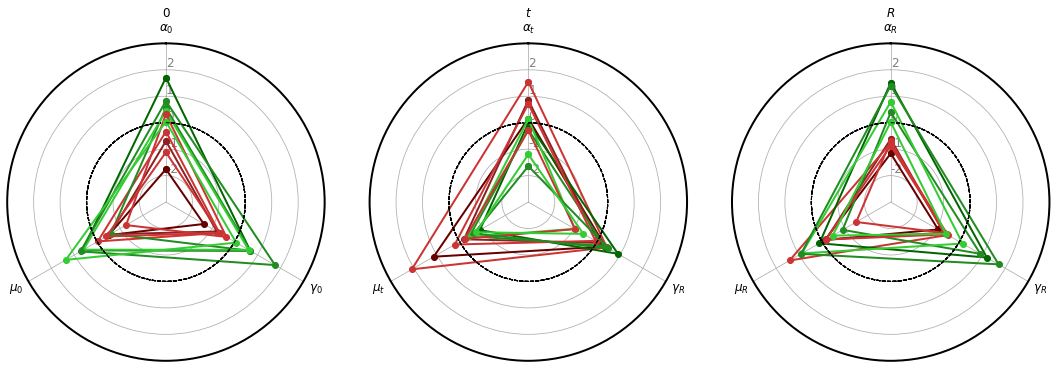

In [ ]:
running_time_traits = pickle.load(open("picklejar/running_time_model_traits.p", "rb"))
idle_time_traits = pickle.load(open("picklejar/idle_time_model_traits.p", "rb"))
fig, axs = plt.subplots(1, 3, figsize=(15, 5), subplot_kw={'projection': 'polar'})
for idx, animal in enumerate(animalList):
    traits = [idle_time_traits[animal][0], idle_time_traits[animal][3], 
              running_time_traits[animal][0]]#, running_time_traits[animal][3]]
    make_spider(axs[0], traits, title='$0$',
                color=rat_markers[animal][0], marker=rat_markers[animal][1], linestyle=lines[brainstatus[animal]],
                labels=[r'$\alpha_0$', r'$\gamma_0$', r'$\mu_0$'])#, r'$\sigma_0$'])

    traits = [idle_time_traits[animal][1], idle_time_traits[animal][4],
                running_time_traits[animal][1]]#, running_time_traits[animal][4]]
    make_spider(axs[1], traits, title='$t$',
                color=rat_markers[animal][0], marker=rat_markers[animal][1], linestyle=lines[brainstatus[animal]],
                labels=[r'$\alpha_t$', r'$\gamma_R$', r'$\mu_t$'])#, r'$\sigma_t$'])
    
    traits = [-idle_time_traits[animal][2], -idle_time_traits[animal][5],
                -running_time_traits[animal][2]]#, running_time_traits[animal][5]]
    make_spider(axs[2], traits, title='$R$',
                color=rat_markers[animal][0], marker=rat_markers[animal][1], linestyle=lines[brainstatus[animal]],
                labels=[r'$\alpha_R$', r'$\gamma_R$', r'$\mu_R$'])#, r'$\sigma_R$'])


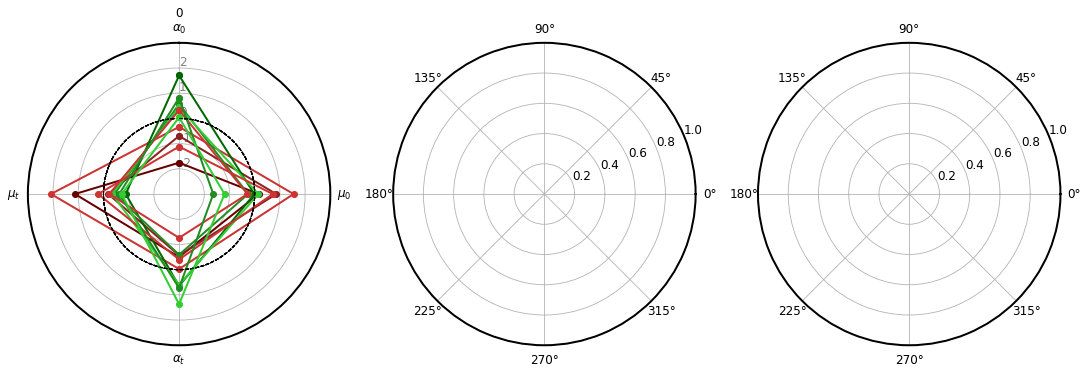

In [ ]:
running_time_traits = pickle.load(open("picklejar/running_time_model_traits.p", "rb"))
idle_time_traits = pickle.load(open("picklejar/idle_time_model_traits.p", "rb"))
fig, axs = plt.subplots(1, 3, figsize=(15, 5), subplot_kw={'projection': 'polar'})
for idx, animal in enumerate(animalList):
    traits = [idle_time_traits[animal][0], idle_time_traits[animal][1], 
            running_time_traits[animal][0], running_time_traits[animal][1]]
    make_spider(axs[0], traits, title='$0$',
                color=rat_markers[animal][0], marker=rat_markers[animal][1], linestyle=lines[brainstatus[animal]],
                labels=[r'$\alpha_0$', r'$\alpha_t$',r'$\mu_0$', r'$\mu_t$'])

    # traits = [idle_time_traits[animal][1], idle_time_traits[animal][4],
    #             running_time_traits[animal][1]]#, running_time_traits[animal][4]]
    # make_spider(axs[1], traits, title='$t$',
    #             color=rat_markers[animal][0], marker=rat_markers[animal][1], linestyle=lines[brainstatus[animal]],
    #             labels=[r'$\alpha_t$', r'$\gamma_R$', r'$\mu_t$'])#, r'$\sigma_t$'])
    
    # traits = [-idle_time_traits[animal][2], -idle_time_traits[animal][5],
    #             -running_time_traits[animal][2]]#, running_time_traits[animal][5]]
    # make_spider(axs[2], traits, title='$R$',
    #             color=rat_markers[animal][0], marker=rat_markers[animal][1], linestyle=lines[brainstatus[animal]],
    #             labels=[r'$\alpha_R$', r'$\gamma_R$', r'$\mu_R$'])#, r'$\sigma_R$'])


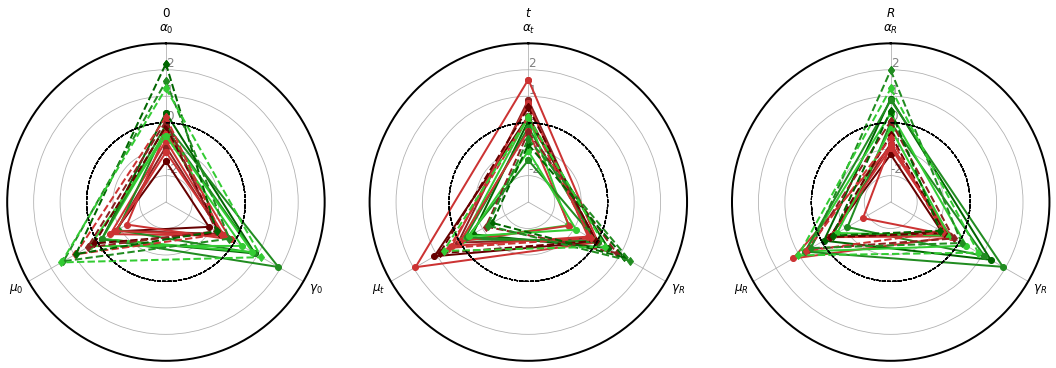

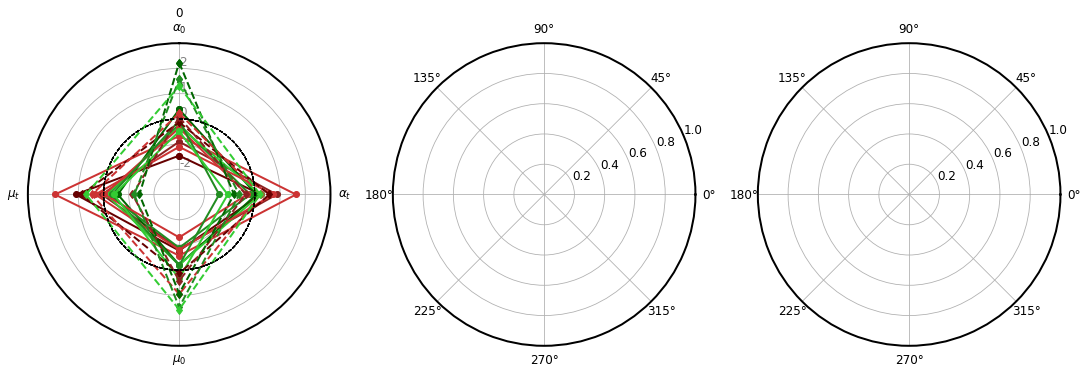

In [ ]:
running_time_traits = pickle.load(open("picklejar/running_time_model_traitswithTHcre.p", "rb"))
idle_time_traits = pickle.load(open("picklejar/idle_time_model_traitswithTHcre.p", "rb"))
fig, axs = plt.subplots(1, 3, figsize=(15, 5), subplot_kw={'projection': 'polar'})
for idx, animal in enumerate(animalList):
    traits = [idle_time_traits[animal][0], idle_time_traits[animal][3], 
              running_time_traits[animal][0]]#, running_time_traits[animal][3]]
    make_spider(axs[0], traits, title='$0$',
                color=rat_markers[animal][0], marker=rat_markers[animal][1], linestyle=lines[brainstatus[animal]],
                labels=[r'$\alpha_0$', r'$\gamma_0$', r'$\mu_0$'])#, r'$\sigma_0$'])

    traits = [idle_time_traits[animal][1], idle_time_traits[animal][4],
                running_time_traits[animal][1]]#, running_time_traits[animal][4]]
    make_spider(axs[1], traits, title='$t$',
                color=rat_markers[animal][0], marker=rat_markers[animal][1], linestyle=lines[brainstatus[animal]],
                labels=[r'$\alpha_t$', r'$\gamma_R$', r'$\mu_t$'])#, r'$\sigma_t$'])
    
    traits = [-idle_time_traits[animal][2], -idle_time_traits[animal][5],
                -running_time_traits[animal][2]]#, running_time_traits[animal][5]]
    make_spider(axs[2], traits, title='$R$',
                color=rat_markers[animal][0], marker=rat_markers[animal][1], linestyle=lines[brainstatus[animal]],
                labels=[r'$\alpha_R$', r'$\gamma_R$', r'$\mu_R$'])#, r'$\sigma_R$'])

fig, axs = plt.subplots(1, 3, figsize=(15, 5), subplot_kw={'projection': 'polar'})
for idx, animal in enumerate(animalList):
    traits = [idle_time_traits[animal][0], idle_time_traits[animal][1], 
            running_time_traits[animal][0], running_time_traits[animal][1]]
    make_spider(axs[0], traits, title='$0$',
                color=rat_markers[animal][0], marker=rat_markers[animal][1], linestyle=lines[brainstatus[animal]],
                labels=[r'$\alpha_0$', r'$\alpha_t$', r'$\mu_0$', r'$\mu_t$'])


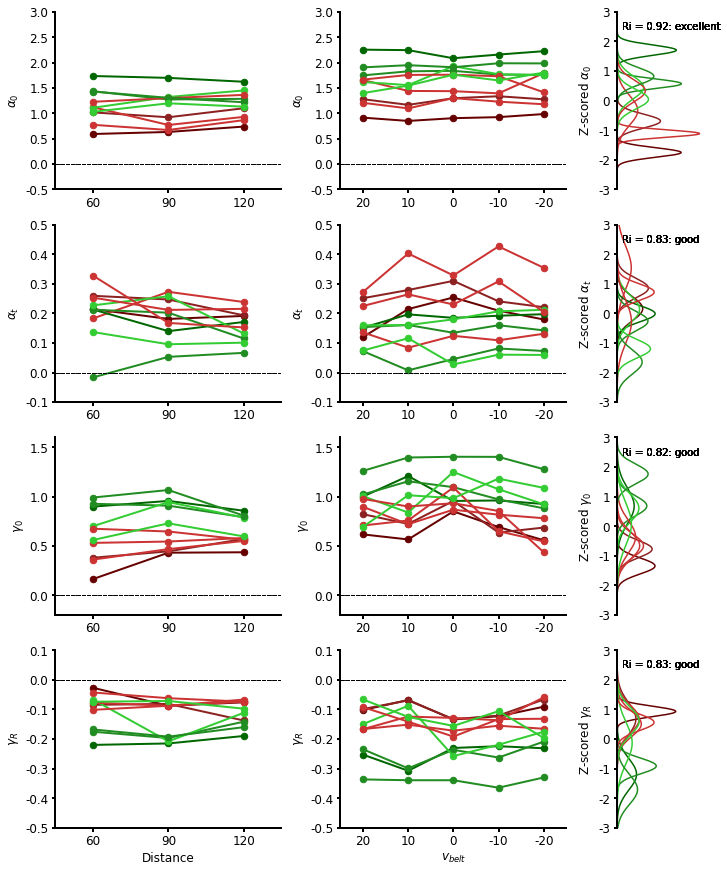

In [39]:
fig, axs = plt.subplots(4, 3, figsize=(10, 12), gridspec_kw={'width_ratios': [5, 5, 2]})
ylabels = [r'$\alpha_0$', r"$\alpha_t$", r'$\gamma_0$', r"$\gamma_R$"]
ylims = [[-.5, 3], [-.1, .5], [-.2, 1.6], [-.5, .1]]
alpha_t_fixed, gamma_t_fixed, alpha_R_fixed, gamma_R_fixed = False, False, False, False

alpha, gamma, alpha_t, gamma_t, alpha_R, gamma_R, lossWald = {}, {}, {}, {}, {}, {}, {}
alpha_fit, gamma_fit, alpha_t_fit, gamma_t_fit, alpha_R_fit, gamma_R_fit = {}, {}, {}, {}, {}, {}

if os.path.exists("picklejar/idle_time_model_parameters_fit.p"):
    alpha, alpha_t, alpha_R, gamma, gamma_t, gamma_R, lossWald = pickle.load(open("picklejar/idle_time_model_parameters_fit.p", "rb"))
else:
    if os.path.exists("picklejar/resamplingParameters100ITER.p"):
        alpha_fit, gamma_fit, alpha_t_fit, gamma_t_fit, alpha_R_fit, gamma_R_fit = pickle.load(open("picklejar/resamplingParameters100ITER.p", "rb"))

    for animal in animalList:
        alpha[animal] = {"60": 0, "90": 0, "120": 0, "20": 0, "10": 0, "2": 0, "rev10": 0, "rev20": 0}
        gamma[animal] = {"60": 0, "90": 0, "120": 0, "20": 0, "10": 0, "2": 0, "rev10": 0, "rev20": 0}
        alpha_t[animal] = {"60": 0, "90": 0, "120": 0, "20": 0, "10": 0, "2": 0, "rev10": 0, "rev20": 0}
        gamma_t[animal] = {"60": 0, "90": 0, "120": 0, "20": 0, "10": 0, "2": 0, "rev10": 0, "rev20": 0}
        alpha_R[animal] = {"60": 0, "90": 0, "120": 0, "20": 0, "10": 0, "2": 0, "rev10": 0, "rev20": 0}
        gamma_R[animal] = {"60": 0, "90": 0, "120": 0, "20": 0, "10": 0, "2": 0, "rev10": 0, "rev20": 0}
        lossWald[animal] = {"60": 0, "90": 0, "120": 0, "20": 0, "10": 0, "2": 0, "rev10": 0, "rev20": 0}

        for cond, data in zip(["60", "90", "120", "20", "10", "2", "rev10", "rev20"], [data60, data90, data120, data20, data10, data2, datarev10, datarev20]):
            (alpha[animal][cond], theta, gamma[animal][cond], \
            alpha_t[animal][cond], thetaprime, gamma_t[animal][cond], \
            alpha_R[animal][cond], thetasecond, gamma_R[animal][cond]), lossWald[animal][cond] = modelwald_fit(data[animal], alpha_t_fixed=alpha_t_fixed, 
                                                                                                                                        gamma_t_fixed=gamma_t_fixed, 
                                                                                                                                        alpha_R_fixed=alpha_R_fixed, 
                                                                                                                                        gamma_R_fixed=gamma_R_fixed, 
                                                                                                                                        )

vars = [alpha, alpha_t, gamma, gamma_R]
resampled = [alpha_fit, alpha_t_fit, alpha_R_fit, gamma_fit, gamma_t_fit, gamma_R_fit]
        
for animal in animalList:
    for i, (var, ylabel, ylim, resample) in enumerate(zip(vars, ylabels, ylims, resampled)):
        x, y = np.arange(3), [var[animal]["60"], var[animal]["90"], var[animal]["120"]]
        axs[i, 0].plot(x, y, color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], markersize=6.5, lw=2)
        axs[i, 0].set_title(f"")
        axs[i, 0].set_xticks(np.arange(3))
        axs[i, 0].set_xticklabels(["60", "90", "120"])
        axs[i, 0].set_ylabel(ylabel)
        axs[i, 0].set_xlim(-.5, 2.5)
        axs[i, 0].set_ylim(ylim)
        axs[i, 0].axhline(0, color='black', linestyle='--', linewidth=1)

    for i, (var, ylabel, ylim, resample) in enumerate(zip(vars, ylabels, ylims, resampled)):
        x, y = np.arange(5), [var[animal]["20"], var[animal]["10"], var[animal]["2"], var[animal]["rev10"], var[animal]["rev20"]]
        axs[i, 1].plot(x, y, color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], markersize=6.5, lw=2)
        axs[i, 1].set_title(f"")
        axs[i, 1].set_xticks(np.arange(5))
        axs[i, 1].set_xticklabels(["20", "10", "0", "-10", "-20"])
        axs[i, 1].set_ylabel(ylabel)
        axs[i, 1].set_xlim(-.5, 4.5)
        axs[i, 1].set_ylim(ylim)
        axs[i, 1].axhline(0, color='black', linestyle='--', linewidth=1)

axs[i, 0].set_xlabel("Distance")
axs[i, 1].set_xlabel(r'$v_{belt}$')


Zalpha = {animal: {key: (alpha[animal][key] - np.mean([alpha[animal][key] for animal in animalList]))/np.std([alpha[animal][key] for animal in animalList]) for key in alpha[animal]} for animal in animalList}
Zalpha_t = {animal: {key: (alpha_t[animal][key] - np.mean([alpha_t[animal][key] for animal in animalList]))/np.std([alpha_t[animal][key] for animal in animalList]) for key in alpha_t[animal]} for animal in animalList}
Zalpha_R = {animal: {key: (alpha_R[animal][key] - np.mean([alpha_R[animal][key] for animal in animalList]))/np.std([alpha_R[animal][key] for animal in animalList]) for key in alpha_R[animal]} for animal in animalList}
Zgamma = {animal: {key: (gamma[animal][key] - np.mean([gamma[animal][key] for animal in animalList]))/np.std([gamma[animal][key] for animal in animalList]) for key in gamma[animal]} for animal in animalList}
Zgamma_t = {animal: {key: (gamma_t[animal][key] - np.mean([gamma_t[animal][key] for animal in animalList]))/np.std([gamma_t[animal][key] for animal in animalList]) for key in gamma_t[animal]} for animal in animalList}
Zgamma_R = {animal: {key: (gamma_R[animal][key] - np.mean([gamma_R[animal][key] for animal in animalList]))/np.std([gamma_R[animal][key] for animal in animalList]) for key in gamma_R[animal]} for animal in animalList}

traits = {animal: [] for animal in animalList}
Zvars = [Zalpha, Zalpha_t, Zgamma, Zgamma_R]
for j, zvar in enumerate(Zvars):
    for animal in animalList:
        zscores = [zvar[animal][cond] for cond in ["60", "90", "120", "20", "10", "2", "rev10", "rev20"]]
        pdf = stats.norm.pdf(np.linspace(-3, 3, 600), np.mean(zscores), np.std(zscores))
        traits[animal].append(np.mean(zscores))
        axs[j, 2].plot(pdf, np.linspace(-3, 3, 600), color=rat_markers[animal][0], linestyle=lines[brainstatus[animal]])
        Ri = compute_Ri(zvar, animalList)
        axs[j, 2].annotate(f'Ri = {Ri:.2f}: {interpret_Ri(Ri)}', xy=(0.05, 0.9), xycoords='axes fraction')
        axs[j, 2].set_ylim(-3, 3)
        axs[j, 2].set_xlim(0, 3.5)

        axs[j, 2].set_ylabel("Z-scored " + ylabels[j])
        axs[j, 2].set_xlabel("")
        axs[j, 2].set_xticks([])
        axs[j, 2].spines['bottom'].set_visible(False)


# clustering

In [68]:
# create dataframe for stats

df = pd.DataFrame(traits, index=["alpha", "alpha_t", "alpha_R", "gamma", "gamma_t", "gamma_R"]).T
df

alpha   alpha_t   alpha_R     gamma   gamma_t   gamma_R
RatF00 -1.756652  0.156700  1.163435 -1.345136  0.361343  0.930555
RatF01 -0.694672  0.852351  0.618231 -0.775148  0.089082  0.679688
RatF02 -0.334018  1.541590  0.770510 -0.663557  0.430695  0.508720
RatM00  1.703381 -0.013483 -1.510845  0.681385  0.912655 -1.193850
RatM01  0.568124 -0.263184 -0.393897  0.684994  0.324319 -0.913297
RatM02  0.440814  0.138061 -0.789111  0.609368 -0.979333 -0.134863
RatF32  0.326671 -0.287894  0.696346 -0.361025 -0.955650  0.670772
RatF33 -1.116896  0.716890  0.870752 -0.659775 -0.067096  0.561180
RatM31  0.819462 -1.644178 -1.401419  1.762428  0.481106 -1.707654
RatM32  0.043787 -1.196854 -0.024000  0.066465 -0.597120  0.598749

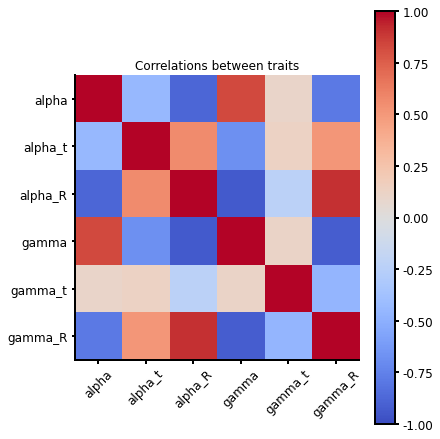

In [69]:
correlations = df.corr()
plt.figure(figsize=(6, 6))
plt.imshow(correlations, cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks(np.arange(6), ["alpha", "alpha_t", "alpha_R", "gamma", "gamma_t", "gamma_R"], rotation=45)
plt.yticks(np.arange(6), ["alpha", "alpha_t", "alpha_R", "gamma", "gamma_t", "gamma_R"])
plt.colorbar()
plt.title("Correlations between traits")
plt.show()

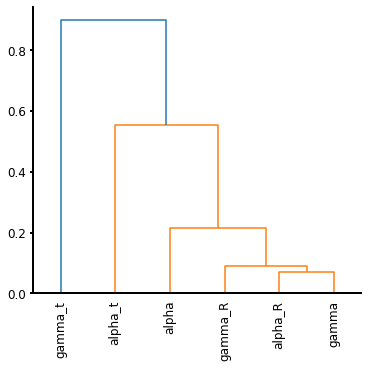

In [71]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform

plt.figure(figsize=(5,5))
dissimilarity = 1 - abs(correlations)
Z = linkage(squareform(dissimilarity), 'complete')

dendrogram(Z, labels=df.columns, orientation='top', leaf_rotation=90);

In [72]:
# Clusterize the data
threshold = 0.8
labels = fcluster(Z, threshold, criterion='distance')

# Show the cluster
print(labels)

# Keep the indices to sort labels
labels_order = np.argsort(labels)

# Build a new dataframe with the sorted columns
for idx, i in enumerate(df.columns[labels_order]):
    if idx == 0:
        clustered = pd.DataFrame(df[i])
    else:
        df_to_append = pd.DataFrame(df[i])
        clustered = pd.concat([clustered, df_to_append], axis=1)

[1 1 1 1 2 1]


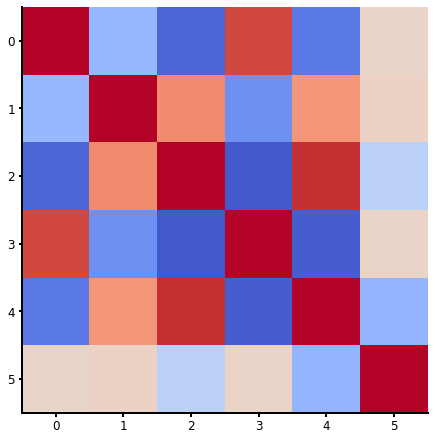

In [73]:
plt.figure(figsize=(6,6))
correlations2 = clustered.corr()
plt.imshow(correlations2, cmap='coolwarm', vmin=-1, vmax=1)

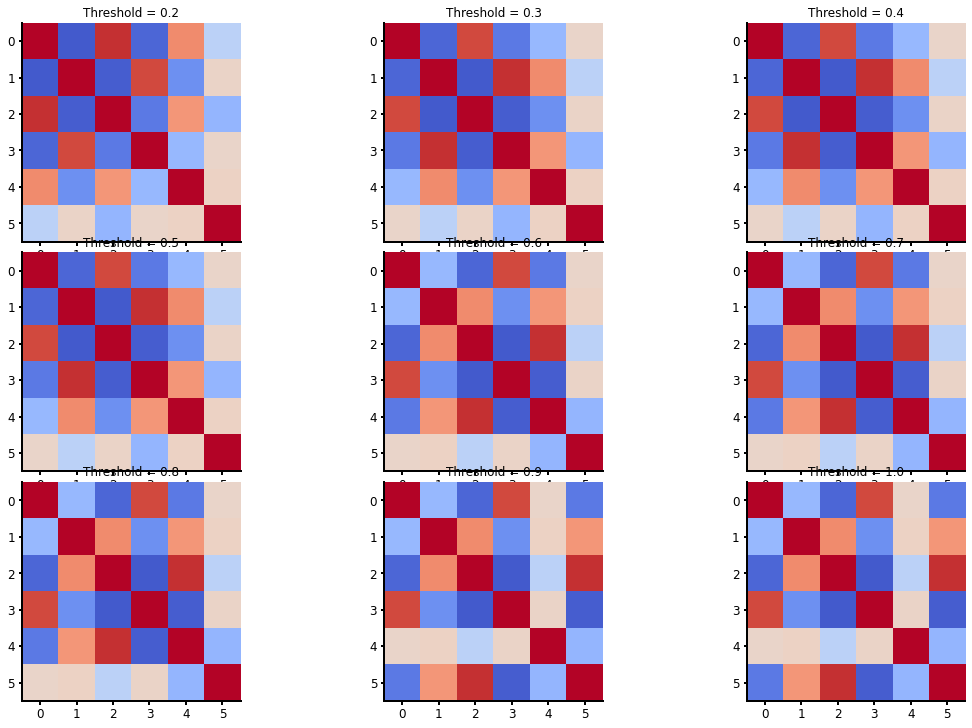

In [74]:
plt.figure(figsize=(15,10))

for idx, t in enumerate(np.arange(0.2,1.1,0.1)):
    
    # Subplot idx + 1
    plt.subplot(3, 3, idx+1)
    
    # Calculate the cluster
    labels = fcluster(Z, t, criterion='distance')

    # Keep the indices to sort labels
    labels_order = np.argsort(labels)

    # Build a new dataframe with the sorted columns
    for idx, i in enumerate(df.columns[labels_order]):
        if idx == 0:
            clustered = pd.DataFrame(df[i])
        else:
            df_to_append = pd.DataFrame(df[i])
            clustered = pd.concat([clustered, df_to_append], axis=1)
            
    # Plot the correlation heatmap
    correlations = clustered.corr()
    plt.imshow(correlations, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title("Threshold = {}".format(round(t,2)))

/home/david/.local/lib/python3.7/site-packages/seaborn/matrix.py:723: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  ax.figure.draw(ax.figure.canvas.get_renderer())
/home/david/.local/lib/python3.7/site-packages/seaborn/matrix.py:332: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  ax.figure.draw(ax.figure.canvas.get_renderer())
/home/david/.local/lib/python3.7/site-packages/seaborn/matrix.py:1205: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  self.fig.tight_

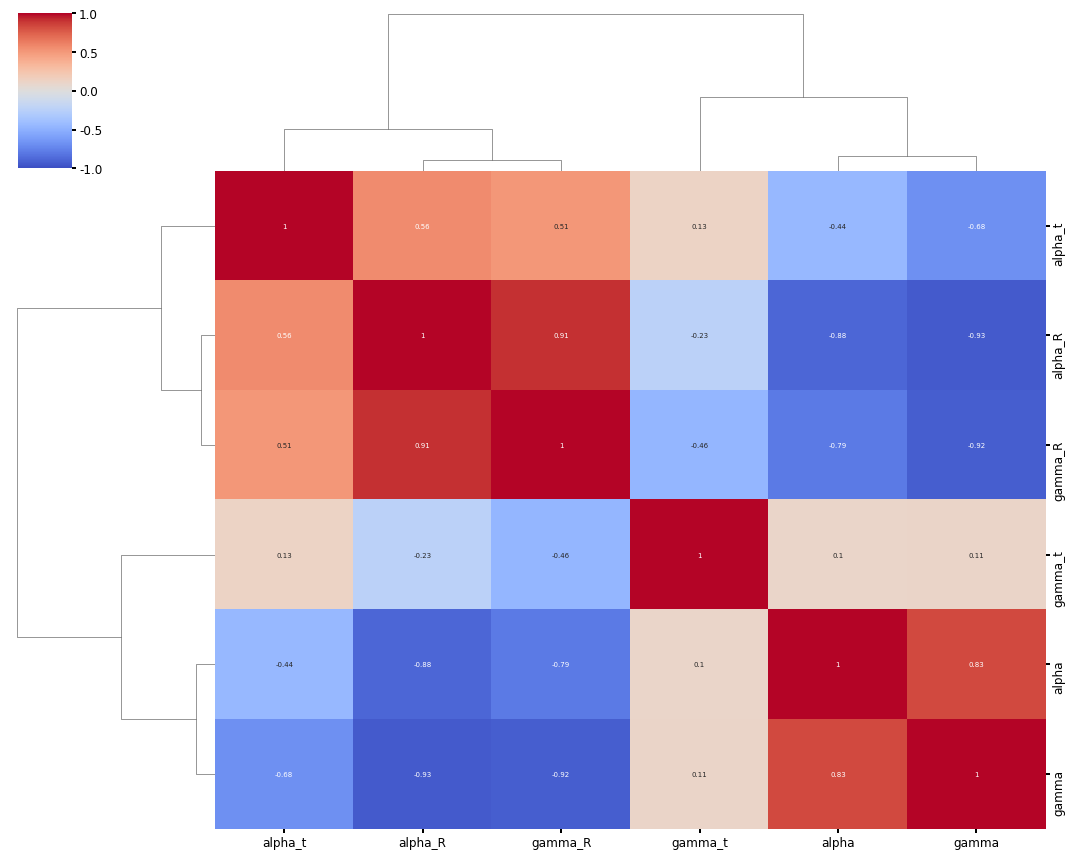

In [120]:
import seaborn as sns
sns.clustermap(correlations2, method="complete", cmap='coolwarm', annot=True, 
               annot_kws={"size": 7}, vmin=-1, vmax=1, figsize=(15,12));

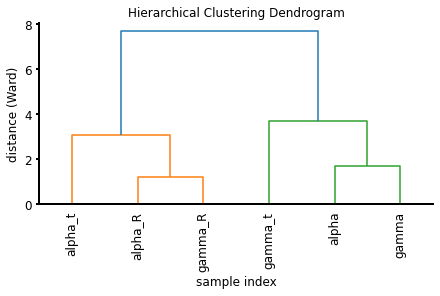

In [77]:
from scipy.cluster.hierarchy import dendrogram, linkage
df = pd.DataFrame(traits, index=["alpha", "alpha_t", "alpha_R", "gamma", "gamma_t", "gamma_R"])
Z = linkage(df, 'ward')

# Plot title
plt.title('Hierarchical Clustering Dendrogram')

# Plot axis labels
plt.xlabel('sample index')
plt.ylabel('distance (Ward)')

# Make the dendrogram
dendrogram(Z, labels=df.index, leaf_rotation=90)

# Show the graph
plt.show()

/home/david/.local/lib/python3.7/site-packages/IPython/core/pylabtools.py:137: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  fig.canvas.print_figure(bytes_io, **kw)


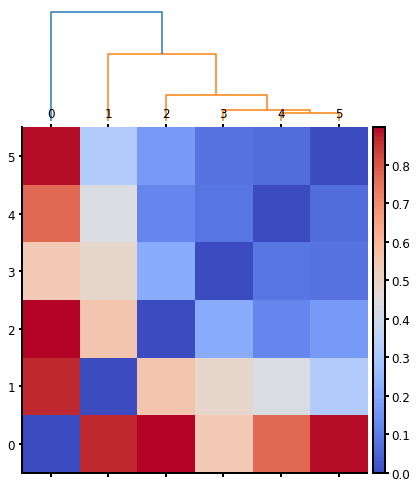

In [210]:
#DISTANCE MATRIX
df = pd.DataFrame(traits, index=["alpha", "alpha_t", "alpha_R", "gamma", "gamma_t", "gamma_R"]).T
# Compute and plot first dendrogram.
fig = plt.figure(figsize=(8, 8))
# ax1 = fig.add_axes([0.09, 0.1, 0.2, 0.6])
# Y = linkage(df, method='ward')
# Z1 = dendrogram(Y, orientation='left')
# ax1.set_xticks([])
# ax1.spines['bottom'].set_visible(False)
# ax1.set_yticks([])
# ax1.spines['left'].set_visible(False)

# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3, 0.71, 0.6, 0.2])
correlations = df.corr()
dissimilarity = 1 - abs(correlations)

Y = linkage(squareform(dissimilarity), 'complete')
# Y = linkage(df, method='ward')
Z2 = dendrogram(Y)
ax2.set_xticks([])
ax2.spines['bottom'].set_visible(False)
ax2.set_yticks([])
ax2.spines['left'].set_visible(False)

# Plot distance matrix.
axmatrix = fig.add_axes([0.3, 0.1, 0.6, 0.6])

dissimilarity = dissimilarity.to_numpy()
dissimilarity = dissimilarity[Z2['leaves'], :]
dissimilarity = dissimilarity[:, Z2['leaves']]
# im = axmatrix.matshow(dissimilarity, aspect='auto', origin='lower', cmap='coolwarm', vmin=-1, vmax=1)
im = axmatrix.matshow(dissimilarity, aspect='auto', origin='lower', cmap='coolwarm',)
# D = df.corr().to_numpy()
# # idx1 = Z1['leaves']
# idx2 = Z2['leaves']
# # D = D[idx2,:]
# # D = D[:,idx2]
# # D = np.abs(D)

# im = axmatrix.imshow(D, cmap='coolwarm', vmin=-1, vmax=1)

# labels = df.index
# labels = labels[idx2]
# axmatrix.set_xticks(np.arange(len(labels)))
# axmatrix.set_yticks(np.arange(len(labels)))
# axmatrix.set_xticklabels(labels, rotation=90)
# axmatrix.set_yticklabels(labels)

# axmatrix.set_xticks([])  # remove axis labels
# axmatrix.set_yticks([])  # remove axis labels

# Plot colorbar.
axcolor = fig.add_axes([0.91, 0.1, 0.02, 0.6])
plt.colorbar(im, cax=axcolor)
plt.show()

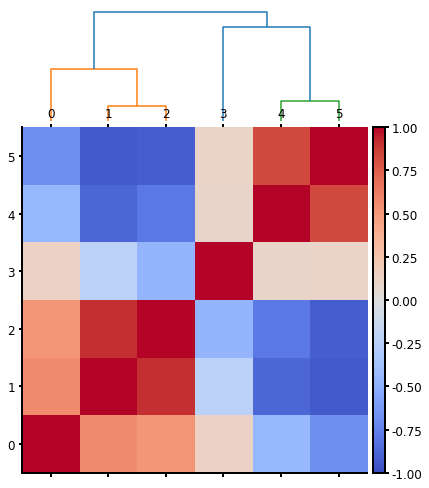

In [211]:
# CORRELATION MATRIX
df = pd.DataFrame(traits, index=["alpha", "alpha_t", "alpha_R", "gamma", "gamma_t", "gamma_R"]).T
# Compute and plot first dendrogram.
fig = plt.figure(figsize=(8, 8))


# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3, 0.71, 0.6, 0.2])
correlations = df.corr()


Y = linkage(correlations)
# Y = linkage(df, method='ward')
Z2 = dendrogram(Y)
ax2.set_xticks([])
ax2.spines['bottom'].set_visible(False)
ax2.set_yticks([])
ax2.spines['left'].set_visible(False)

# Plot distance matrix.
axmatrix = fig.add_axes([0.3, 0.1, 0.6, 0.6])
correlations = correlations.to_numpy()
correlations = correlations[Z2['leaves'], :]
correlations = correlations[:, Z2['leaves']]
im = axmatrix.matshow(correlations, aspect='auto', origin='lower', cmap='coolwarm', vmin=-1, vmax=1)

# Plot colorbar.
axcolor = fig.add_axes([0.91, 0.1, 0.02, 0.6])
plt.colorbar(im, cax=axcolor)
plt.show()

              PC0       PC1       PC2       PC3       PC4       PC5
alpha    0.467556 -0.141721 -0.581668 -0.604147  0.239950  0.020002
alpha_t -0.326724 -0.752797 -0.441883  0.357436  0.016022  0.057192
alpha_R -0.490862  0.111775  0.086662 -0.152418  0.844420  0.052668
gamma    0.470225  0.084424  0.000379  0.488379  0.309013  0.661632
gamma_t  0.070712 -0.564626  0.618161 -0.413952 -0.043992  0.347538
gamma_R -0.455616  0.273476 -0.277070 -0.272295 -0.362902  0.659557


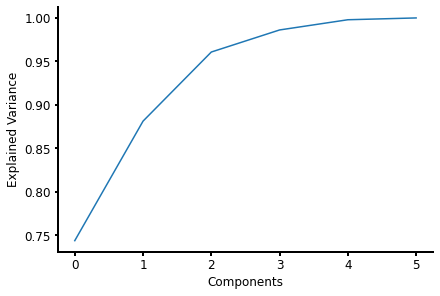

In [212]:
# PCA PARAMETERS

from sklearn.decomposition import PCA


# df = pd.DataFrame(data=numpy.random.normal(0, 1, (20, 10)))

# You must normalize the data before applying the fit method
# df_normalized=(df - df.mean()) / df.std()
df_normalized = df
pca = PCA(n_components=df.shape[1])
pca.fit(df_normalized)

# Reformat and view results
loadings = pd.DataFrame(pca.components_.T,
                            columns=['PC%s' % _ for _ in range(len(df_normalized.columns))],
                            index=df.columns)
print(loadings)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()

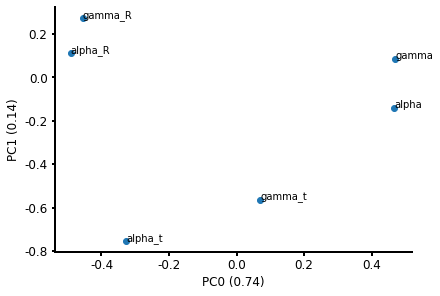

In [213]:
# plot 2 first principal components # useful?
plt.scatter(loadings.PC0, loadings.PC1)
plt.xlabel(f'PC0 ({pca.explained_variance_ratio_[0]:.2f})')
plt.ylabel(f'PC1 ({pca.explained_variance_ratio_[1]:.2f})')
for i, txt in enumerate(loadings.index):
    plt.annotate(txt, (loadings.PC0[i], loadings.PC1[i]))
plt.show()

             PC0       PC1       PC2       PC3       PC4       PC5
RatF00 -0.436228  0.074272  0.506215 -0.148174 -0.194290 -0.303845
RatF01 -0.268422  0.162477 -0.073638 -0.002909 -0.176512  0.565912
RatF02 -0.252019  0.398845 -0.215369  0.033957  0.151376 -0.435154
RatM00  0.437580  0.428346 -0.206297 -0.579635 -0.200027  0.111398
RatM01  0.228363  0.124617  0.098640  0.122293  0.472241 -0.338834
RatM02  0.138919 -0.179669 -0.537801  0.503613 -0.384435 -0.212496
RatF32 -0.111720 -0.488209 -0.275750 -0.288557  0.582524  0.161585
RatF33 -0.303808  0.103503  0.069935  0.333600  0.075908  0.360473
RatM31  0.553391 -0.053387  0.502065  0.310763  0.058955  0.177331
RatM32  0.013944 -0.570795  0.131998 -0.284950 -0.385741 -0.195433
[7.66450932e-01 1.23027635e-01 7.60649255e-02 2.47518472e-02
 9.70466036e-03 3.06049914e-33]


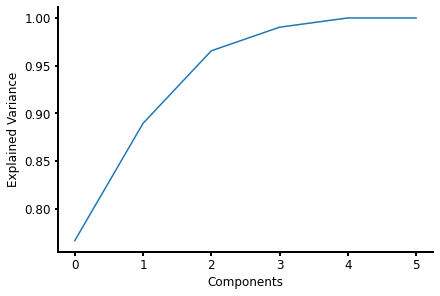

In [214]:
# PCA ANIMALS

from sklearn.decomposition import PCA

df_normalized = df.T
pca = PCA(n_components=df_normalized.shape[0])
pca.fit(df_normalized)

# Reformat and view results
loadings = pd.DataFrame(pca.components_.T,
                            columns=['PC%s' % _ for _ in range(len(df_normalized.T.columns))],
                            index=df_normalized.columns)
print(loadings)
print(pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()

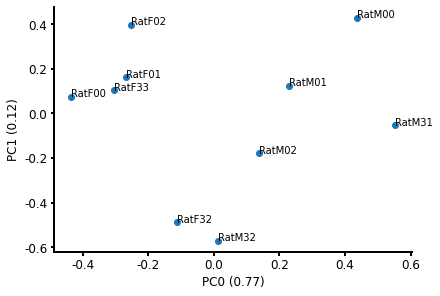

In [215]:
# PCA to compare with lesioned animals
# plot 2 first principal components
plt.scatter(loadings.PC0, loadings.PC1)
plt.xlabel(f'PC0 ({pca.explained_variance_ratio_[0]:.2f})')
plt.ylabel(f'PC1 ({pca.explained_variance_ratio_[1]:.2f})')
for i, txt in enumerate(loadings.index):
    plt.annotate(txt, (loadings.PC0[i], loadings.PC1[i]))
plt.show()



## all traits ok

In [190]:
x = pickle.load(open("picklejar/idle_time_model_traits.p", "rb"))
y = pickle.load(open("picklejar/running_time_model_traits.p", "rb"))

# merge both dicts    idle then run
all_traits = { key:x.get(key,[])+y.get(key,[]) for key in set(list(x.keys())+list(y.keys())) }

/home/david/.local/lib/python3.7/site-packages/IPython/core/pylabtools.py:137: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  fig.canvas.print_figure(bytes_io, **kw)


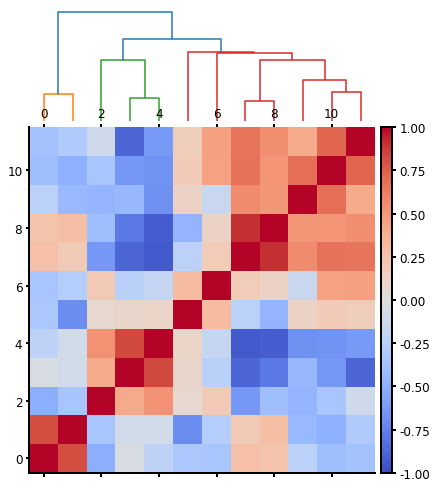

In [216]:
# CORRELATION MATRIX
df = pd.DataFrame(all_traits).T

# Compute and plot first dendrogram.
fig = plt.figure(figsize=(8, 8))


# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3, 0.71, 0.6, 0.2])
correlations = df.corr()


Y = linkage(correlations)
# Y = linkage(df, method='ward')
Z2 = dendrogram(Y)
ax2.set_xticks([])
ax2.spines['bottom'].set_visible(False)
ax2.set_yticks([])
ax2.spines['left'].set_visible(False)

# Plot distance matrix.
axmatrix = fig.add_axes([0.3, 0.1, 0.6, 0.6])
correlations = correlations.to_numpy()
correlations = correlations[Z2['leaves'], :]
correlations = correlations[:, Z2['leaves']]
im = axmatrix.matshow(correlations, aspect='auto', origin='lower', cmap='coolwarm', vmin=-1, vmax=1)

# Plot colorbar.
axcolor = fig.add_axes([0.91, 0.1, 0.02, 0.6])
plt.colorbar(im, cax=axcolor)
plt.show()

             PC0       PC1       PC2       PC3       PC4
RatM32  0.111891  0.206643 -0.589858 -0.339271 -0.083012
RatF32 -0.073195  0.630152  0.153456  0.069147  0.654279
RatM31  0.488835 -0.277970 -0.415623  0.392548  0.125520
RatF01 -0.246721  0.104729  0.141452 -0.057958 -0.438154
RatM00  0.448583 -0.168437  0.373931  0.047240 -0.069481
RatF00 -0.463931 -0.056845 -0.325905  0.382354 -0.026371
RatF02 -0.339166 -0.627839  0.217686 -0.113945  0.415505
RatM01  0.199949  0.204543  0.373934  0.312320 -0.259120
RatF33 -0.289895  0.038540  0.035669 -0.011574 -0.334297
RatM02  0.163650 -0.053516  0.035258 -0.680862  0.015131


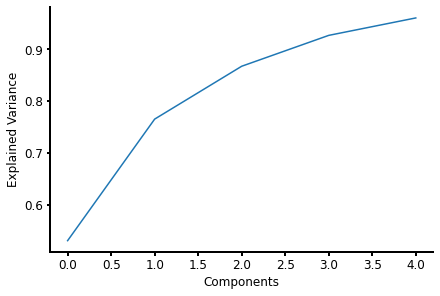

In [230]:
# PCA PARAMETERS

from sklearn.decomposition import PCA

df = pd.DataFrame(all_traits)
N = 5
df_normalized = df
# pca = PCA(n_components=df.shape[1])
pca = PCA(n_components=N)
pca.fit(df_normalized)

# Reformat and view results
loadings = pd.DataFrame(pca.components_.T,
                            columns=['PC%s' % _ for _ in range(N)],
                            index=df_normalized.columns)
print(loadings)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()

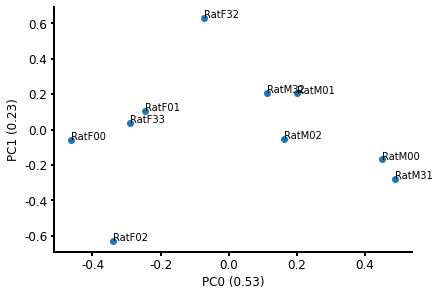

In [231]:
# PCA to compare with lesioned animals
# plot 2 first principal components
plt.scatter(loadings.PC0, loadings.PC1)
plt.xlabel(f'PC0 ({pca.explained_variance_ratio_[0]:.2f})')
plt.ylabel(f'PC1 ({pca.explained_variance_ratio_[1]:.2f})')
for i, txt in enumerate(loadings.index):
    plt.annotate(txt, (loadings.PC0[i], loadings.PC1[i]))
plt.show()



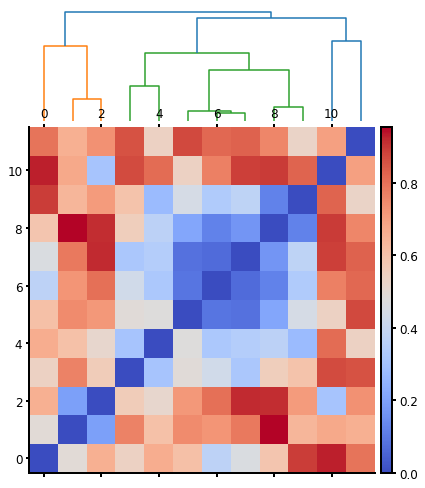

In [193]:
#DISTANCE MATRIX
df = pd.DataFrame(all_traits).T
# Compute and plot first dendrogram.
fig = plt.figure(figsize=(8, 8))
# ax1 = fig.add_axes([0.09, 0.1, 0.2, 0.6])
# Y = linkage(df, method='ward')
# Z1 = dendrogram(Y, orientation='left')
# ax1.set_xticks([])
# ax1.spines['bottom'].set_visible(False)
# ax1.set_yticks([])
# ax1.spines['left'].set_visible(False)

# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3, 0.71, 0.6, 0.2])
correlations = df.corr()
dissimilarity = 1 - abs(correlations)

Y = linkage(squareform(dissimilarity), 'complete')
# Y = linkage(df, method='ward')
Z2 = dendrogram(Y)
ax2.set_xticks([])
ax2.spines['bottom'].set_visible(False)
ax2.set_yticks([])
ax2.spines['left'].set_visible(False)

# Plot distance matrix.
axmatrix = fig.add_axes([0.3, 0.1, 0.6, 0.6])

dissimilarity = dissimilarity.to_numpy()
dissimilarity = dissimilarity[Z2['leaves'], :]
dissimilarity = dissimilarity[:, Z2['leaves']]
# im = axmatrix.matshow(dissimilarity, aspect='auto', origin='lower', cmap='coolwarm', vmin=-1, vmax=1)
im = axmatrix.matshow(dissimilarity, aspect='auto', origin='lower', cmap='coolwarm',)
# D = df.corr().to_numpy()
# # idx1 = Z1['leaves']
# idx2 = Z2['leaves']
# # D = D[idx2,:]
# # D = D[:,idx2]
# # D = np.abs(D)

# im = axmatrix.imshow(D, cmap='coolwarm', vmin=-1, vmax=1)

# labels = df.index
# labels = labels[idx2]
# axmatrix.set_xticks(np.arange(len(labels)))
# axmatrix.set_yticks(np.arange(len(labels)))
# axmatrix.set_xticklabels(labels, rotation=90)
# axmatrix.set_yticklabels(labels)

# axmatrix.set_xticks([])  # remove axis labels
# axmatrix.set_yticks([])  # remove axis labels

# Plot colorbar.
axcolor = fig.add_axes([0.91, 0.1, 0.02, 0.6])
plt.colorbar(im, cax=axcolor)
plt.show()

# cut data on distance and reward

In [297]:
animal, session = 'RatF00', 'RatF00_2021_07_18_10_36_33'

In [239]:
def get_waiting_times(data, memsize=3, filter=[0, 3600], toolong=3600):
    """get waiting times from sequence of actions data and separate them
    according to the average reward of the sequence"""
    waiting_times = {k: [] for k in meankeys(generate_targetList(seq_len=memsize)[::-1])}
    for i in range(len(data)):
        if data[i][1] == 'stay':
            if filter[0] <= data[i][0] <= filter[1] and data[i][3] != 0:
                if data[i][3] < toolong:  # filter out
                    try:
                        avg_rwd = round(np.mean([data[i-n][2] for n in range(1, (memsize*2)+1, 2)]), 2)
                        waiting_times[avg_rwd].append(data[i][3])
                    except:  # put the first n waits in rwd=1 (because we don't have the previous n runs to compute the average reward)
                        waiting_times[1].append(data[i][3])
    return waiting_times

# separate the data into time and reward bins
def prepare_data_idle_times(sequence, animalList, sessionList, memsize=3, time_bins=6):
    """prepare data for fitting
    cut the data into time bins and reward bins"""
    bin_size = 3600/time_bins
    targetlist = generate_targetList(memsize)[::-1]
    temp_data = {}
    for time_bin in range(time_bins):
        temp_data[time_bin] = {}
        for animal in animalList:
            temp_data[time_bin][animal] = {k: [] for k in meankeys(targetlist)}
            for session in matchsession(animal, sessionList):
                temp_data[time_bin][animal] = combine_dict(temp_data[time_bin][animal], get_waiting_times(sequence[animal, session], memsize=memsize, filter=[time_bin*bin_size, (time_bin+1)*bin_size]))

    data = {}
    for animal in animalList:
        data[animal] = np.zeros((time_bins, len(meankeys(targetlist)))).tolist()
        for avg_bin, avg in enumerate(meankeys(targetlist)):  # 1 -> 0
            for time_bin in range(time_bins):
                data[animal][time_bin][avg_bin] = np.asarray(temp_data[time_bin][animal][avg])
    return data

sessions = dist60
test = prepare_data_idle_times(sequence, animalList, sessions, memsize=memsize, time_bins=6)

In [ ]:
sequence[animal, session]

1.0


/home/david/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


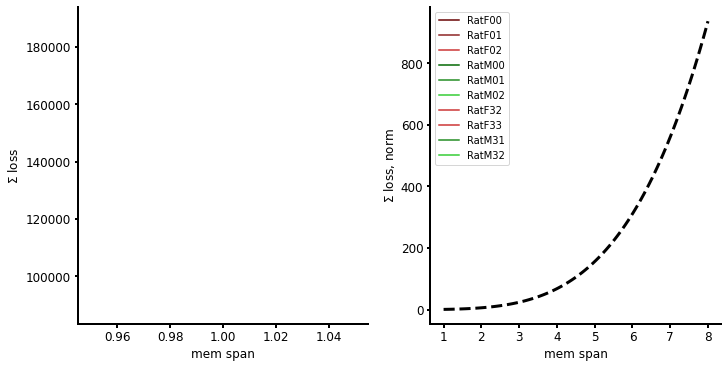

In [238]:
memsizes = np.arange(1, 2)

losses = {k:np.zeros(len(memsizes)) for k in animalList}
sessions = dist60+dist90+dist120+TM20+TM10+TM2+TMrev2+TMrev10+TMrev20

for idx, memsize in enumerate(memsizes):
    data_all = prepare_data_idle_times(sequence, animalList, sessions, memsize=memsize, time_bins=6)
    for animal in animalList:
        p, losses[animal][idx] = modelwald_fit(data_all[animal], f=model_compare, N_bins=6, N_avg=len(meankeys(generate_targetList(seq_len=memsize)[::-1])))


fig, axs = plt.subplots(1, 2, figsize=(10, 5))
avglosses = np.zeros((len(animalList), len(memsizes)))
for idx, animal in enumerate(animalList):
    axs[0].plot(memsizes, losses[animal], color=rat_markers[animal][0])
    axs[1].plot(memsizes, (losses[animal])/(losses[animal][0]), color=rat_markers[animal][0], label=animal)
    avglosses[idx] = losses[animal]/losses[animal][0]

f = np.mean(avglosses[:3], axis=0)
m = np.mean(avglosses[3:], axis=0)
avglosses = np.median(avglosses, axis=0)

axs[1].plot(memsizes, avglosses, color='k', lw=2)
z = np.poly1d(np.polyfit(memsizes, avglosses, 4))
x=np.linspace(1, 8, 100)
axs[1].plot(x, z(x), color='k', lw=3, ls='--')
print(x[np.argmin(z(x))])

axs[0].set_xlabel('mem span')
axs[1].set_xlabel('mem span')
axs[0].set_ylabel(r'$\Sigma$ loss')
axs[1].set_ylabel(r'$\Sigma$ loss, norm')
axs[1].legend()

In [ ]:
time = read_csv_pandas((root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".position"), Col=[3])[:90000]

data = bin_seq(seq)
rw, trw = [], []
for i in range(12):
    for a in range(0, len(data[i])):
        if data[i][a][1] == "run":
            rw.append(data[i][a][2])
            trw.append(data[i][a][0])
            
totalreward = np.zeros(len(time))
for i in range(len(trw)):
    totalreward[np.argmin(np.abs(time-trw[i]))+1] = rw[i]
totalreward = np.cumsum(totalreward)

axs.plot(time, totalreward, color='c', label='reward')
axs.set_xlabel('time [s]')

In [273]:


get_session_total_drops(sequence[animal, session])

381

RatF00
RatF01
RatF02
RatM00
RatM01
RatM02
RatF32
RatF33
RatM31
RatM32


Text(0, 0.5, 'total drops')

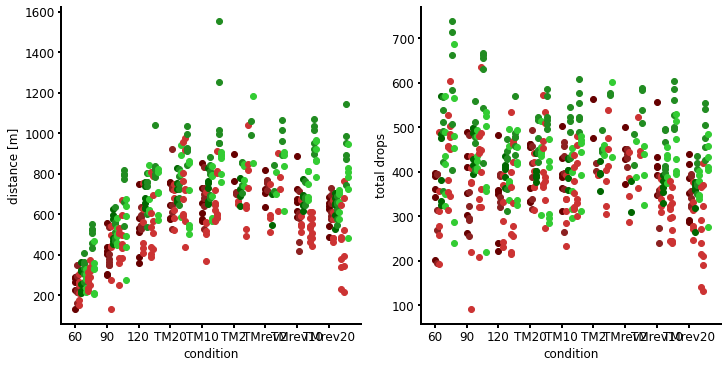

In [275]:
def get_session_total_distance(animal, session):
    '''get the total distance travelled in a session in meters'''
    pos  = read_csv_pandas((root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".position"), Col=[4])[:90000]/11
    tot = [0]
    tot.extend(abs(np.diff(pos)))
    totaldist = np.cumsum(tot) / 100
    return totaldist[-1]

def get_session_total_drops(sequence):
    totaldrops = 0
    for elem in sequence:
        if sequence[elem][1] == 'run':
            if sequence[elem][2] == 1:
                totaldrops += 1
    return totaldrops

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
animalList = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02', 'RatF32', 'RatF33', 'RatM31', 'RatM32']

for idx, animal in enumerate(animalList):
    print(animal)
    for jdx, sessionList in enumerate([dist60, dist90, dist120, TM20, TM10, TM2, TMrev2, TMrev10, TMrev20]):
        for session in matchsession(animal, sessionList):
            if not 'L' in session:
                axs[0].scatter(jdx+idx/15, get_session_total_distance(animal, session), color=rat_markers[animal][0])
                axs[1].scatter(jdx+idx/15, get_session_total_drops(sequence[animal, session]), color=rat_markers[animal][0])
                # print(session, get_session_total_distance(animal, session))
axs[0].set_xticks(np.arange(9))
axs[0].set_xticklabels(['60', '90', '120', 'TM20', 'TM10', 'TM2', 'TMrev2', 'TMrev10', 'TMrev20'])
axs[0].set_xlabel('condition')
axs[0].set_ylabel('distance [m]')

axs[1].set_xticks(np.arange(9))
axs[1].set_xticklabels(['60', '90', '120', 'TM20', 'TM10', 'TM2', 'TMrev2', 'TMrev10', 'TMrev20'])
axs[1].set_xlabel('condition')
axs[1].set_ylabel('total drops')



RatF00
RatF01
RatF02
RatM00
RatM01
RatM02
RatF32
RatF33
RatM31
RatM32


Text(0, 0.5, 'total drops')

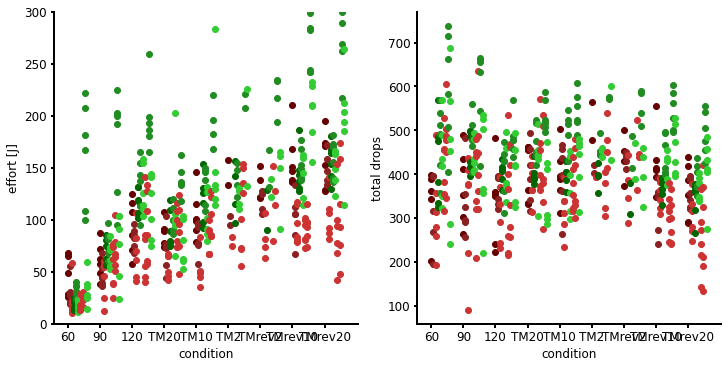

In [326]:
def get_session_total_distance(animal, session):
    '''get the total distance travelled in a session in meters'''
    pos  = read_csv_pandas((root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".position"), Col=[4])[:90000]/11
    tot = [0]
    tot.extend(abs(np.diff(pos)))
    totaldist = np.cumsum(tot) / 100
    return totaldist[-1]

def get_session_total_drops(sequence):
    totaldrops = 0
    for elem in sequence:
        if sequence[elem][1] == 'run':
            if sequence[elem][2] == 1:
                totaldrops += 1
    return totaldrops

def get_session_total_effort(animal, session):
    '''get the total effort expended in a session in Joules'''
    pos = read_csv_pandas((root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".position"), Col=[4])[:90000]/11
    time = read_csv_pandas((root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".position"), Col=[3])[:90000]
    w = weights[animal]/1000
    alpha = 1
    beta = 0

    # correct distance for treadmill speed
    tm_speed = get_from_pickle(root, animal, session, name="params.p")['treadmillSpeed'][0]

    TM1_pfPOS = [16.1, 97.3]
    TM2_pfPOS = [17.2, 98.1]

    D = abs(np.diff(pos)/100)
    correction = np.zeros(len(D))
    for idx, (pos, dist) in enumerate(zip(pos, D)):
        if TM1_pfPOS[0] < pos < TM1_pfPOS[1]:
            dist -= tm_speed/100 * 0.04
            correction[idx] = dist

    instant_effort = ((alpha * w * (correction ** 2)) / np.diff(time)) + beta * w * np.diff(time)
    # instant_effort = ((alpha * w * (abs(np.diff(pos)/100) ** 2)) / np.diff(time)) + beta * w * np.diff(time)
    instant_effort = np.insert(instant_effort, 0, beta * w * 0.04)
    return np.cumsum(instant_effort)[-1]



fig, axs = plt.subplots(1, 2, figsize=(10, 5))
animalList = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02', 'RatF32', 'RatF33', 'RatM31', 'RatM32']

for idx, animal in enumerate(animalList):
    print(animal)
    for jdx, sessionList in enumerate([dist60, dist90, dist120, TM20, TM10, TM2, TMrev2, TMrev10, TMrev20]):
        for session in matchsession(animal, sessionList):
            if not 'L' in session:
                axs[0].scatter(jdx+idx/15, get_session_total_effort(animal, session), color=rat_markers[animal][0])
                axs[1].scatter(jdx+idx/15, get_session_total_drops(sequence[animal, session]), color=rat_markers[animal][0])

axs[0].set_xticks(np.arange(9))
axs[0].set_xticklabels(['60', '90', '120', 'TM20', 'TM10', 'TM2', 'TMrev2', 'TMrev10', 'TMrev20'])
axs[0].set_xlabel('condition')
axs[0].set_ylabel('effort [J]')
axs[0].set_ylim(0, 300)

axs[1].set_xticks(np.arange(9))
axs[1].set_xticklabels(['60', '90', '120', 'TM20', 'TM10', 'TM2', 'TMrev2', 'TMrev10', 'TMrev20'])
axs[1].set_xlabel('condition')
axs[1].set_ylabel('total drops')



7 0.05020545454545456 -0.008
8 0.05304000000000002 -0.008
9 0.05411272727272731 -0.008
10 0.04315818181818187 -0.008
11 0.041860909090908935 -0.008
12 0.048760000000000116 -0.008
13 0.04921363636363637 -0.008
14 0.04914727272727269 -0.008
15 0.04328545454545449 -0.008
16 0.03899636363636368 -0.008
17 0.03148454545454548 -0.008
18 0.029751818181818167 -0.008
19 0.037863636363636315 -0.008
20 0.02902909090909091 -0.008
21 0.031937272727272766 -0.008
22 0.020749999999999994 -0.008
23 0.0 -0.008
24 0.06889545454545452 -0.008
25 0.015270909090909087 -0.008
26 0.02678545454545457 -0.008
27 0.042461818181818156 -0.008
71 0.023879090909090905 -0.008
72 0.04344727272727272 -0.008
73 0.04790909090909093 -0.008
74 0.04903363636363633 -0.008
75 0.049369999999999976 -0.008
76 0.04893000000000008 -0.008
77 0.05711727272727273 -0.008
78 0.0624436363636363 -0.008
79 0.06148909090909093 -0.008
80 0.053480909090909065 -0.008
81 0.039999090909091 -0.008
82 0.0398027272727272 -0.008
83 0.04865727272727284

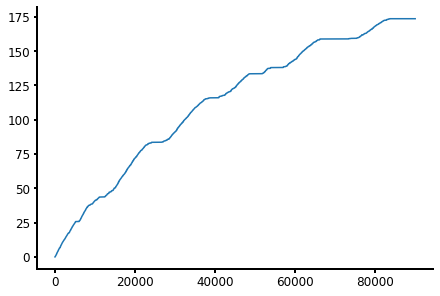

In [322]:
animal, session = 'RatF00', 'RatF00_2021_08_15_15_49_08'
from scipy.ndimage import gaussian_filter as smooth

def compute_speed(dataPos, dataTime):  # speed only computed along X axis. Compute along X AND Y axis?
    rawdata_speed = {}
    deltaXPos = (np.diff(dataPos))
    deltaTime = (np.diff(dataTime))
    rawdata_speed = np.divide(deltaXPos, deltaTime)
    rawdata_speed = np.append(rawdata_speed, 0)
    return rawdata_speed.astype('float32')


pos = read_csv_pandas((root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".position"), Col=[4])[:90000]/11
time = read_csv_pandas((root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".position"), Col=[3])[:90000]
w = weights[animal]/1000
alpha = 1
beta = 0

# correct distance for treadmill speed
tm_speed = get_from_pickle(root, animal, session, name="params.p")['treadmillSpeed'][0]
rat_speed = smooth(compute_speed(pos, time), 2)

TM1_pfPOS = [16.1, 97.3]
TM2_pfPOS = [17.2, 98.1]

D = abs(np.diff(pos)/100)
correction = np.zeros(len(D))
for idx, (pos, dist) in enumerate(zip(pos, D)):
    if TM1_pfPOS[0] < pos < TM1_pfPOS[1]:
        print(idx, dist, tm_speed * 0.04 / 100)
        dist -= tm_speed/100 * 0.04
        correction[idx] = dist



instant_effort = ((alpha * w * (correction ** 2)) / np.diff(time)) + beta * w * np.diff(time)
instant_effort = np.insert(instant_effort, 0, beta * w * 0.04)
plt.plot(np.cumsum(instant_effort))


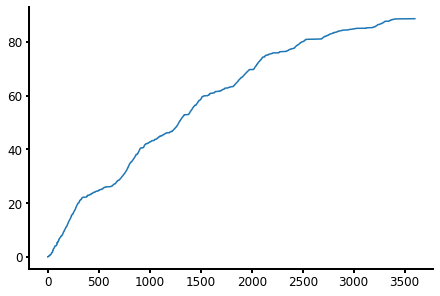

In [293]:

def get_session_total_effort(animal, session):
    '''get the total effort expended in a session in Joules'''
    pos = read_csv_pandas((root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".position"), Col=[4])[:90000]/11
    time = read_csv_pandas((root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".position"), Col=[3])[:90000]
    w = weights[animal]/1000
    alpha = 1
    beta = 0

    instant_effort = ((alpha * w * (abs(np.diff(pos)/100) ** 2)) / np.diff(time)) + beta * w * np.diff(time)
    instant_effort = np.insert(instant_effort, 0, beta * w * 0.04)
    return np.cumsum(instant_effort)[-1]



In [287]:
weights = {'RatF00': 212.02, 'RatF01': 205.85, 'RatF02': 193.75,
            'RatM00': 259.37, 'RatM01': 278.12, 'RatM02': 253.19,
            'RatF20': 220.10, 'RatF21': 215.53, 'RatF22': 215.0,
            'RatM20': 254.68, 'RatM21': 307.29, 'RatM22': 330.53,
            'RatF30': 217.32, 'RatF31': 228.95, 'RatF32': 216.80, 'RatF33': 222.77,
            'RatM30': 261.38, 'RatM31': 300.55, 'RatM32': 279.23, 
            'RatF30L': 217.32, 'RatF31L': 228.95, 'RatF32L': 216.80, 'RatF33L': 222.77,
            'RatM30L': 261.38, 'RatM31L': 300.55, 'RatM32L': 279.23}

In [280]:
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interact
import numpy as np

def f(a=1, effort_sensitivity=1, mass=1, distance=1):
    T = np.linspace(0, 2.5, 100)
    timecost = a*mass*T
    plt.plot(T, timecost, color='g')

    speedcost = (effort_sensitivity*mass*distance*distance)/T
    plt.plot(T, speedcost, color='r')

    E_w = timecost + speedcost
    plt.plot(T, E_w, color='b')
    plt.scatter(T[np.argmin(E_w)], np.min(E_w), color='k')
    print(T[np.argmin(E_w)])

    plt.ylim(0, 10)
    plt.show()

interact(f, a=(0, 10, 0.1), effort_sensitivity=(0, 10, 0.1), mass=(0, 10, 0.1), distance=(0, 1, 0.1));

interactive(children=(FloatSlider(value=1.0, description='a', max=10.0), FloatSlider(value=1.0, description='e…

In [263]:
animalList

animalList = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02', 'RatF32', 'RatF33', 'RatM31', 'RatM32']

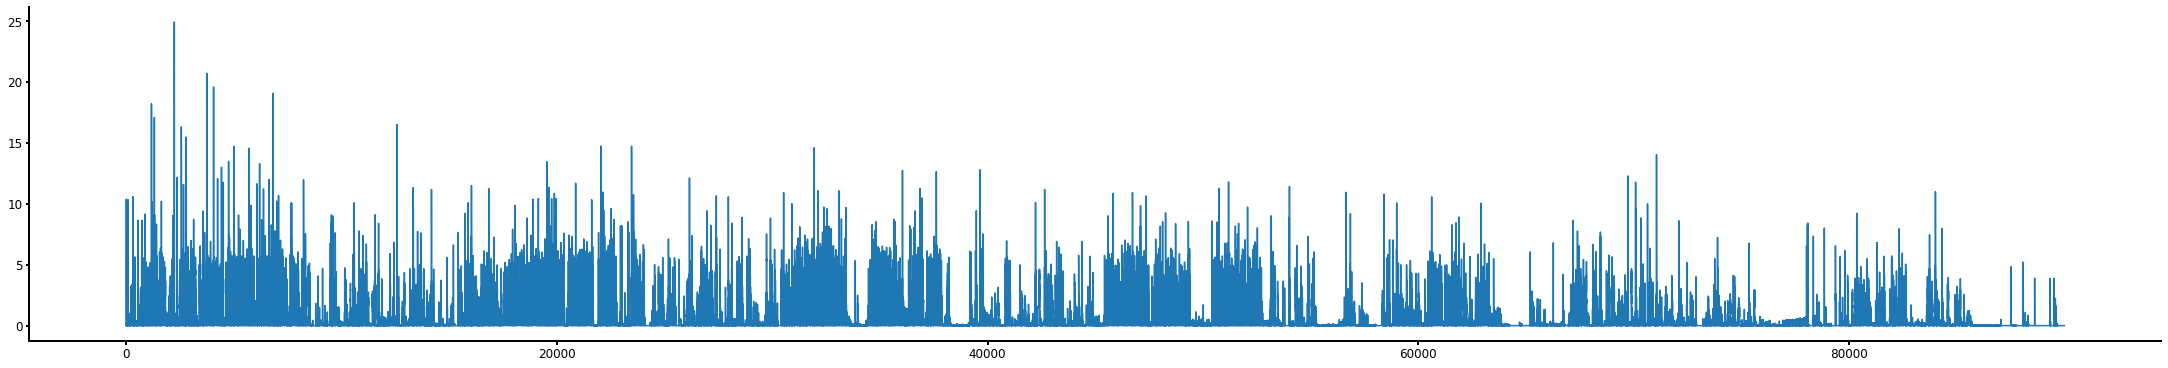

In [252]:
fig = plt.figure(figsize=(30, 5))
plt.plot(tot)

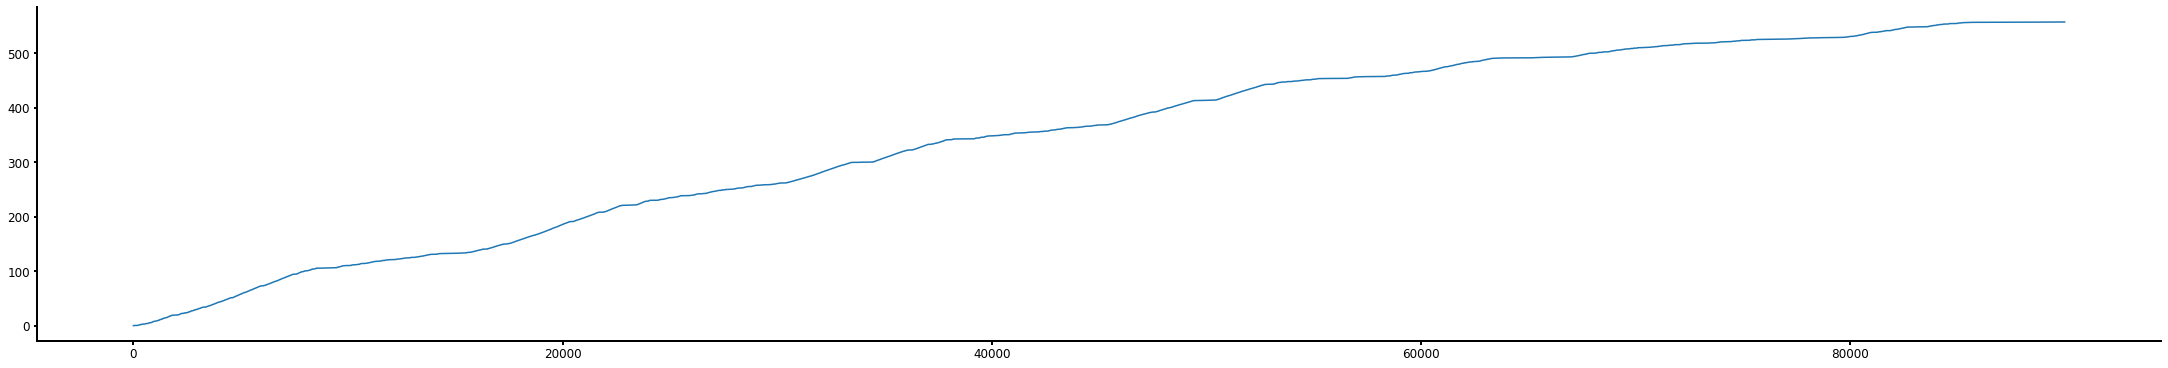

In [254]:
fig = plt.figure(figsize=(30, 5))
plt.plot(totaldist)